# Personal Key Indicators of Heart Disease

- 2020 annual CDC survey data of 400k adults related to their health status.


- According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.


- Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, the author noticed many different factors (questions) that directly or indirectly influence heart disease, so he decided to select the most relevant variables from it and do some cleaning so that they would be usable for machine learning projects.


For more information, you can access the Kaggle Dataset through this [link](https://www.kaggle.com/kamilpytlak/personal-key-indicators-of-heart-disease).

## Objectives

- Make an Exploratory Analysis of each variable showing the prevalence of heart disease for each category; 
- Search for the best combination of hyperparameters for Logistic Regression, SVM, Random Forest, and XGBoost that maximizes the recall avoiding compromising other metrics results as accuracy and specificity. For each method I will be run a parameter tuning for a process without sampling, using Random Undersampler, SMOTE, and both. It will also be tested the use of "f1-macro" and MCC (Mathews Correlation Coefficient) as the evaluation metric for imbalanced data.
    

## 1. Exploratory Data Analysis 

### 1.1. Imports

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import Ridge
import warnings
sns.set_style("white")

### 1.2. Functions

In [122]:
def countplot(var):

    # Plot
    fig,ax = plt.subplots(figsize=(20,10), dpi= 200)
    sns.countplot(data = heart_df, x=var, palette='Set1')

    # Personalization
    plt.title('Heart Disease', fontsize=18)
    plt.xticks(rotation=0, fontsize=16, horizontalalignment='center', alpha=.7)
    plt.yticks(fontsize=14, alpha=.7)
    plt.grid(axis='both', alpha=.3)
    ax.set_xlabel('', fontsize=16)
    ax.set_ylabel('Count', fontsize=16)

    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)

    return plt.show()

In [123]:
def barplot(var, order=None):

    # Plot
    data_normalized = heart_df.groupby(f'{var}')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values(f'{var}')

    fig,ax = plt.subplots(figsize=(20,10), dpi= 200)
    sns.barplot(x=var, y='Percentage', hue='HeartDisease', data=data_normalized, order=order, palette='Set1')

    # Personalization
    plt.xticks(rotation=0, fontsize=16, horizontalalignment='center', alpha=.7)
    plt.yticks(fontsize=14, alpha=.7)
    plt.grid(axis='both', alpha=.3)
    plt.title('Heart Disease', fontsize=18)
    ax.set_xlabel(f'{var}', fontsize=18)
    ax.set_ylabel('Percentage (%)', fontsize=18)
    ax.legend(frameon=False, ncol=len(heart_df.columns), fontsize='xx-large')

    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)

    return plt.show()

In [124]:
def kdeplot(var):
    
    # Plot 
    fig, ax = plt.subplots(figsize=(20,10))
    ax = sns.kdeplot(data = heart_df[heart_df["HeartDisease"]=="No"], x=f'{var}', alpha=.5, shade=True, color='darkred', cut=0, ax=ax)
    ax = sns.kdeplot(data = heart_df[heart_df["HeartDisease"]=="Yes"], x=f'{var}', alpha=.5, shade=True, color='darkblue', cut=0, ax=ax)
    
    # Personalization
    ax.tick_params(labelsize=16)
    ax.set_title('')
    ax.set_xlabel(f'{var}', fontsize=18)
    ax.set_ylabel('Density', fontsize=18)
    labels = ['No', 'Yes']
    ax.legend(labels, frameon=False, ncol=2, fontsize='xx-large') 

In [125]:
def barplot_lr(var):
    
    # Linear Regression
    lr = Ridge()
    
    # Normalizing the Dataset
    data_normalized = heart_df.groupby(f'{var}')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values(f'{var}')
    
    # Selecting the Dataset for people with and without heart disease
    yes_hd = data_normalized.query('HeartDisease == "Yes"').astype({f'{var}': int})
    no_hd = data_normalized.query('HeartDisease == "No"').astype({f'{var}': int})

    # Setting the full visualization
    fig,ax = plt.subplots(figsize=(16,5), dpi= 200)
    
    # First Regression
    ax = plt.subplot(1,2,1)
    lr.fit(yes_hd[[f'{var}']], yes_hd[['Percentage']])
    
    # Plot of the first graph
    sns.barplot(x=f'{var}', y='Percentage', data=yes_hd, ax=ax, color='blue')
    
    plt.title('People with Heart Disease', fontsize=16)
    plt.xticks(rotation=0, fontsize=9, horizontalalignment='center', alpha=.7)
    plt.yticks(fontsize=12, alpha=.7)
    ax.set_xlabel(f'{var}', fontsize=12)
    ax.set_ylabel('People with Heart Disease (%)', fontsize=16)
    plt.plot(yes_hd[[f'{var}']], lr.predict(yes_hd[[f'{var}']]), color='black')
    
    # Second Regression
    ax = plt.subplot(1,2,2)
    lr.fit(no_hd[[f'{var}']], no_hd[['Percentage']])
    
    # Plot of the second graph
    sns.barplot(x=f'{var}', y='Percentage', data=no_hd, ax=ax, color='red')
    
    plt.title('People without Heart Disease', fontsize=18)
    plt.xticks(rotation=0, fontsize=9, horizontalalignment='center', alpha=.7)
    plt.yticks(fontsize=12, alpha=.7)
    ax.set_xlabel(f'{var}', fontsize=12)
    ax.set_ylabel('People without Heart Disease (%)', fontsize=12)
    plt.plot(no_hd[[f'{var}']], lr.predict(no_hd[[f'{var}']]), color='black')

### 1.3. Dataset Information

In [126]:
# Reading the dataset
heart_df = pd.read_csv('heart_2020_cleaned.csv')
heart_df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Description of each variable in the dataset:

| Variable | Description | 
|:------:|:------:|
| HeartDisease | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)|
| BMI | Body Mass Index (BMI)|
| Smoking | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]|
| AlcoholDrinking | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week|
| Stroke | (Ever told) (you had) a stroke?|
| PhysicalHealth | How many days during the past 30 days was your physical health not good?|
| MentalHealth | How many days during the past 30 days was your mental health not good?|
| DiffWalking | Do you have serious difficulty walking or climbing stairs?|
| Sex | Are you male or female?|
| AgeCategory | Fourteen-level age category|
| Race | Imputed race/ethnicity value|
| Diabetic | (Ever told) (you had) diabetes?|
| PhysicalActivity | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job|
| GenHealth | Would you say that in general your health is...|
| SleepTime | On average, how many hours of sleep do you get in a 24-hour period?|
| Asthma | (Ever told) (you had) asthma?|
| KidneyDisease | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?|
| SkinCancer | (Ever told) (you had) skin cancer?|

In [127]:
# Dataset's information
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

This dataset contains 319975 entries and 18 columns, with an absence of null values in all of its columns. There are four variables with type "float64" and 14 variables characterized as "object".

In [128]:
# Numerical variables description
heart_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [129]:
# Object variables description
heart_df.describe(include=object).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### 1.4. Analysis of each variable

#### 1.4.1. Heart Disease

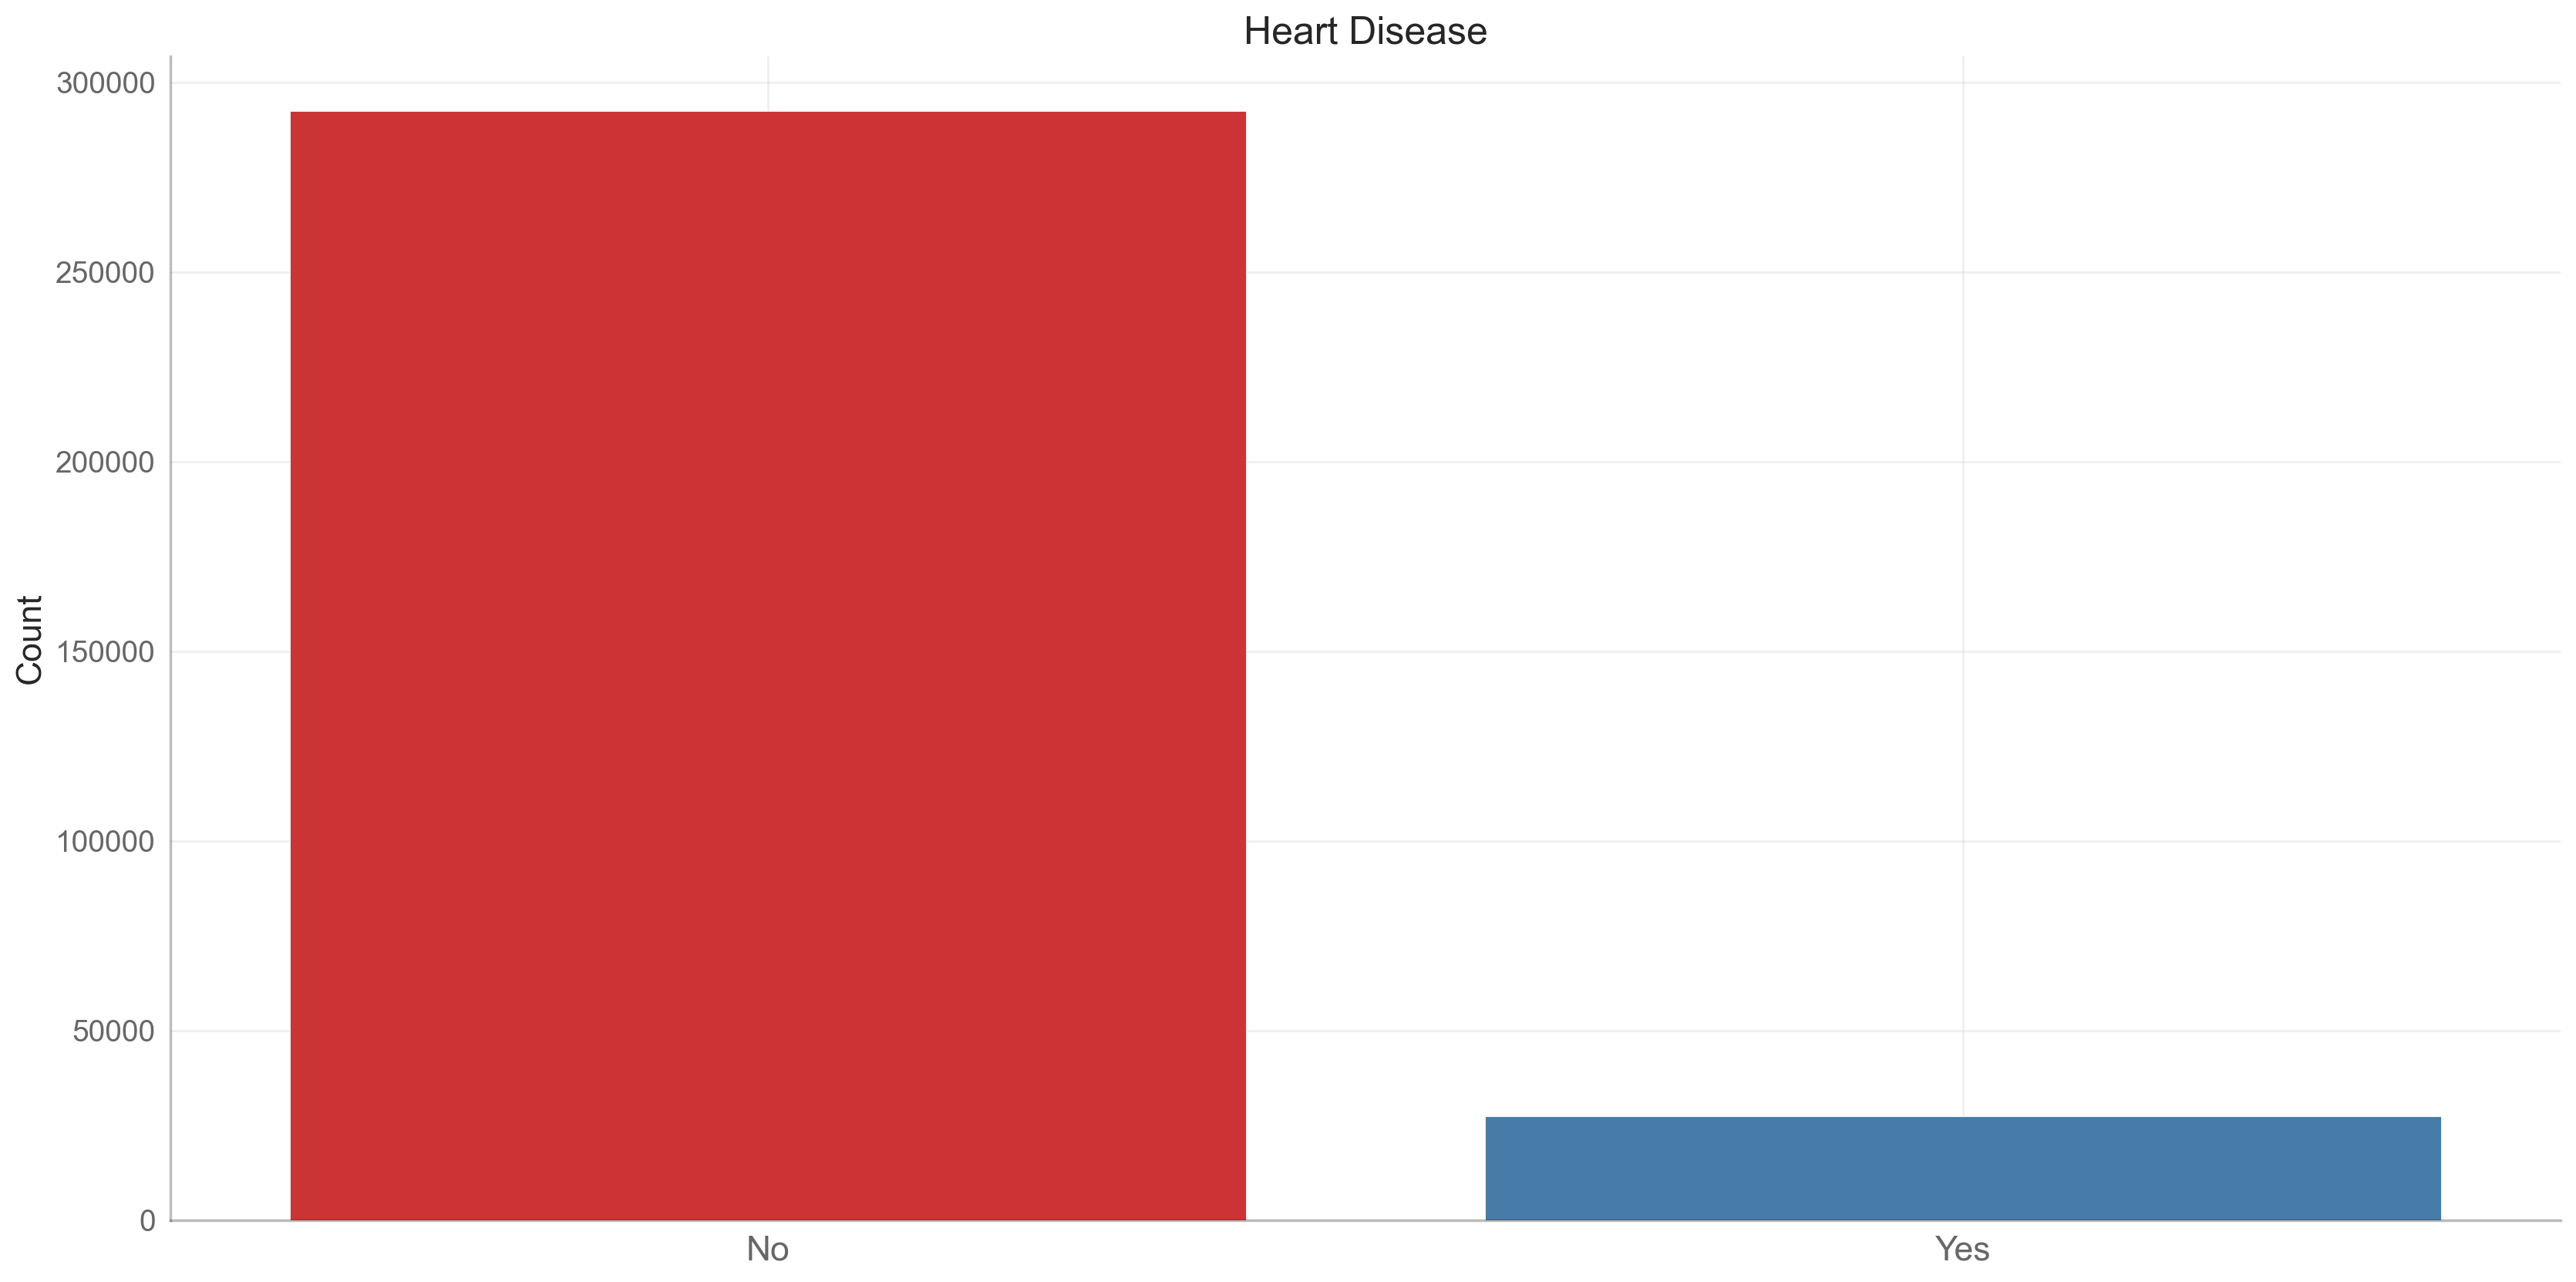

In [130]:
# Countplot for the variable "HeartDisease"
countplot(var='HeartDisease')

The graph above shows a significant disproportion between people with and without heart disease in the dataset. Therefore, the EDA for categorical data will utilize normalized values.

#### 1.4.2. Smoking

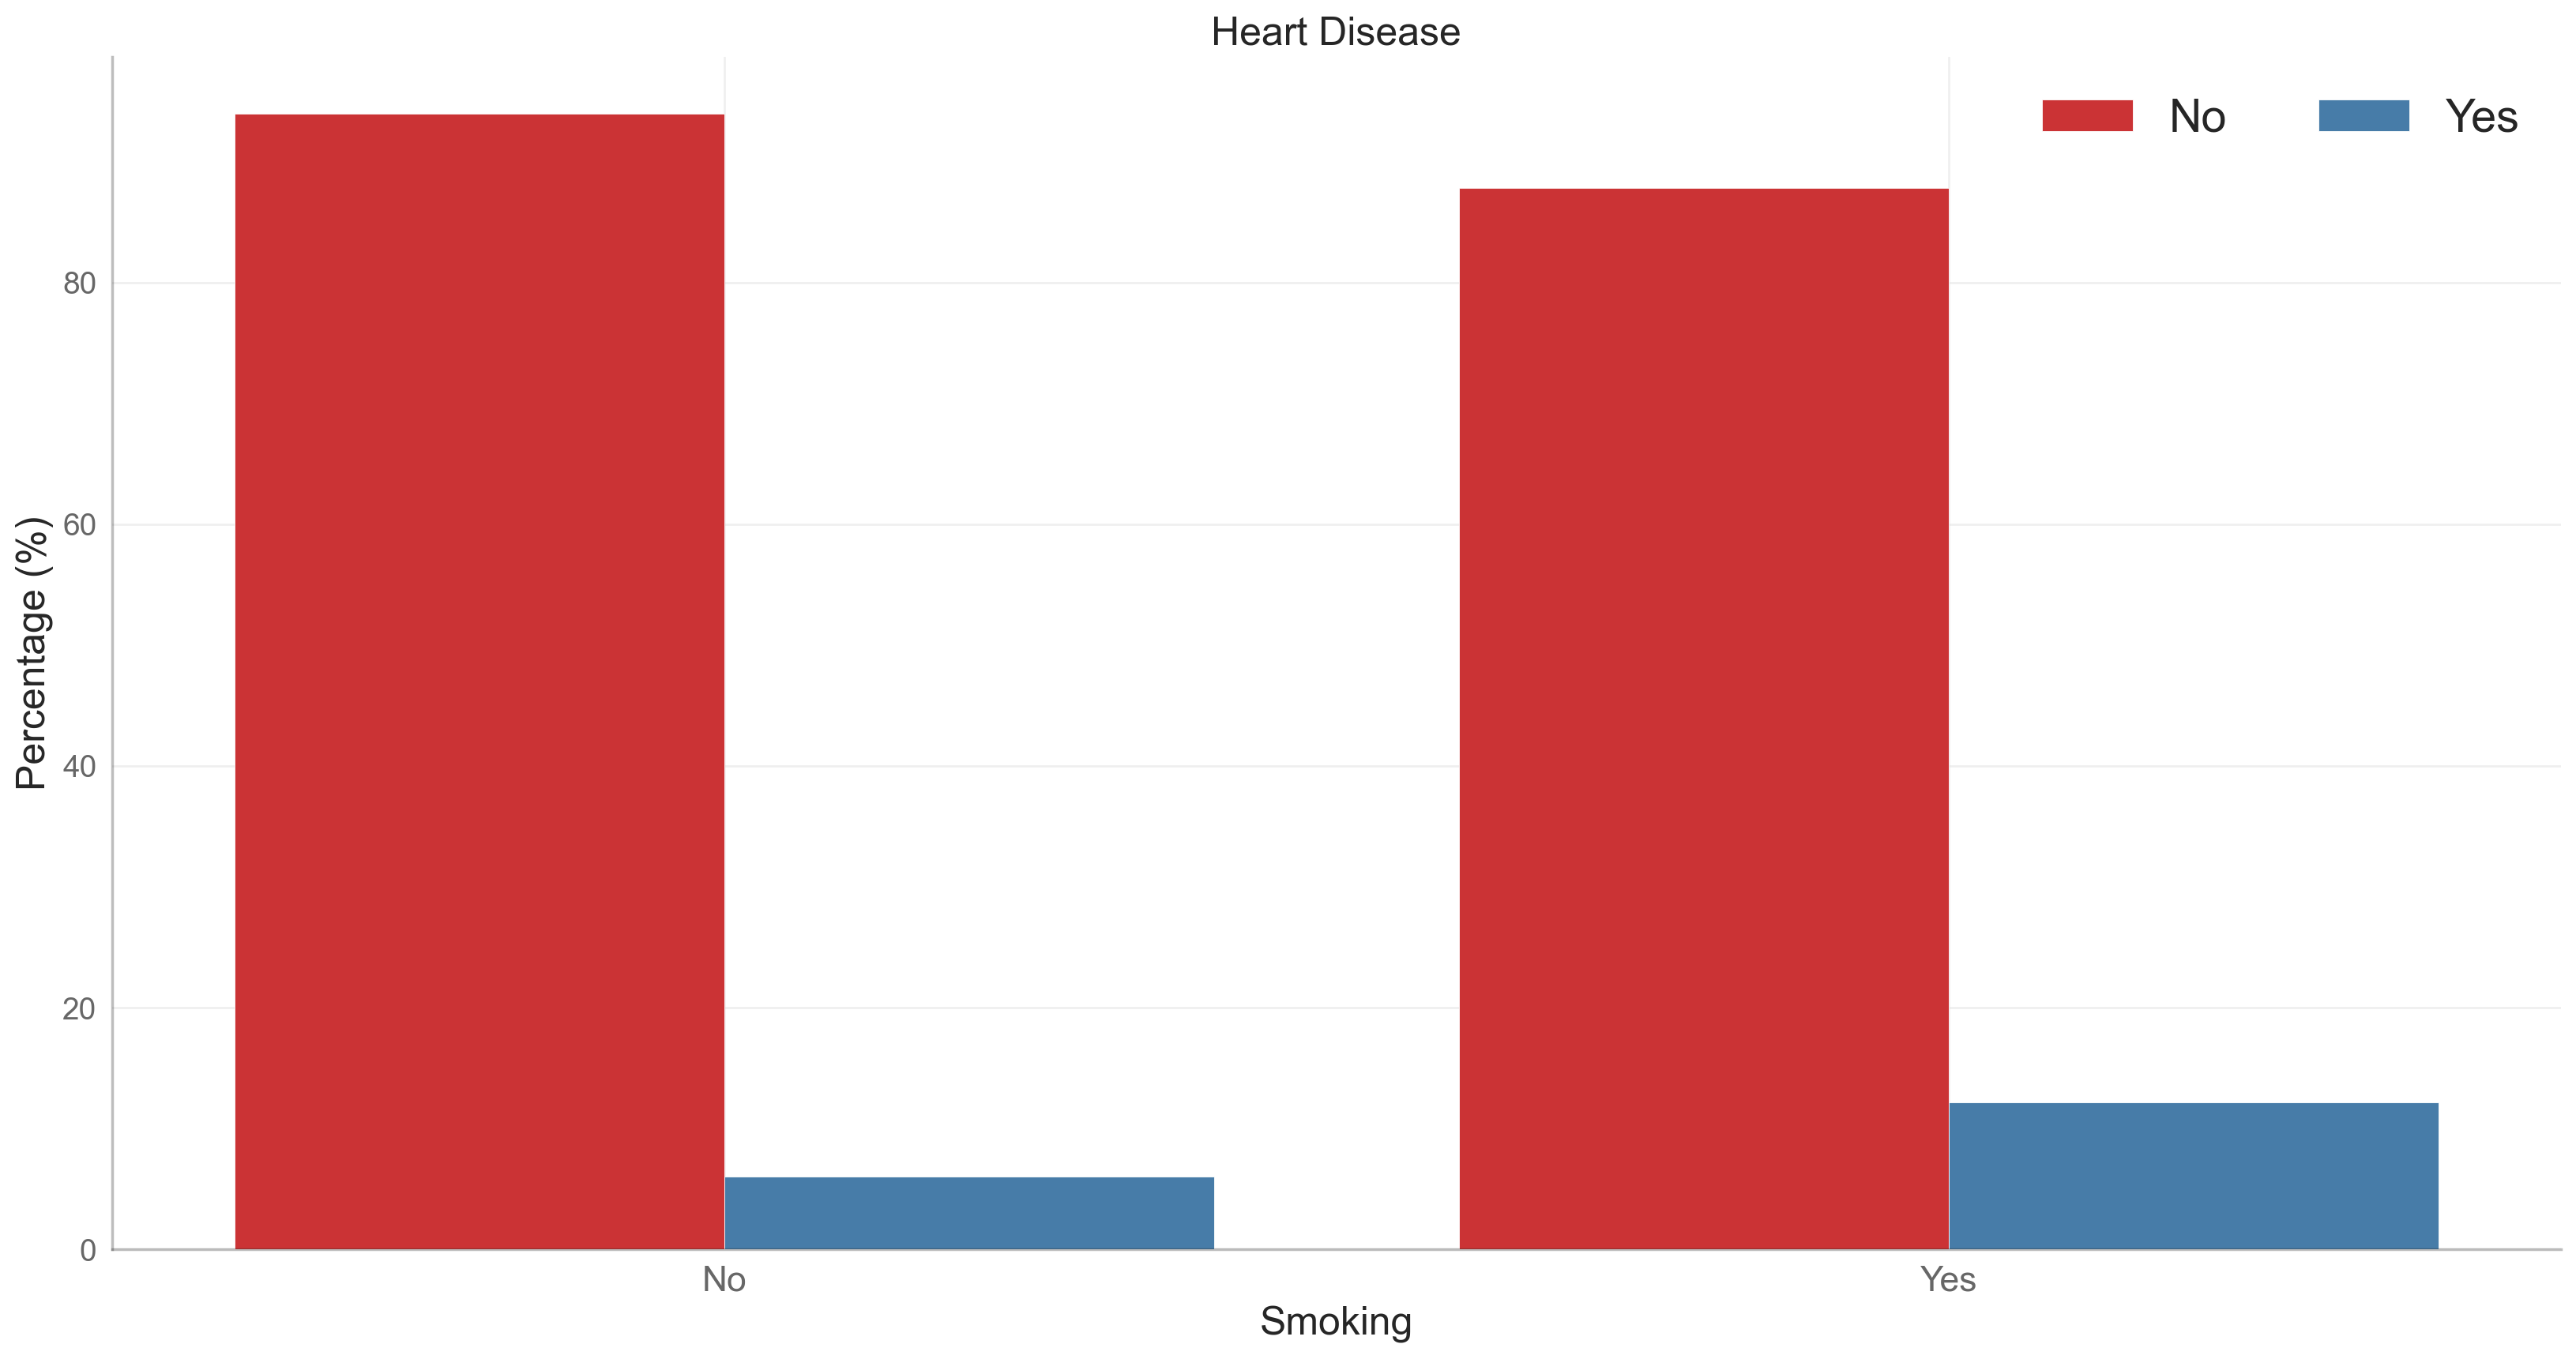

In [131]:
# Barplot for "Smoking"
barplot('Smoking')

The graph above shows a notable prevalence of Heart Disease for people with smoking habits.

#### 1.4.3. Alcohol Drinking

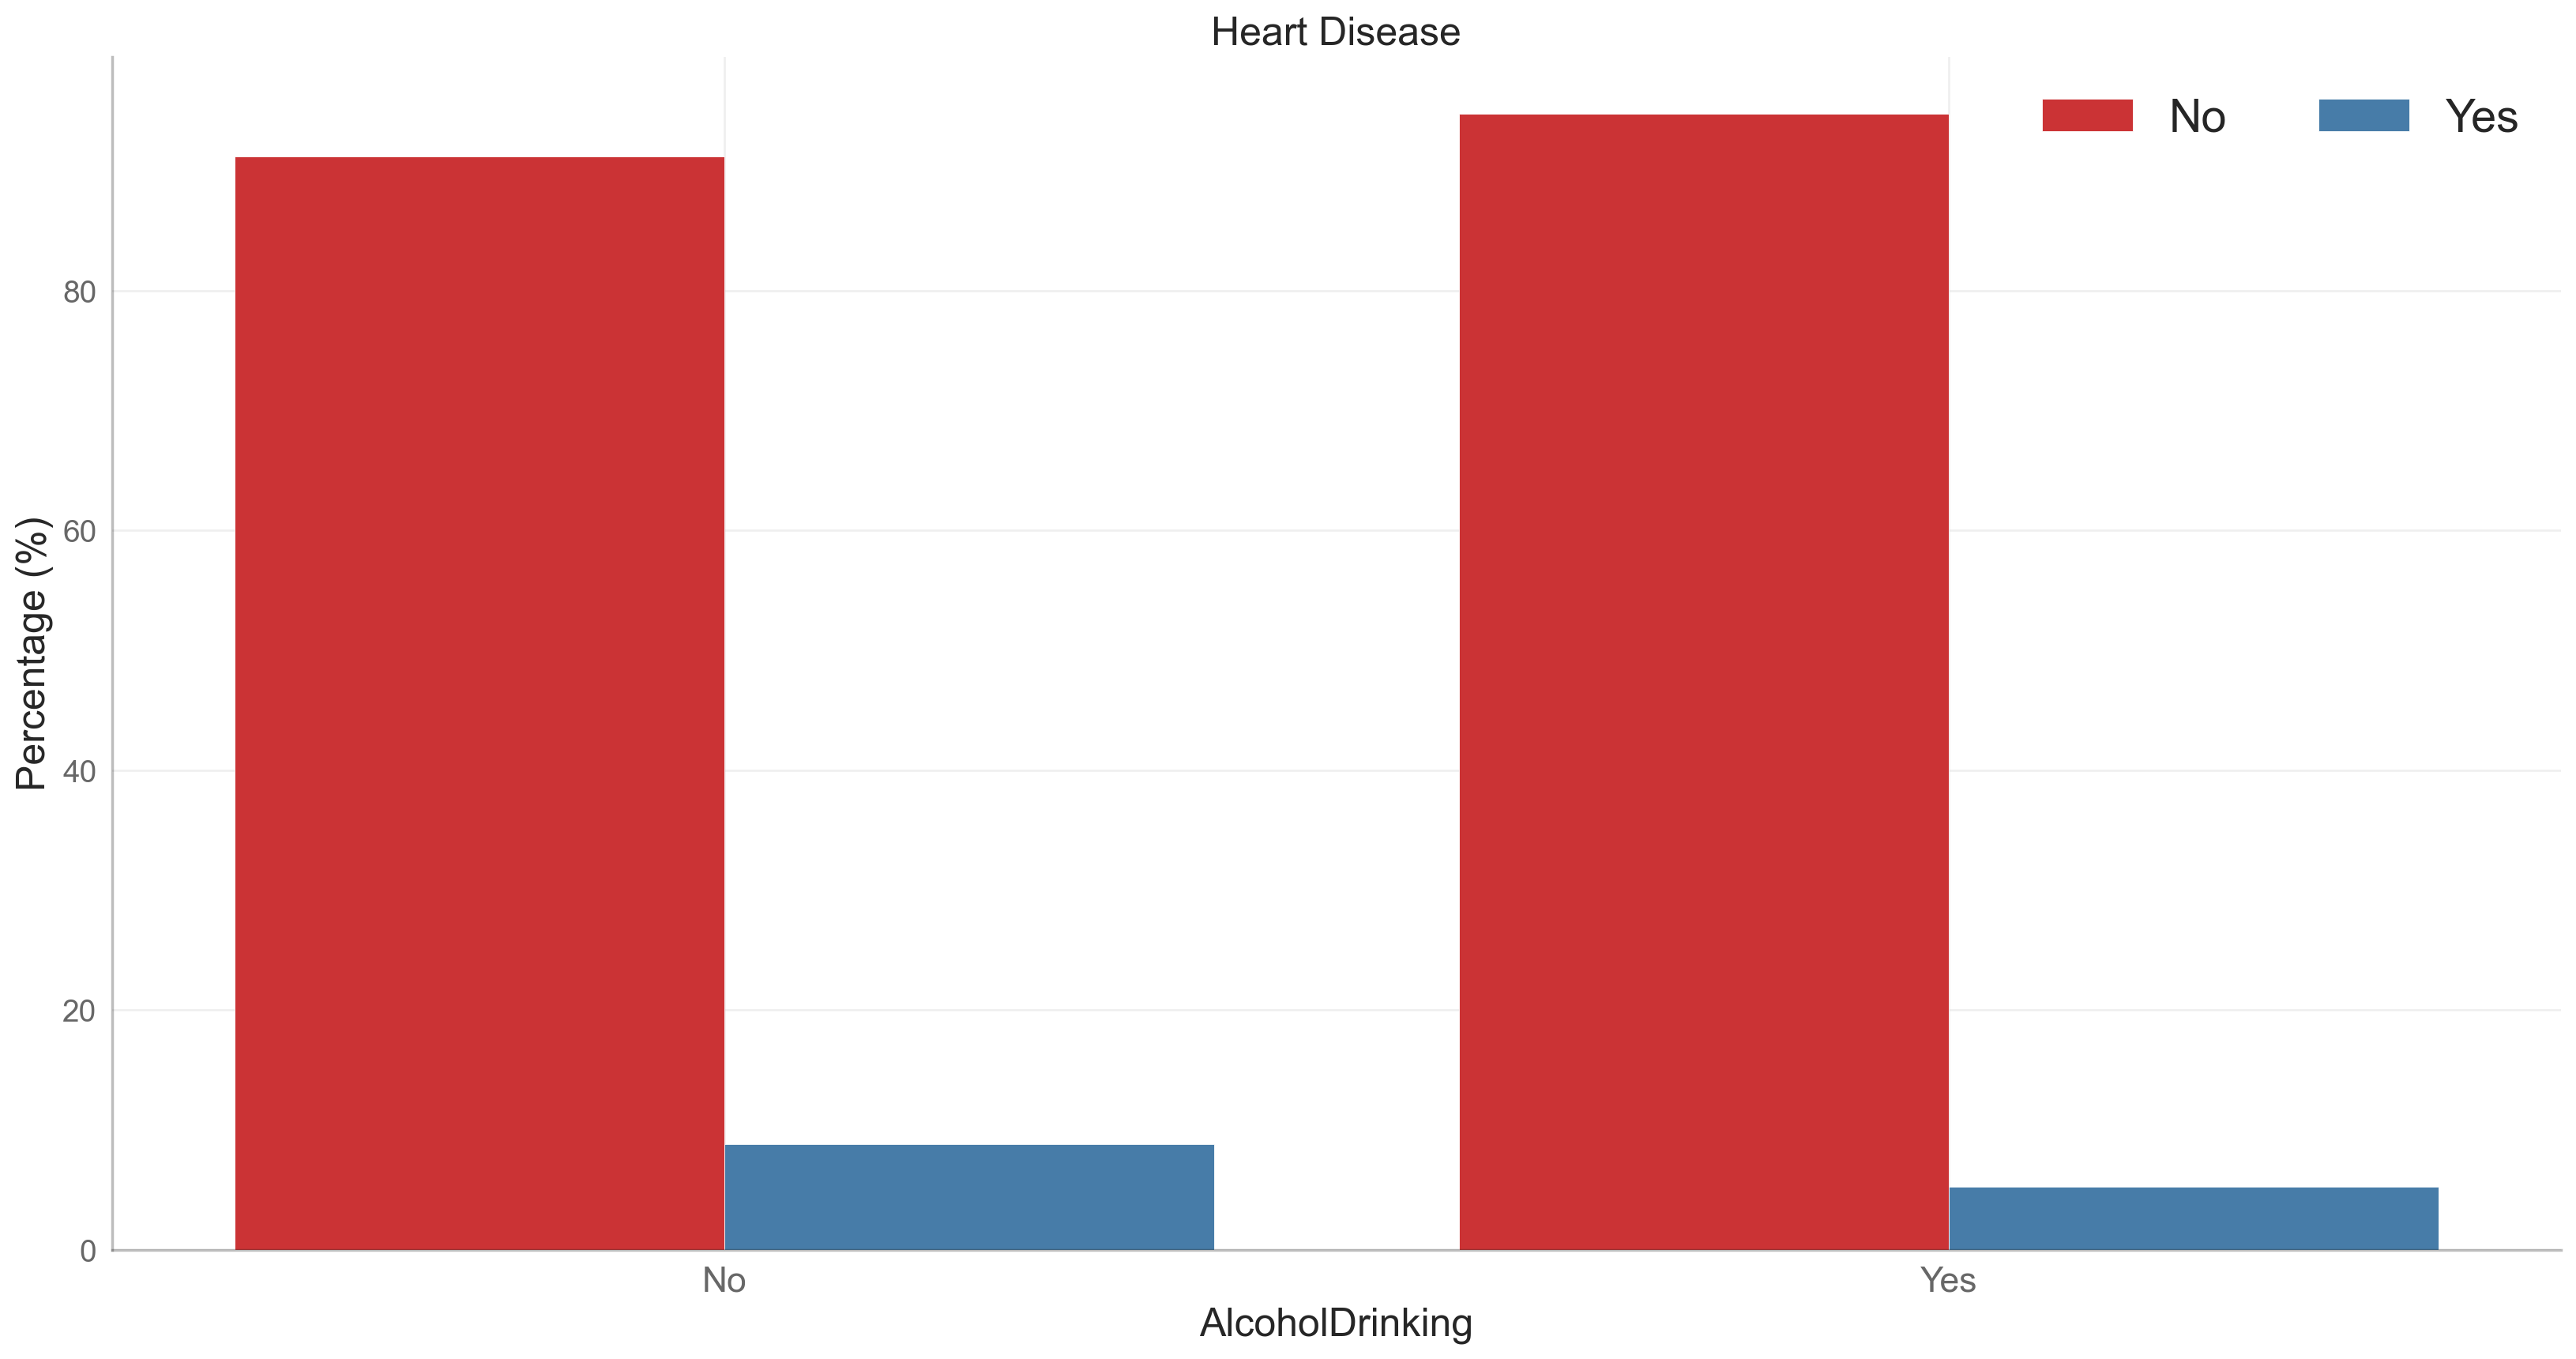

In [132]:
# Barplot for "AlcoholDrinking"
barplot('AlcoholDrinking')

Surprisingly the graph shows a notable prevalence of Heart Disease for people who don't have heavy drinking habits.

#### 1.4.4.  Stroke

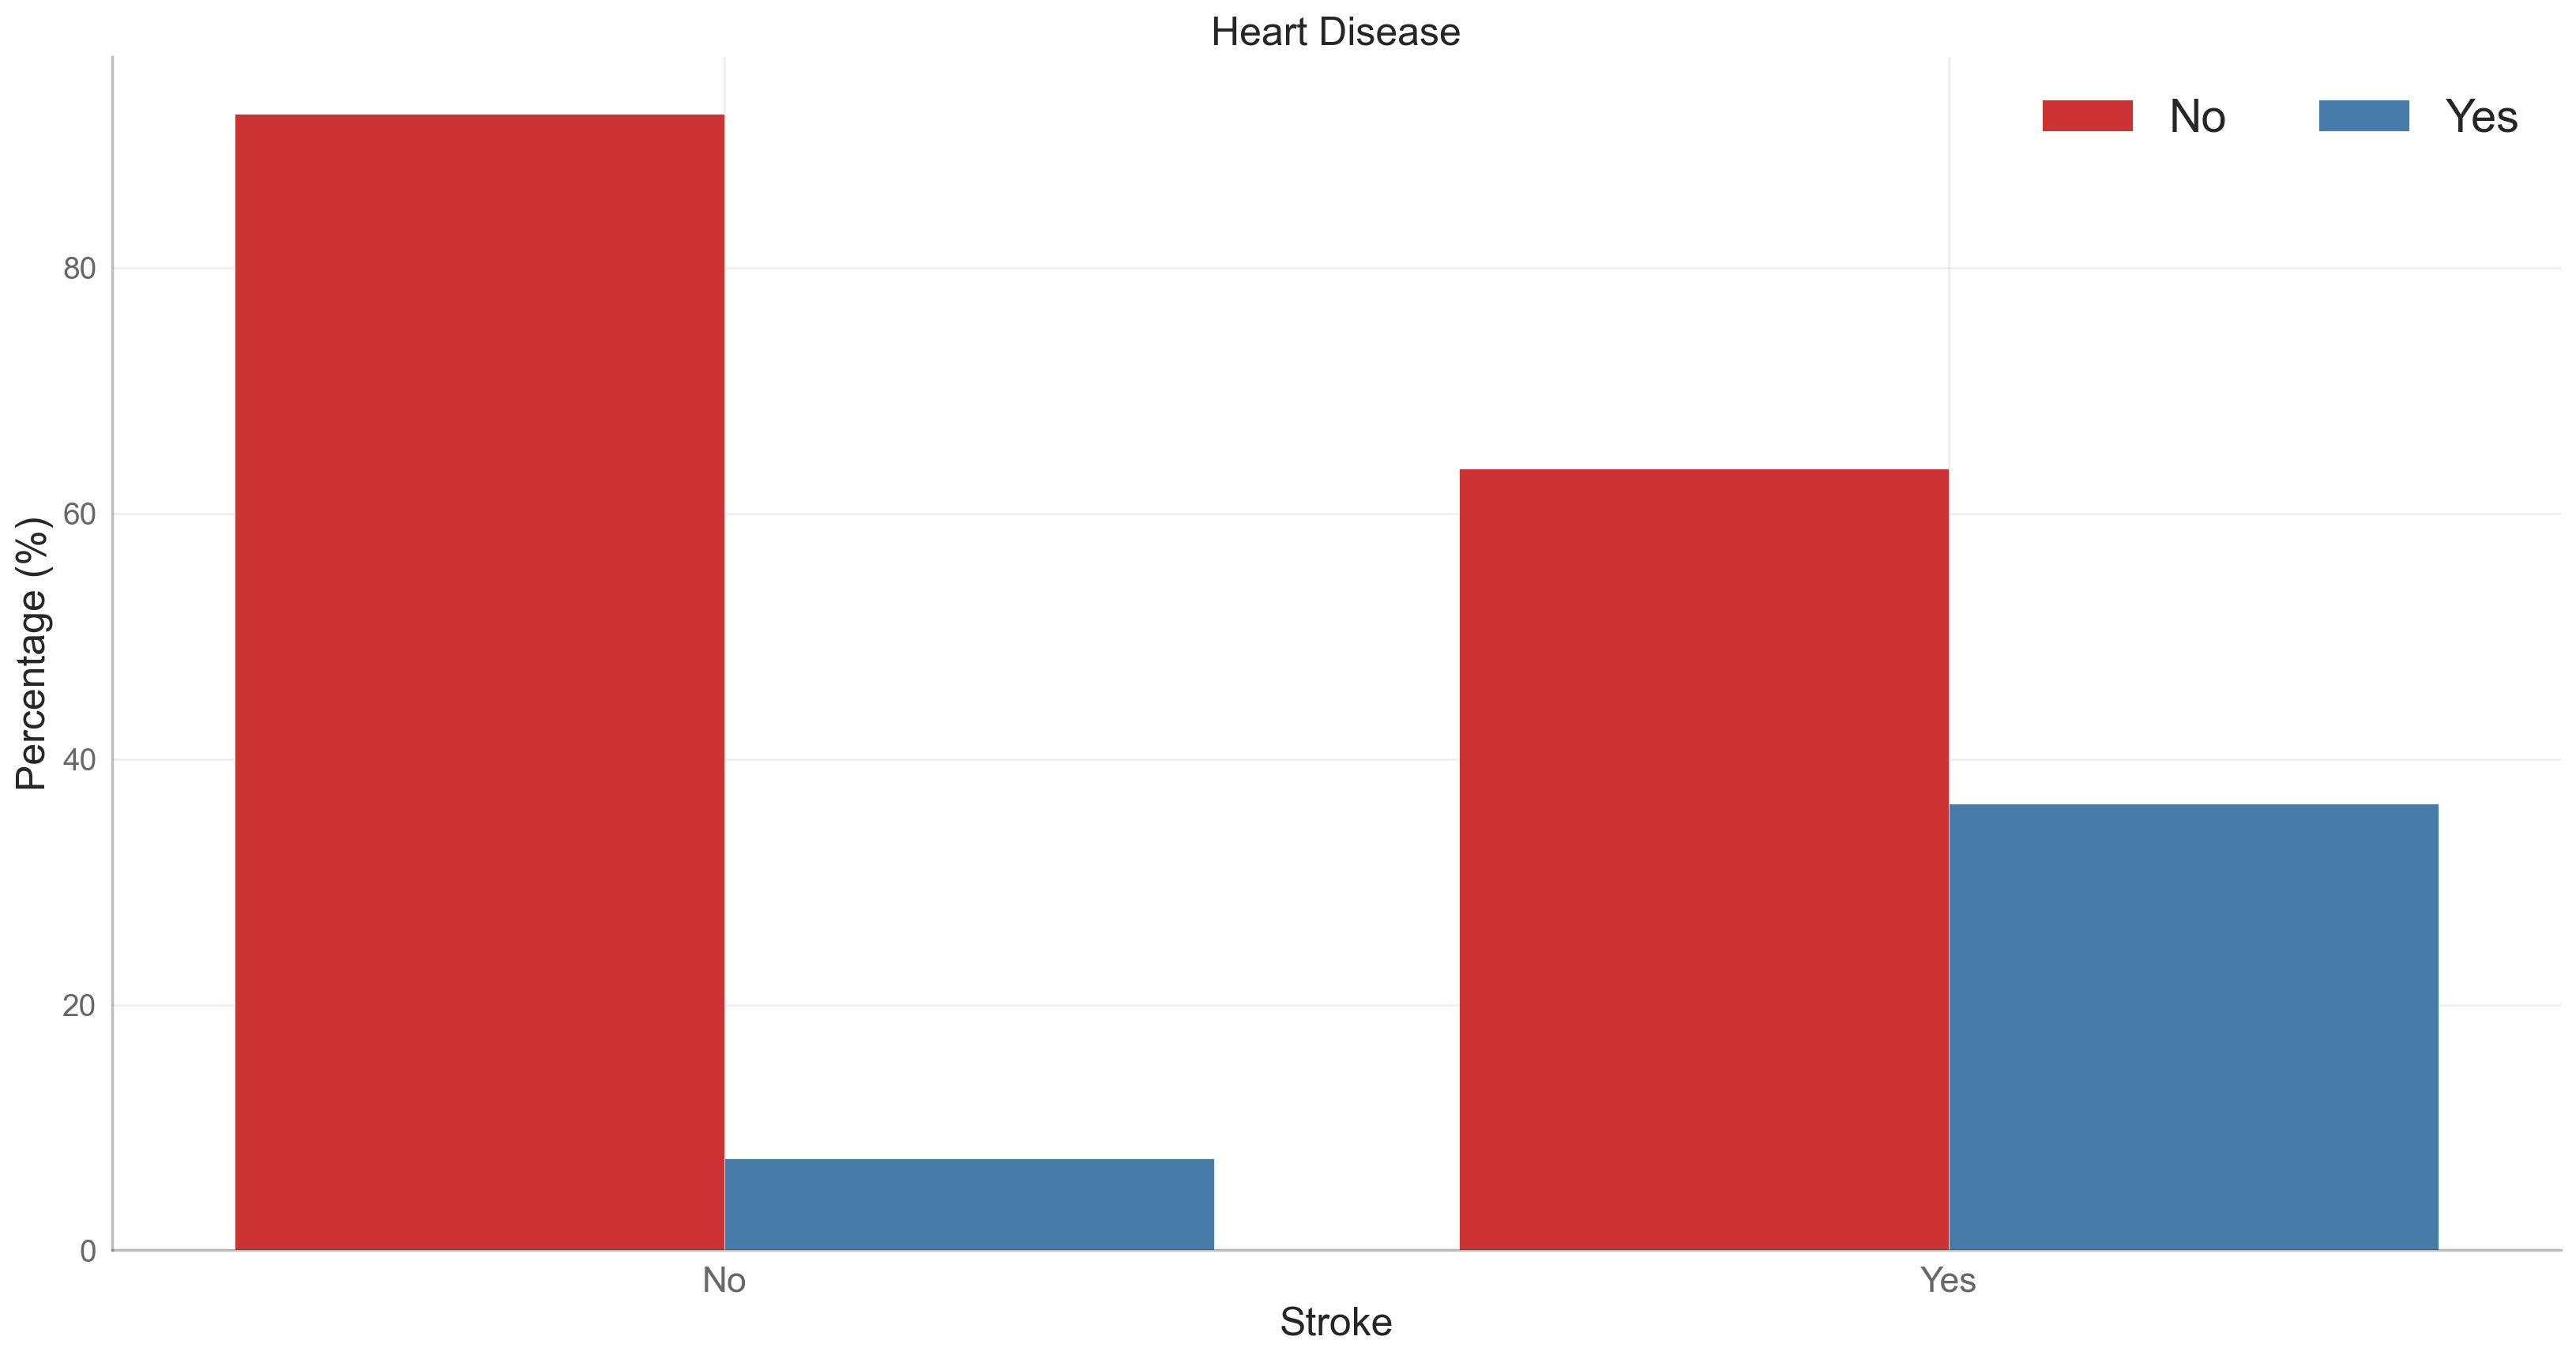

In [133]:
# Barplot for "Stroke"
barplot('Stroke')

There is a huge difference between people who had and hadn’t had a Stroke, demonstrating that this variable is an important factor for indicating if a person has heart disease.

#### 1.4.5. Difficulty Walking

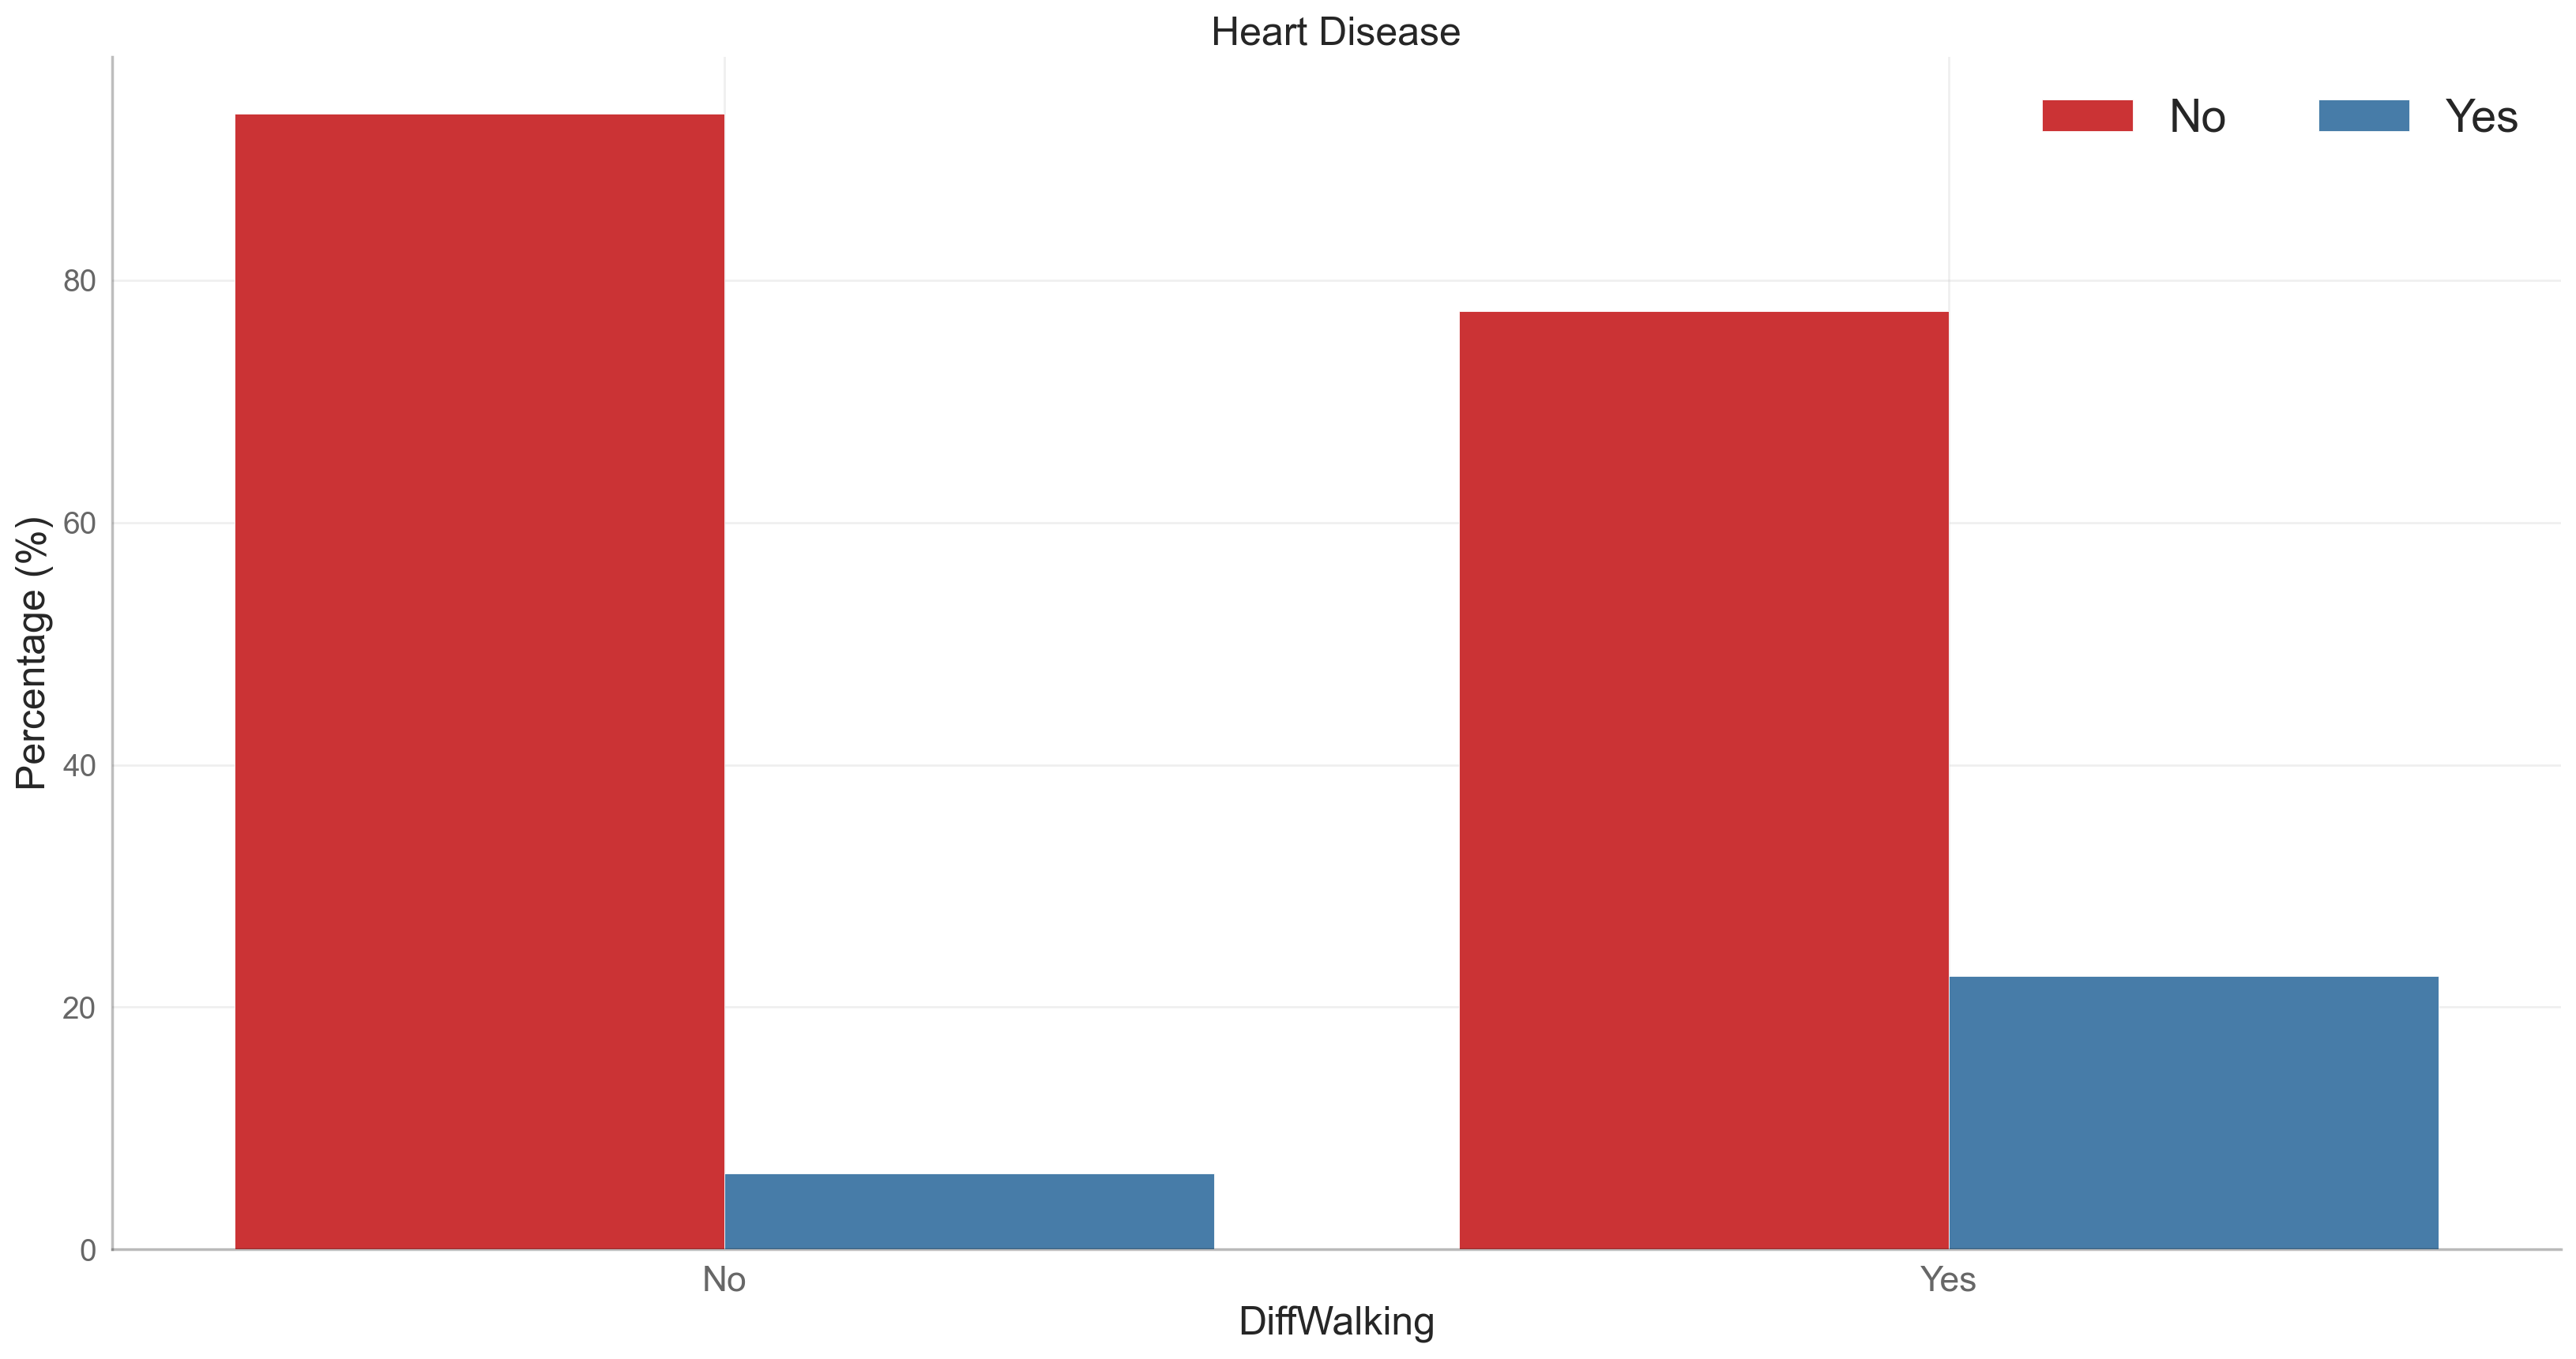

In [134]:
# Barplot for "DiffWalking"
barplot('DiffWalking')

As happened with the variable "Stroke", the difficulty of walking is a relevant factor that contributes to a heart disease condition.

#### 1.4.6. Sex

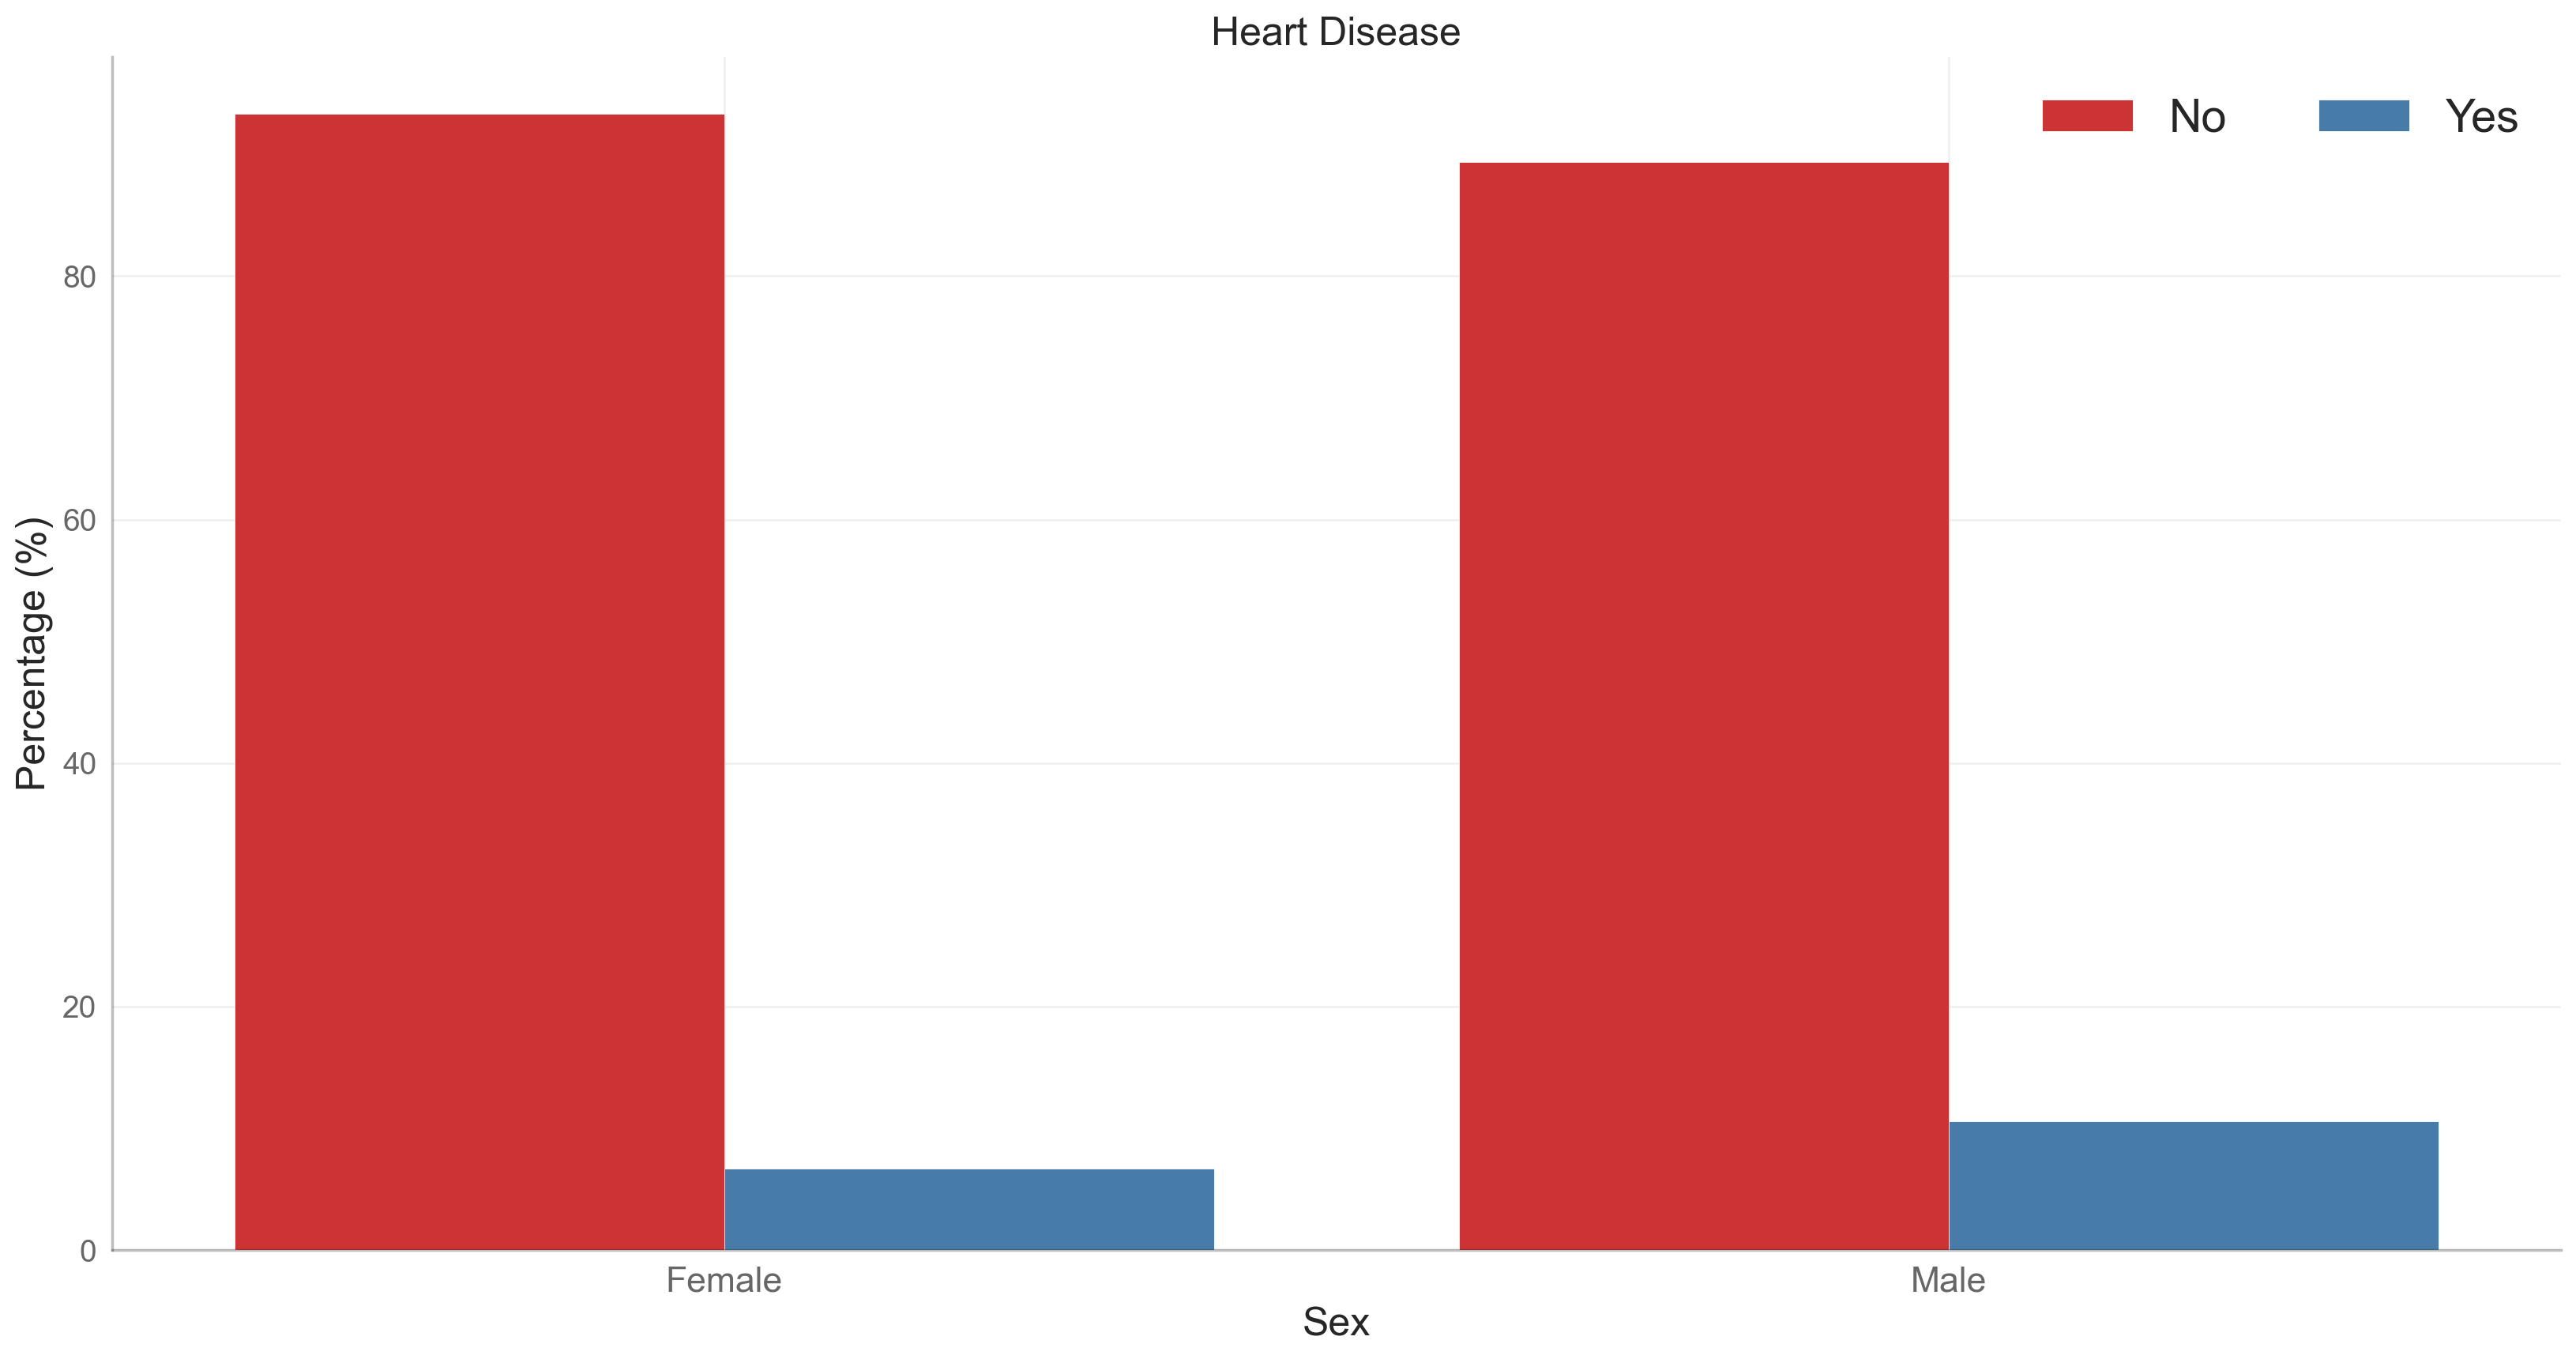

In [135]:
# Barplot for "Sex"
barplot('Sex')

There's a significant difference between the prevalence of Heart Disease between "Female" and "Male", with men having a bigger chance of having heart disease.

#### 1.4.7. Age Category

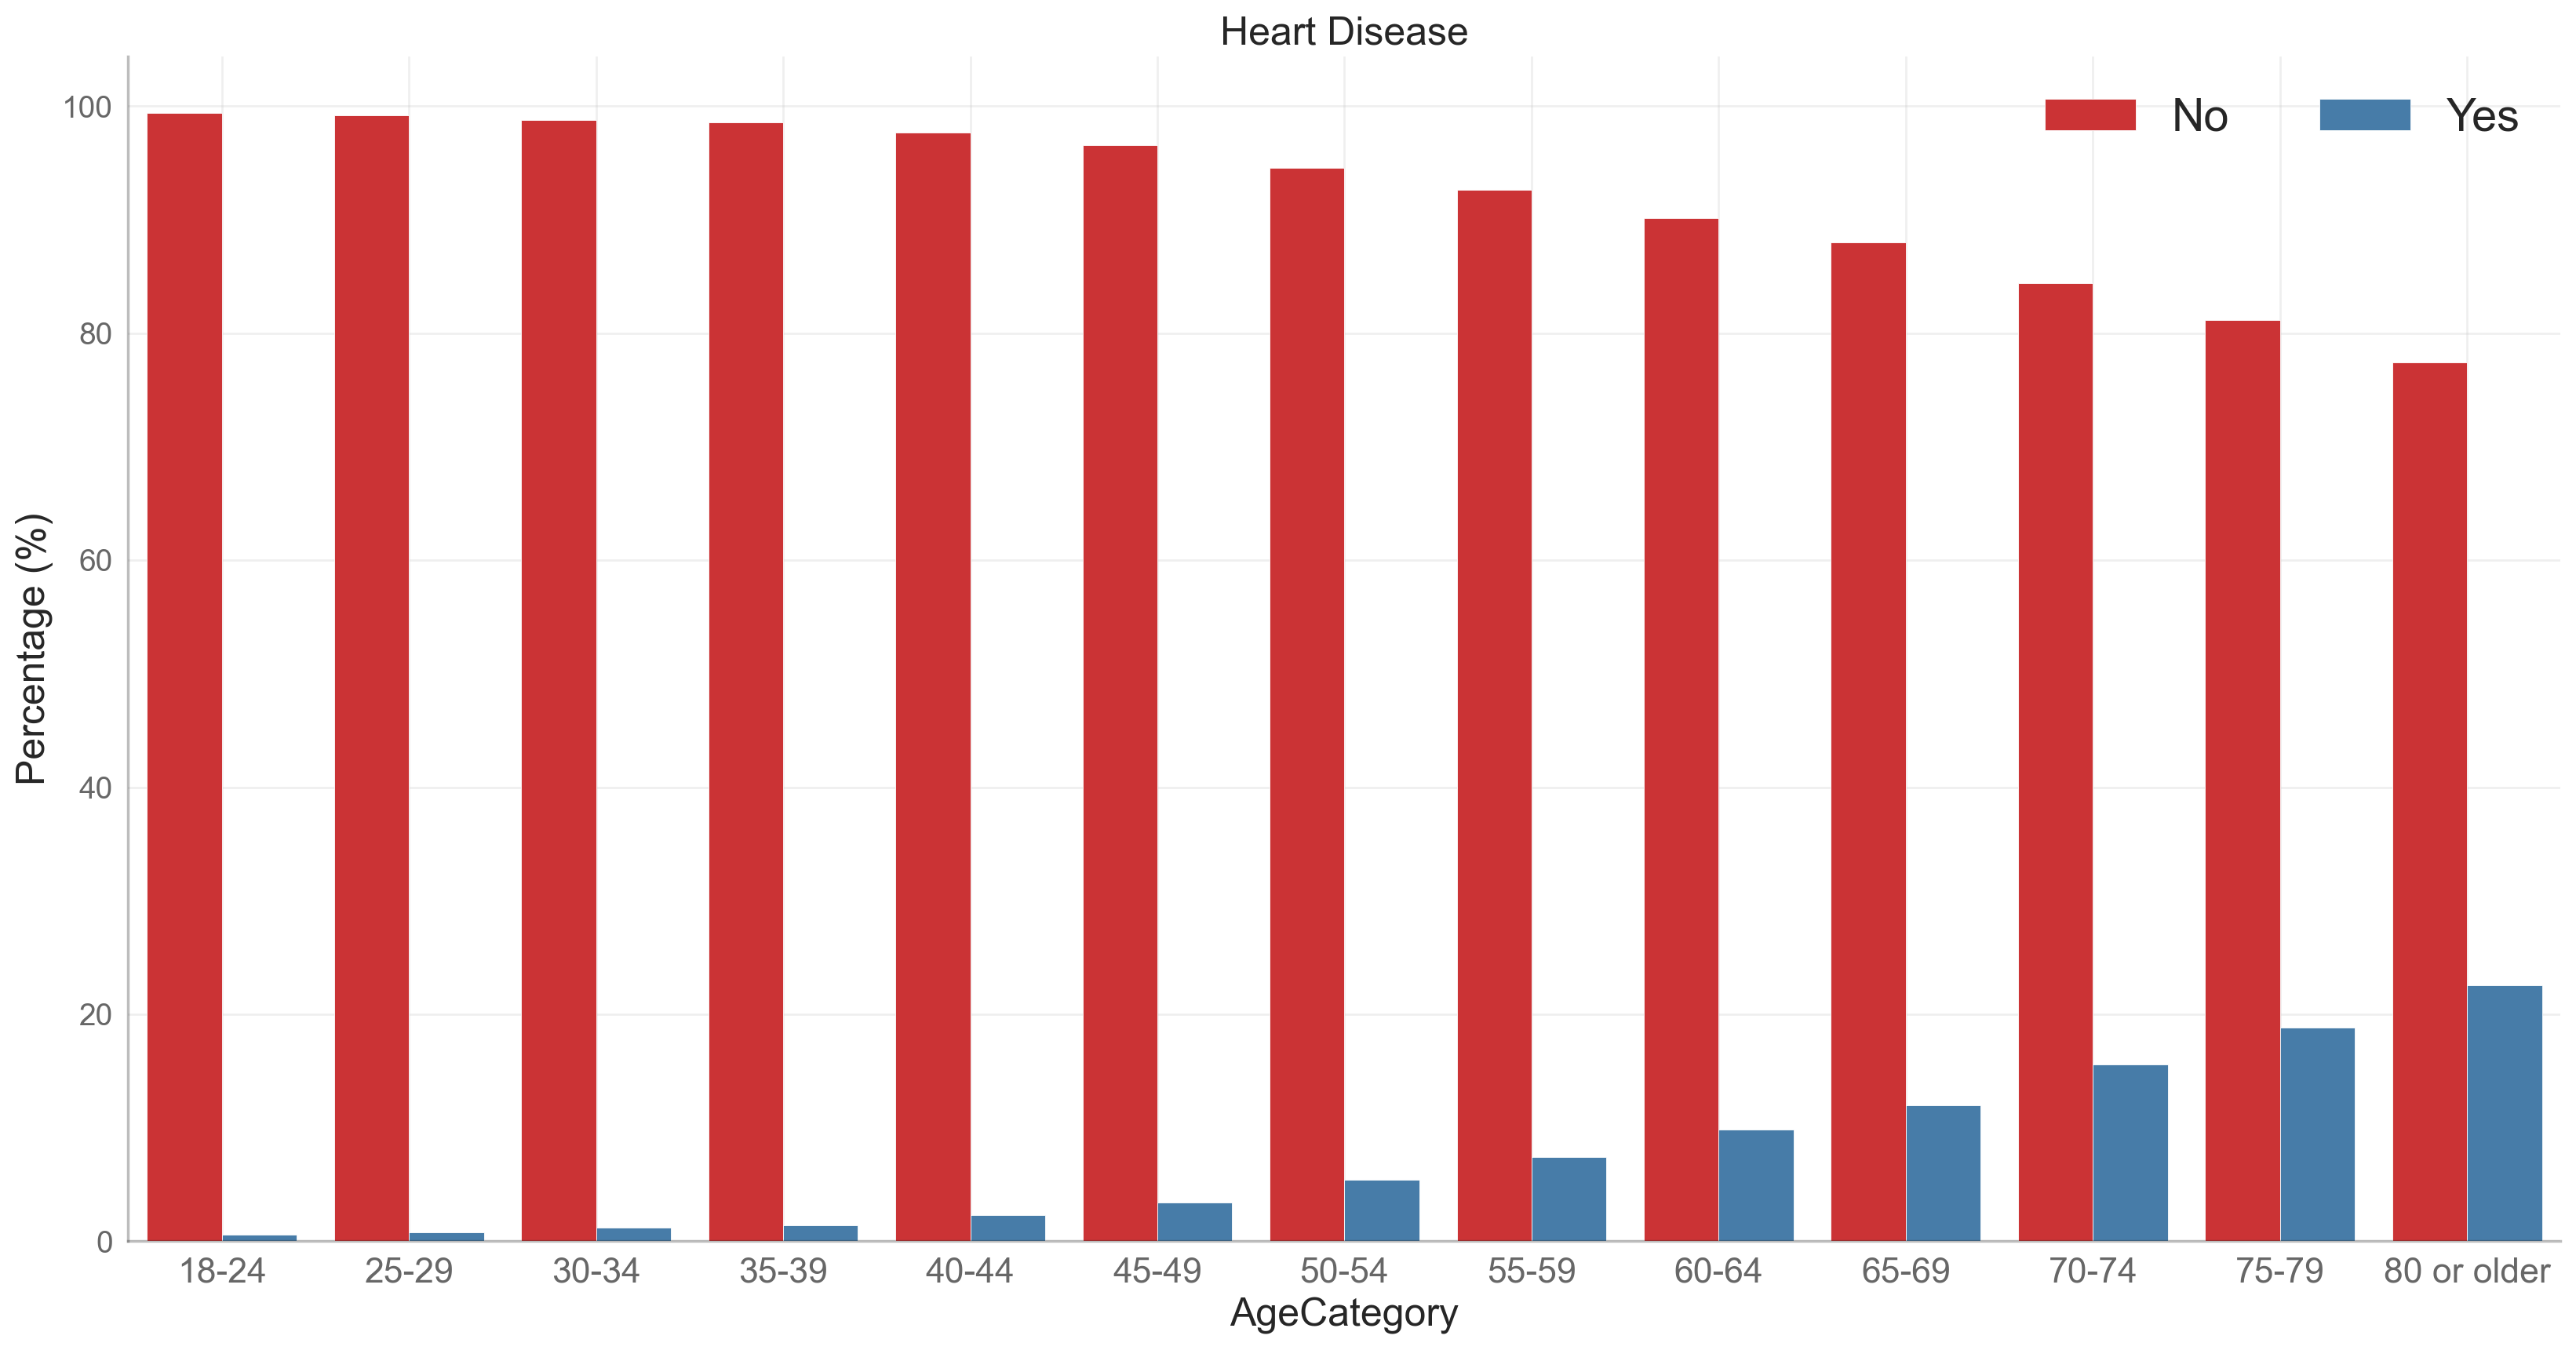

In [136]:
# Barplot for "AgeCategory"
barplot('AgeCategory')

As expected, as the person grows older, the more the chance for having heart disease. The graph above shows a perceptible exponential growth for the prospect of having heart disease.

#### 1.4.8. Race

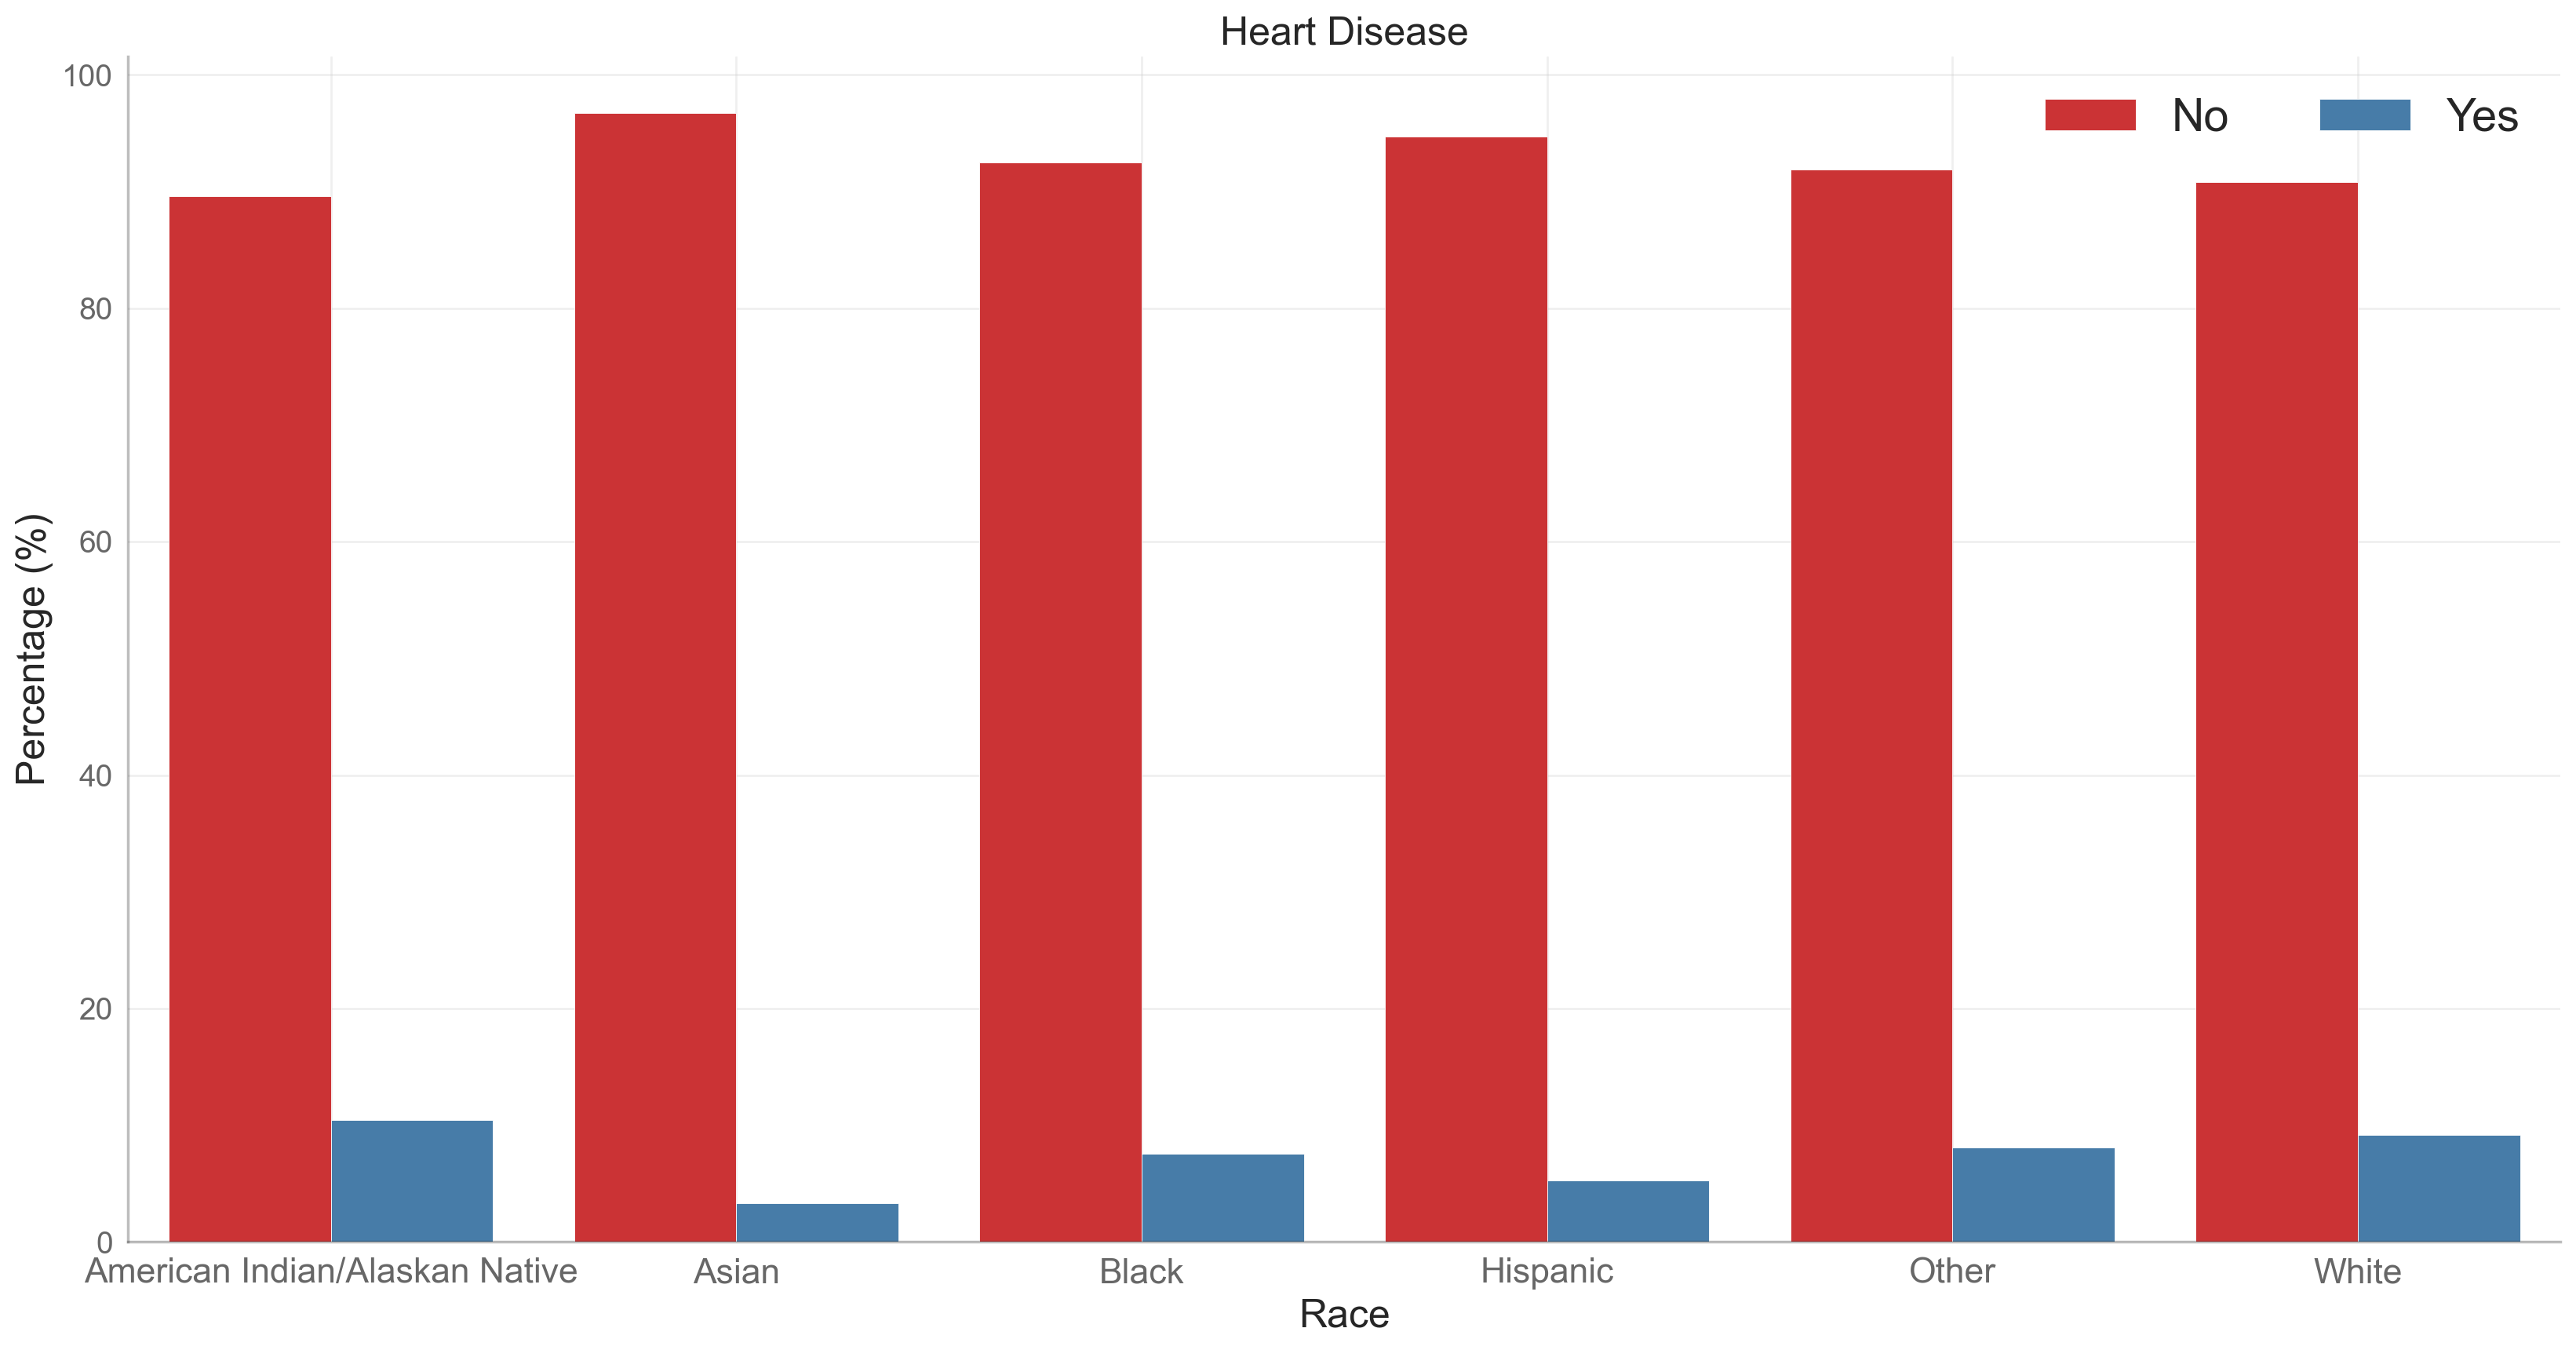

In [137]:
# Barplot for "Race"
barplot('Race')

Asian people seem to be less susceptible to having heart disease in comparison with the others categories. In contrast, "American Indian/Alaskan Native" has a considerable tendency of heart disease.

#### 1.4.9. Diabetic

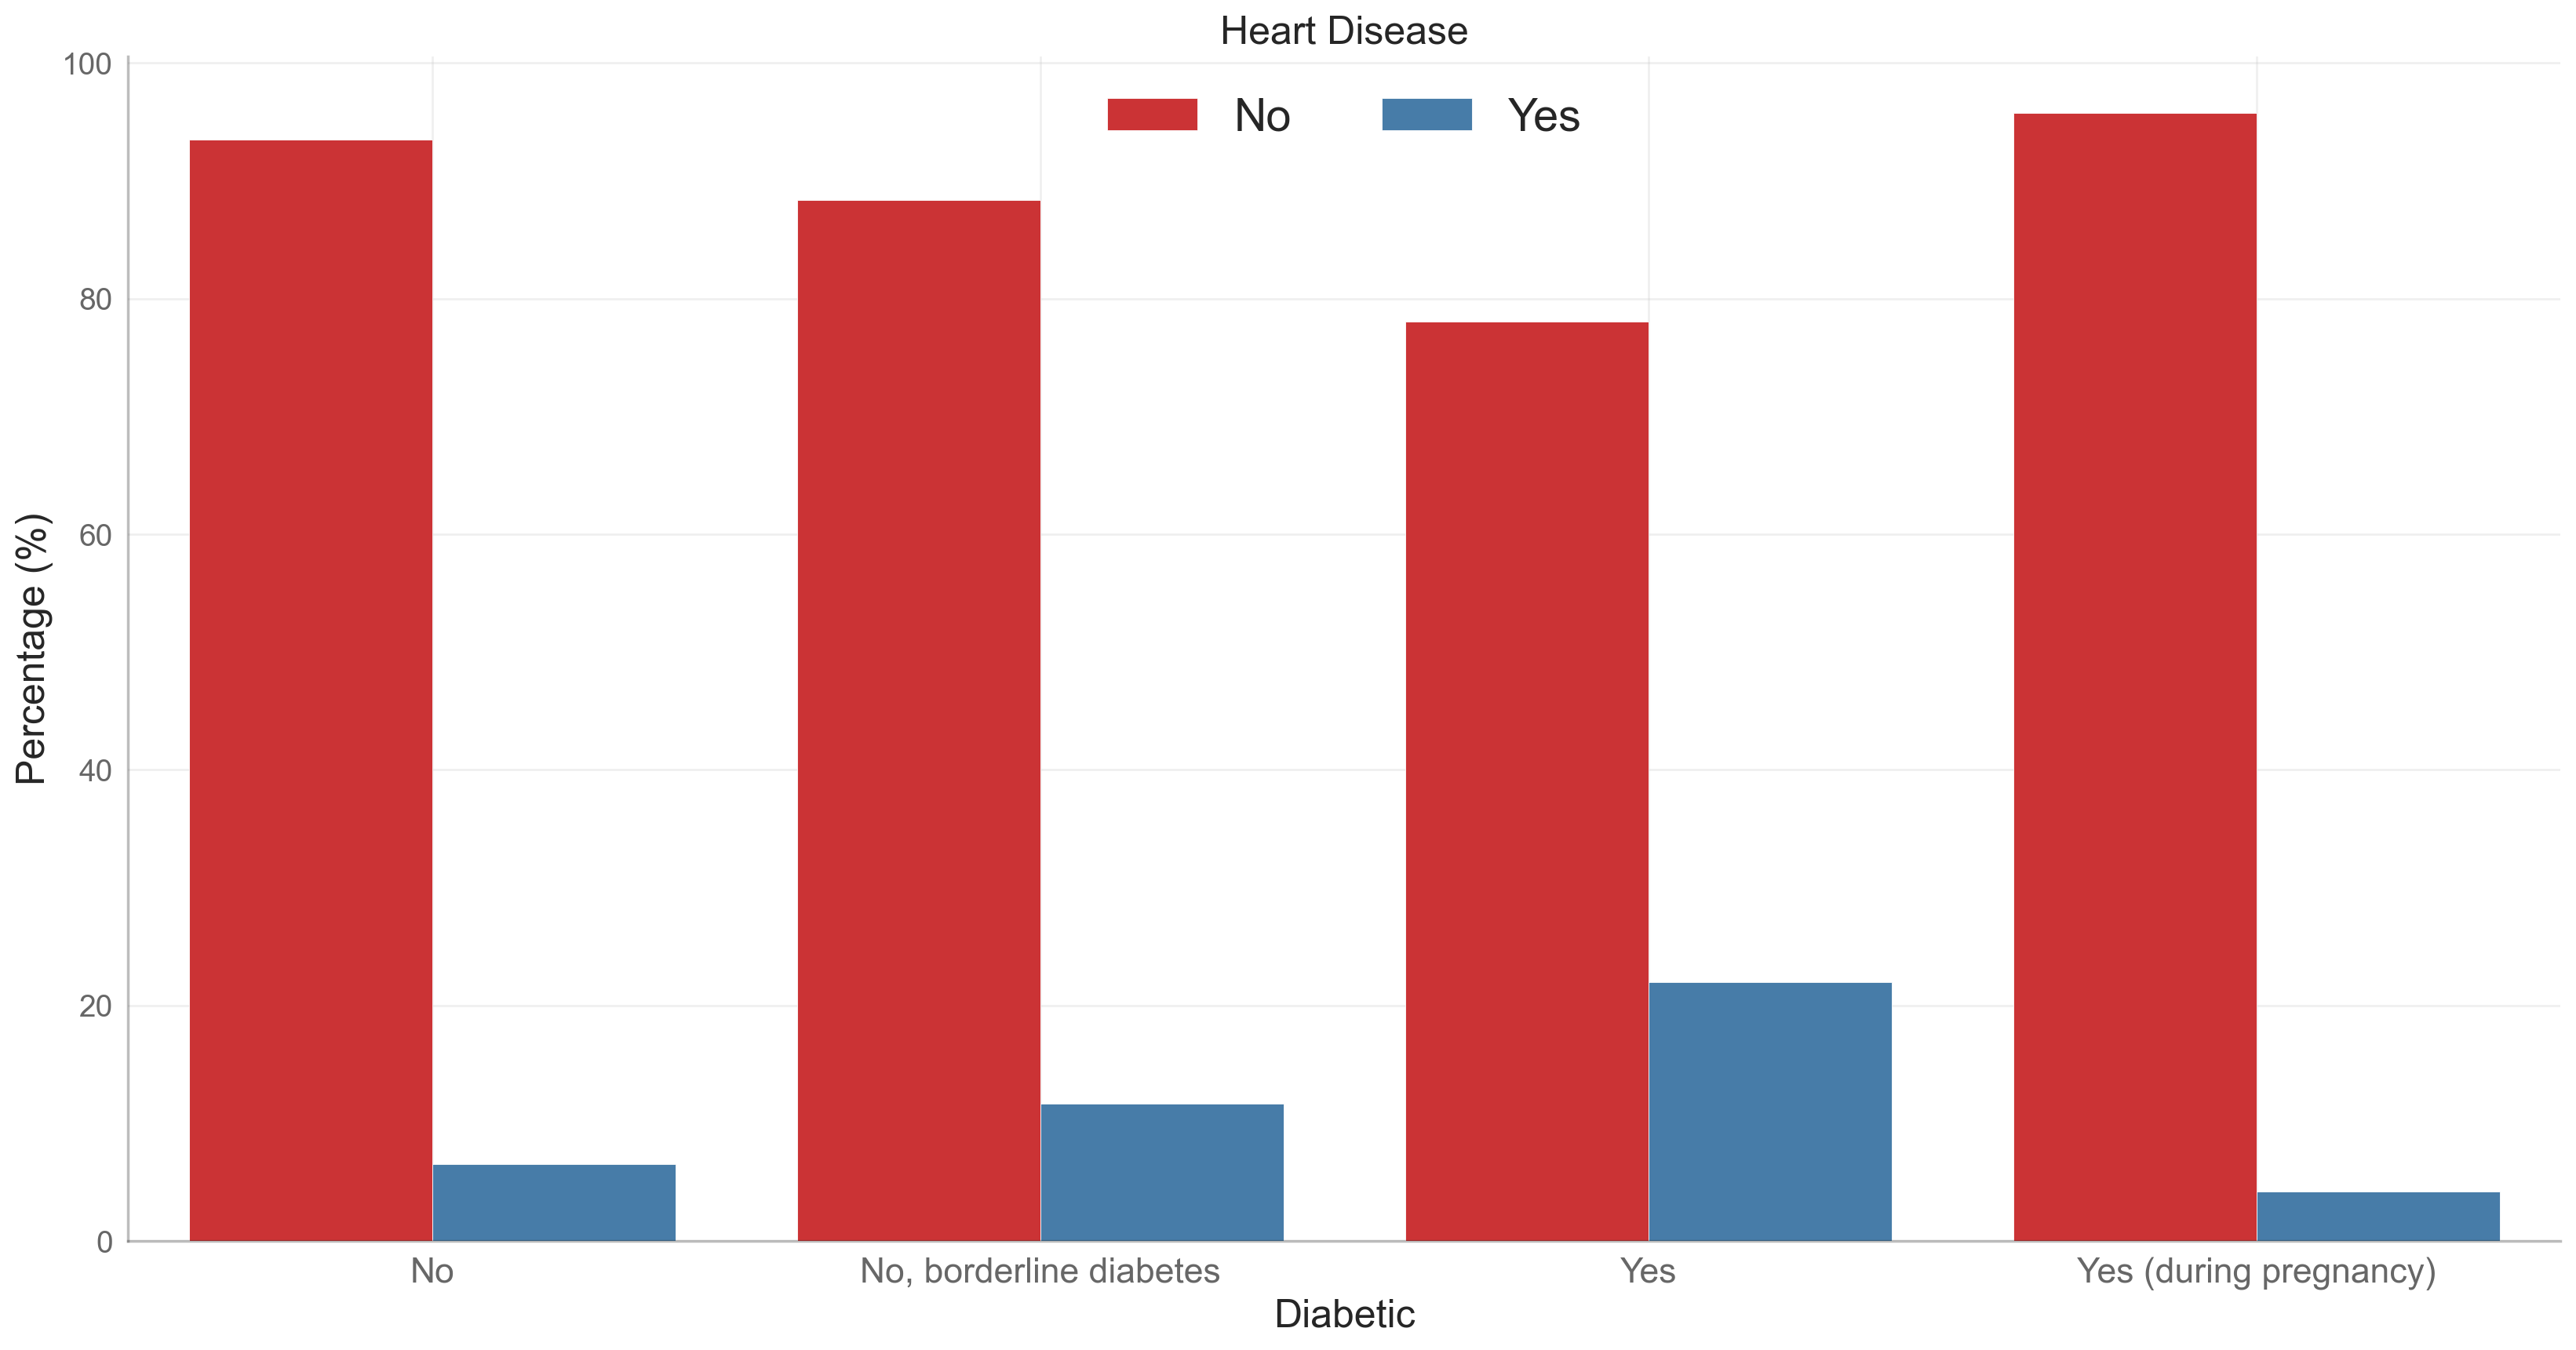

In [138]:
# Barplot for "Diabetic"
barplot('Diabetic')

Diabetes seems to be a relevant factor for the prevalence of having heart disease, with borderline diabetes having an intermediate pattern between having and not having diabetes. Gestational diabetes doesn't seem to be a risk factor compared with other types of diabetes.

#### 1.4.10. Physical Activity

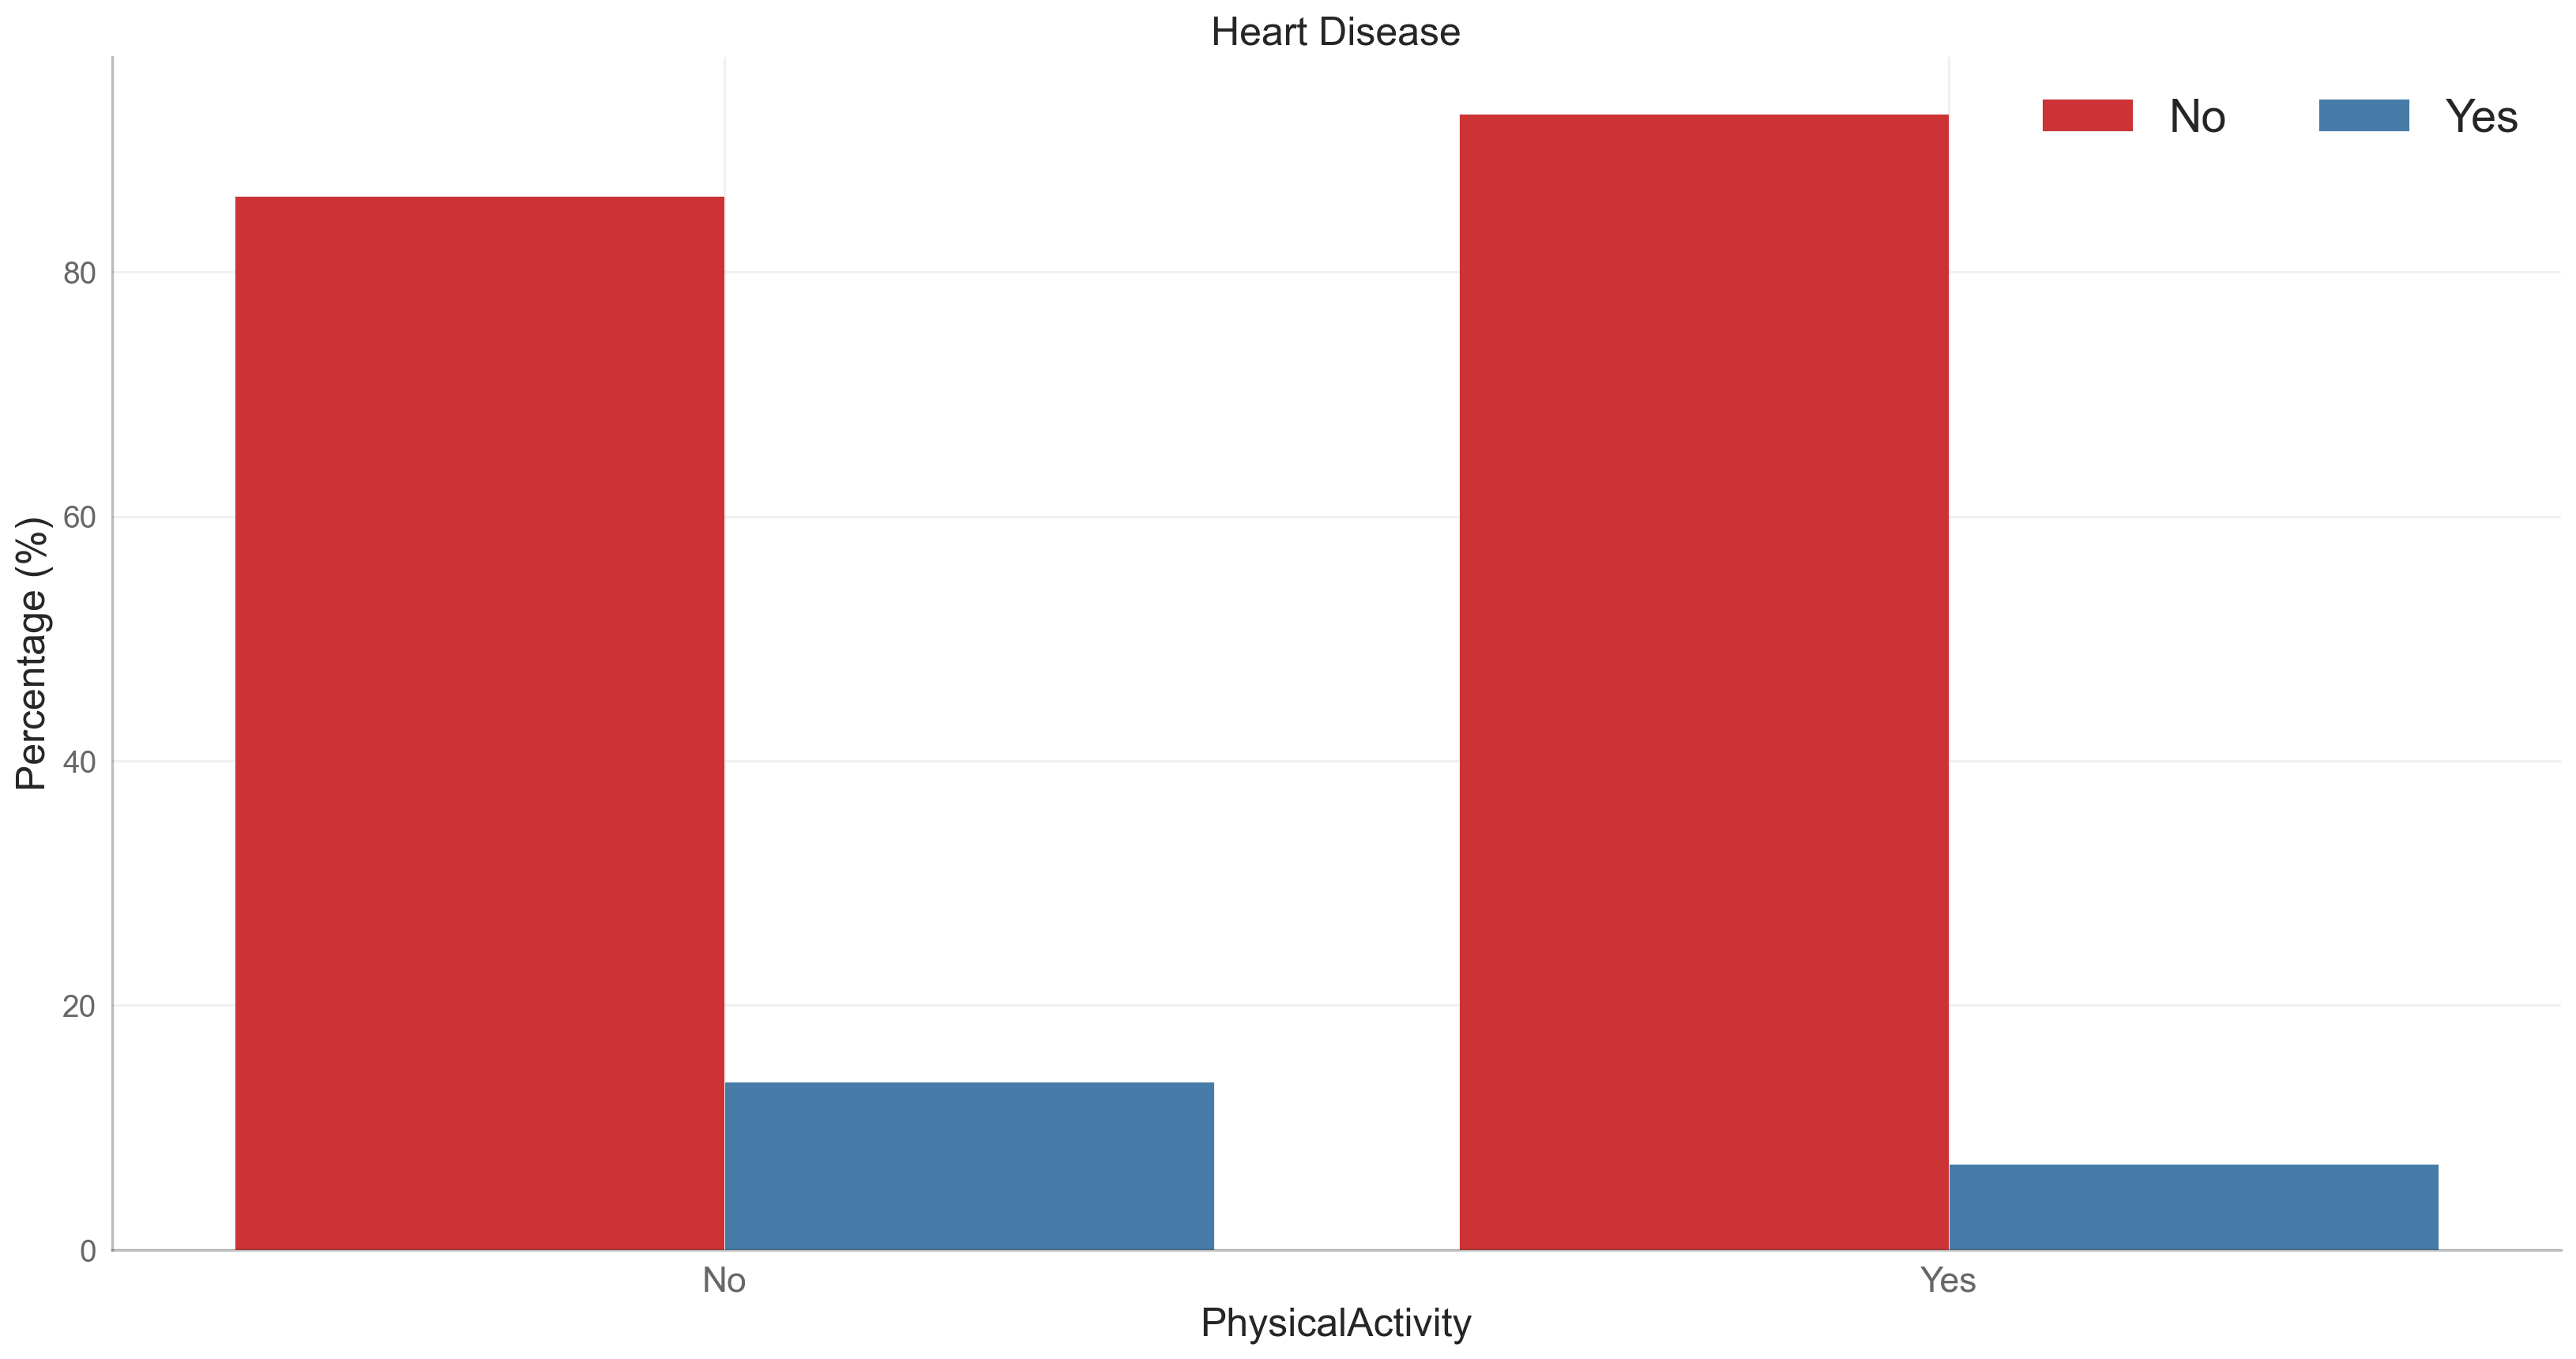

In [139]:
# Barplot for "PhysicalActivity"
barplot('PhysicalActivity')

People with less Physical Activity tend to be more propitious to acquire heart disease.

#### 1.4.11. General Health

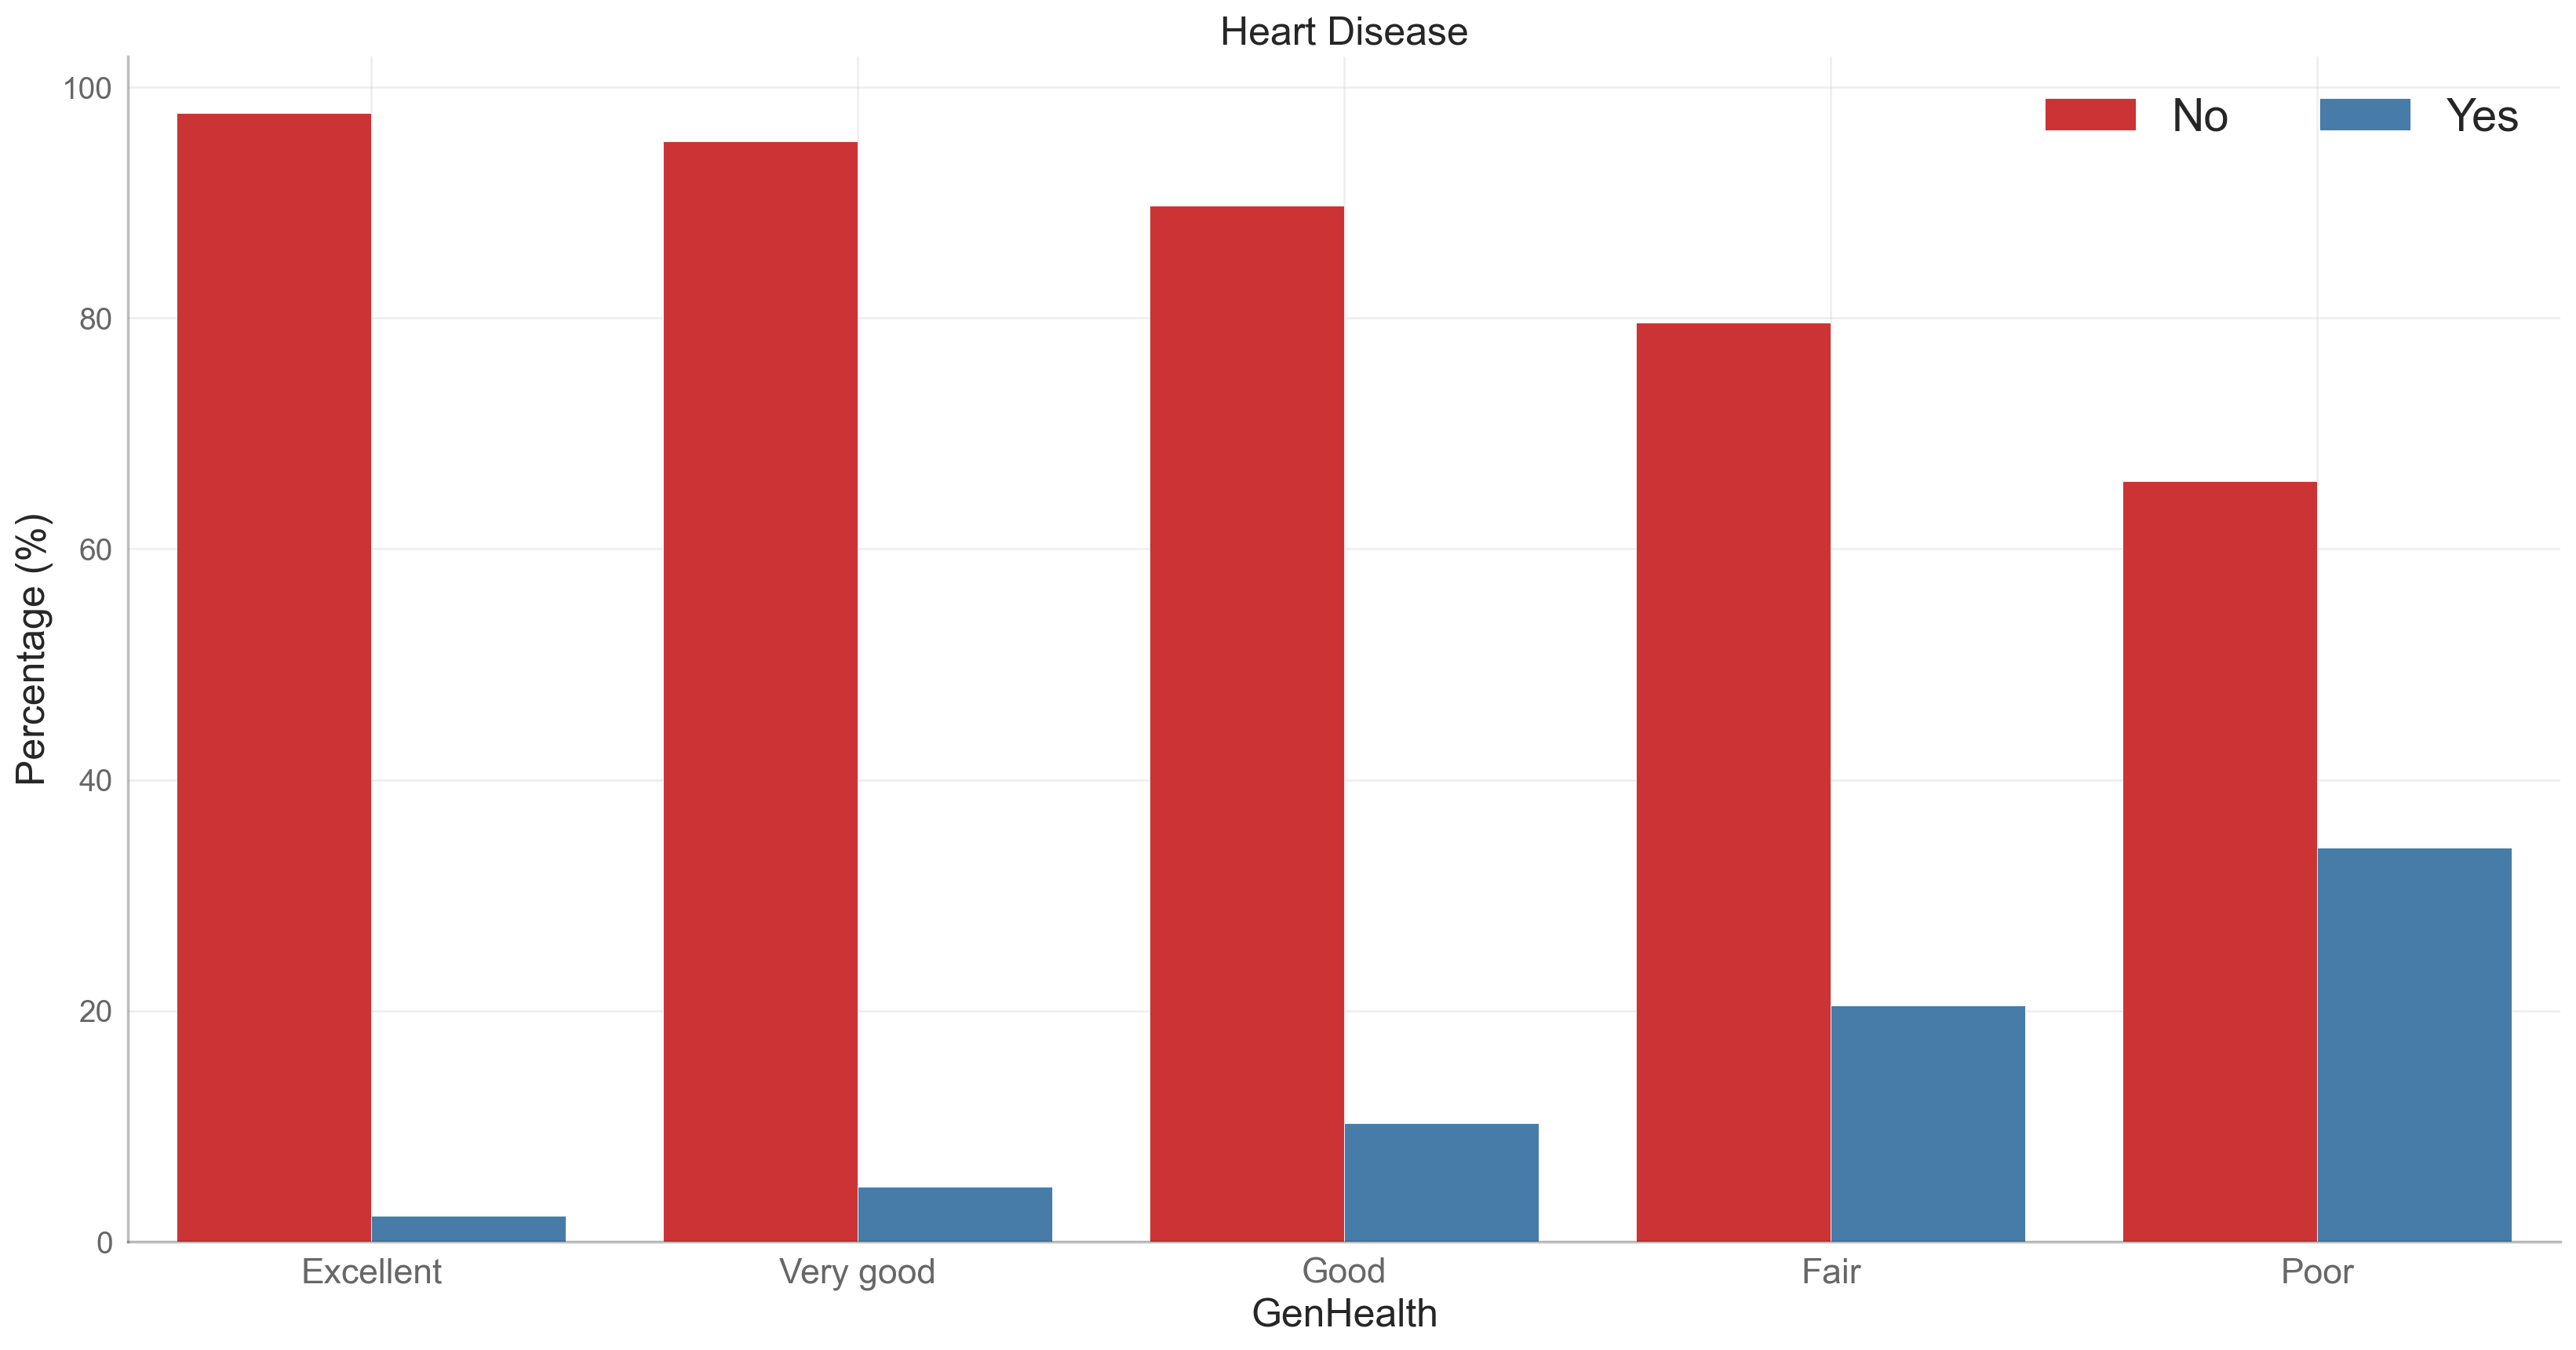

In [140]:
# Barplot for "GenHealth"
order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
barplot('GenHealth', order=order)

The graph above shows that a better health condition minimizes the chance of a person acquiring heart disease.

#### 1.4.12. Asthma

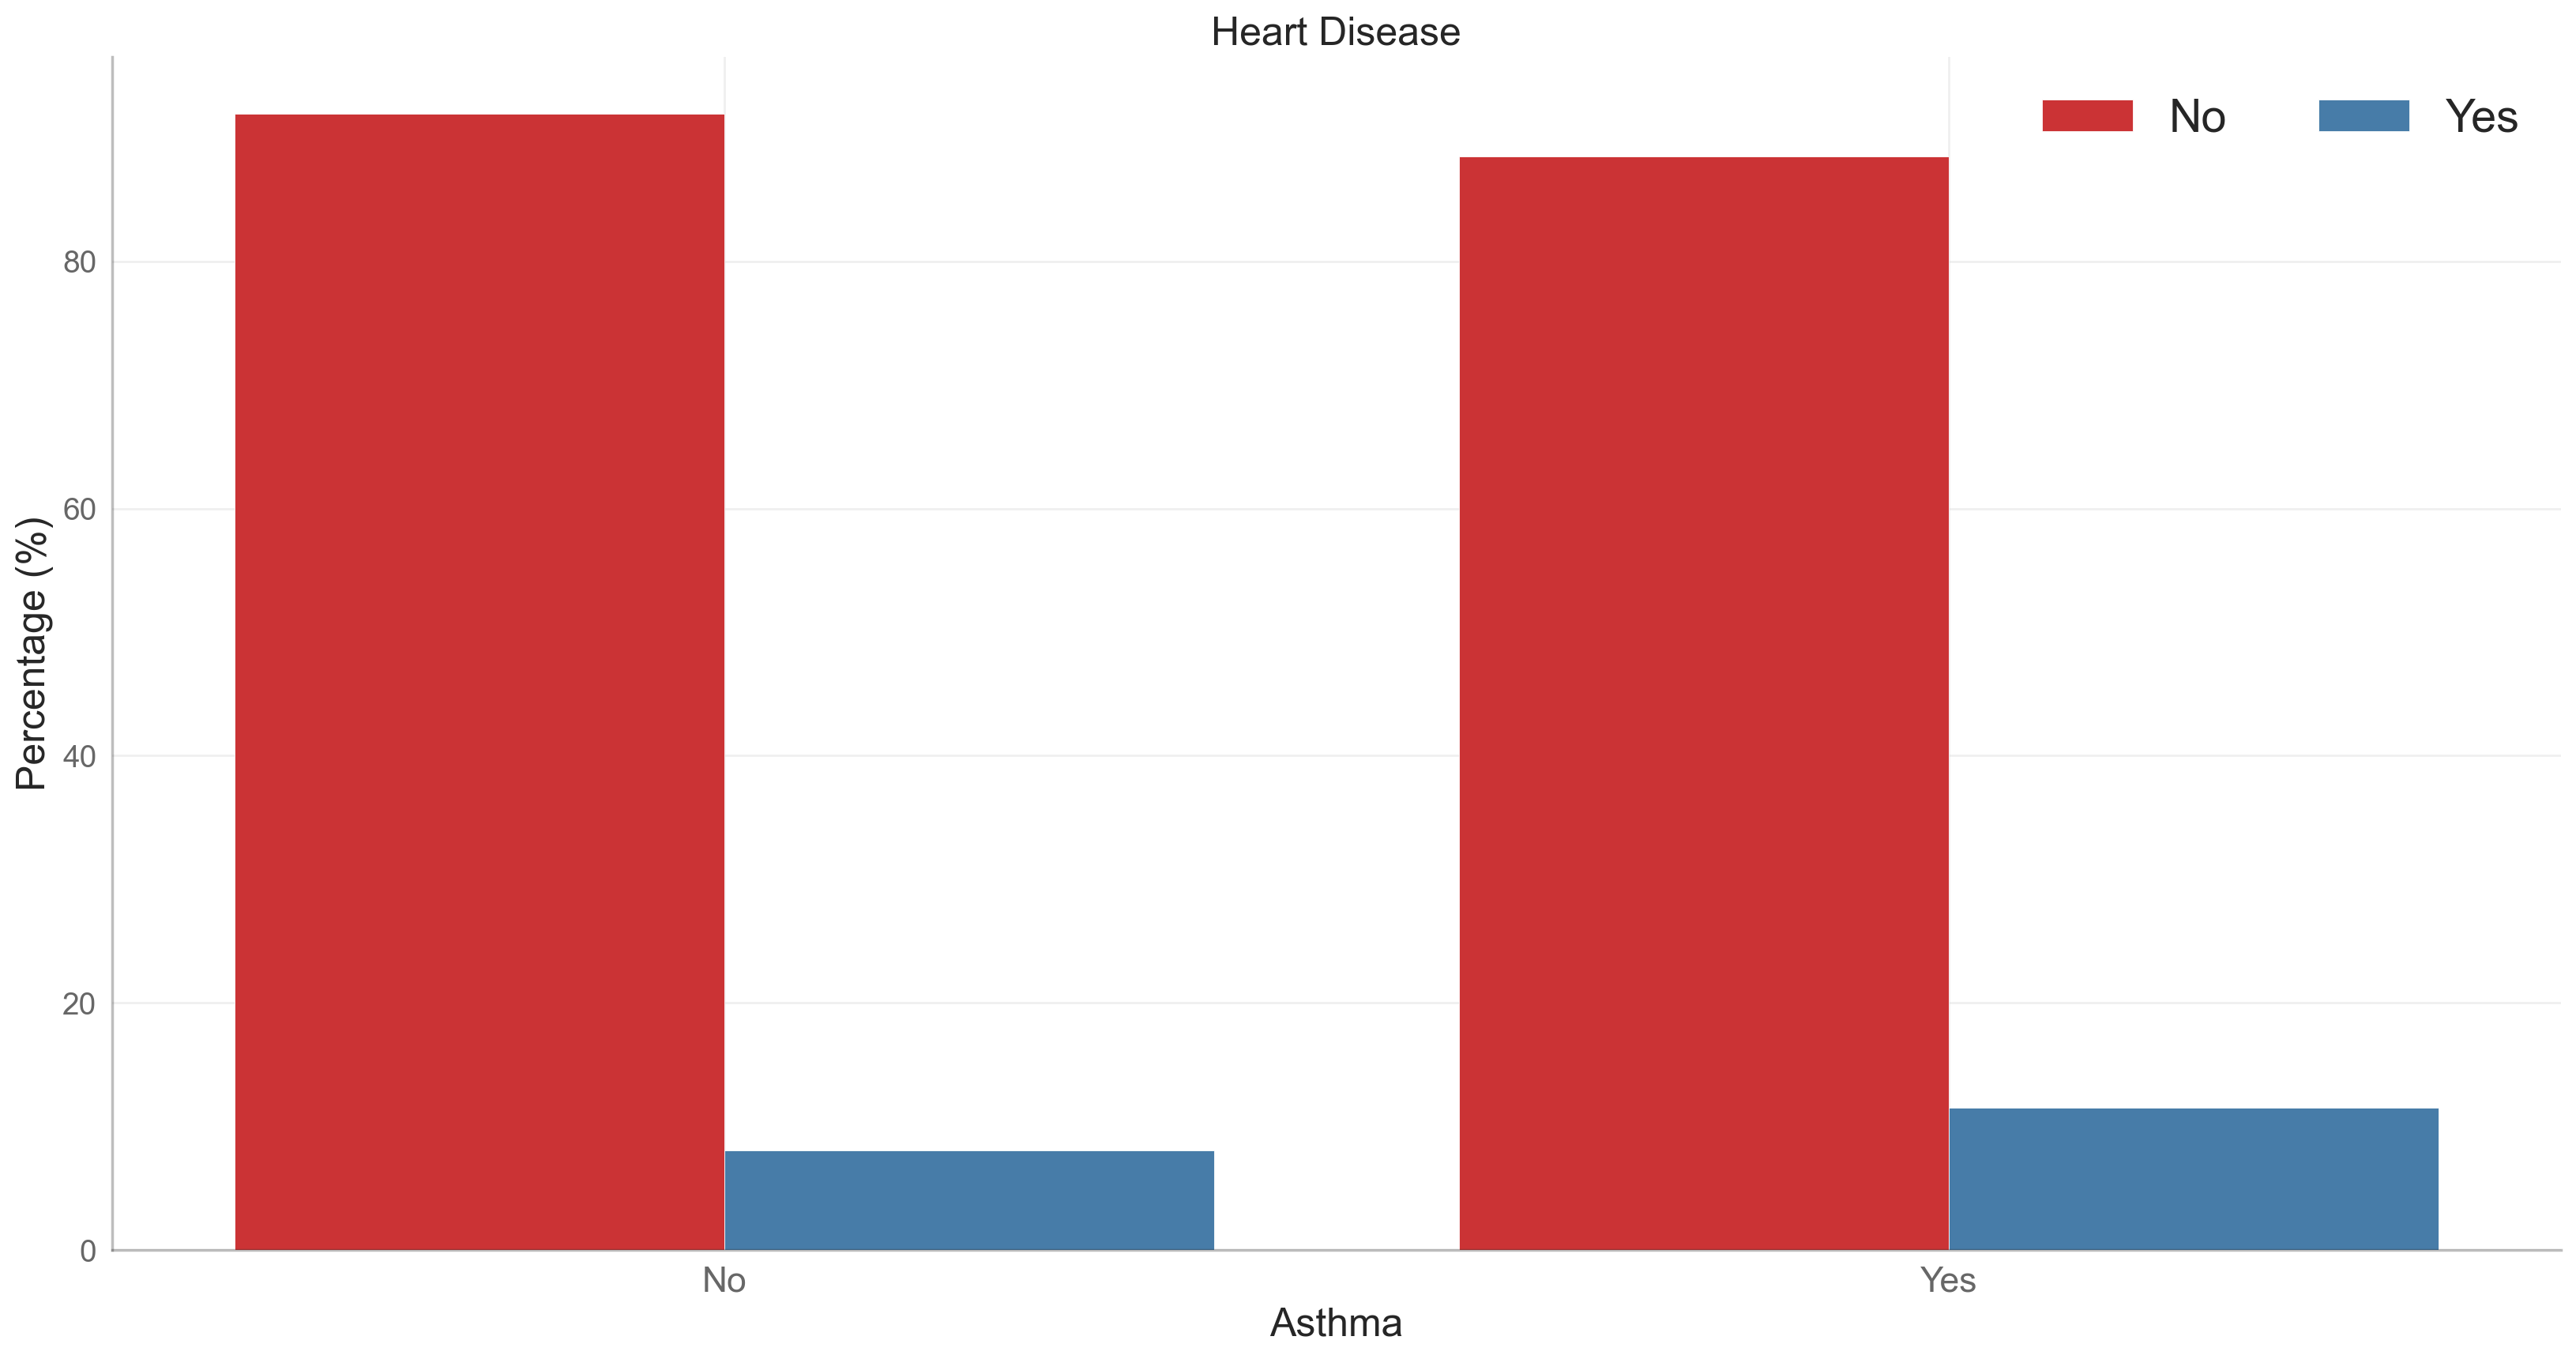

In [141]:
# Barplot for "Asthma"
barplot('Asthma')

People with Asthma tend to be more susceptible to getting heart disease.

#### 1.4.13. Kidney Disease

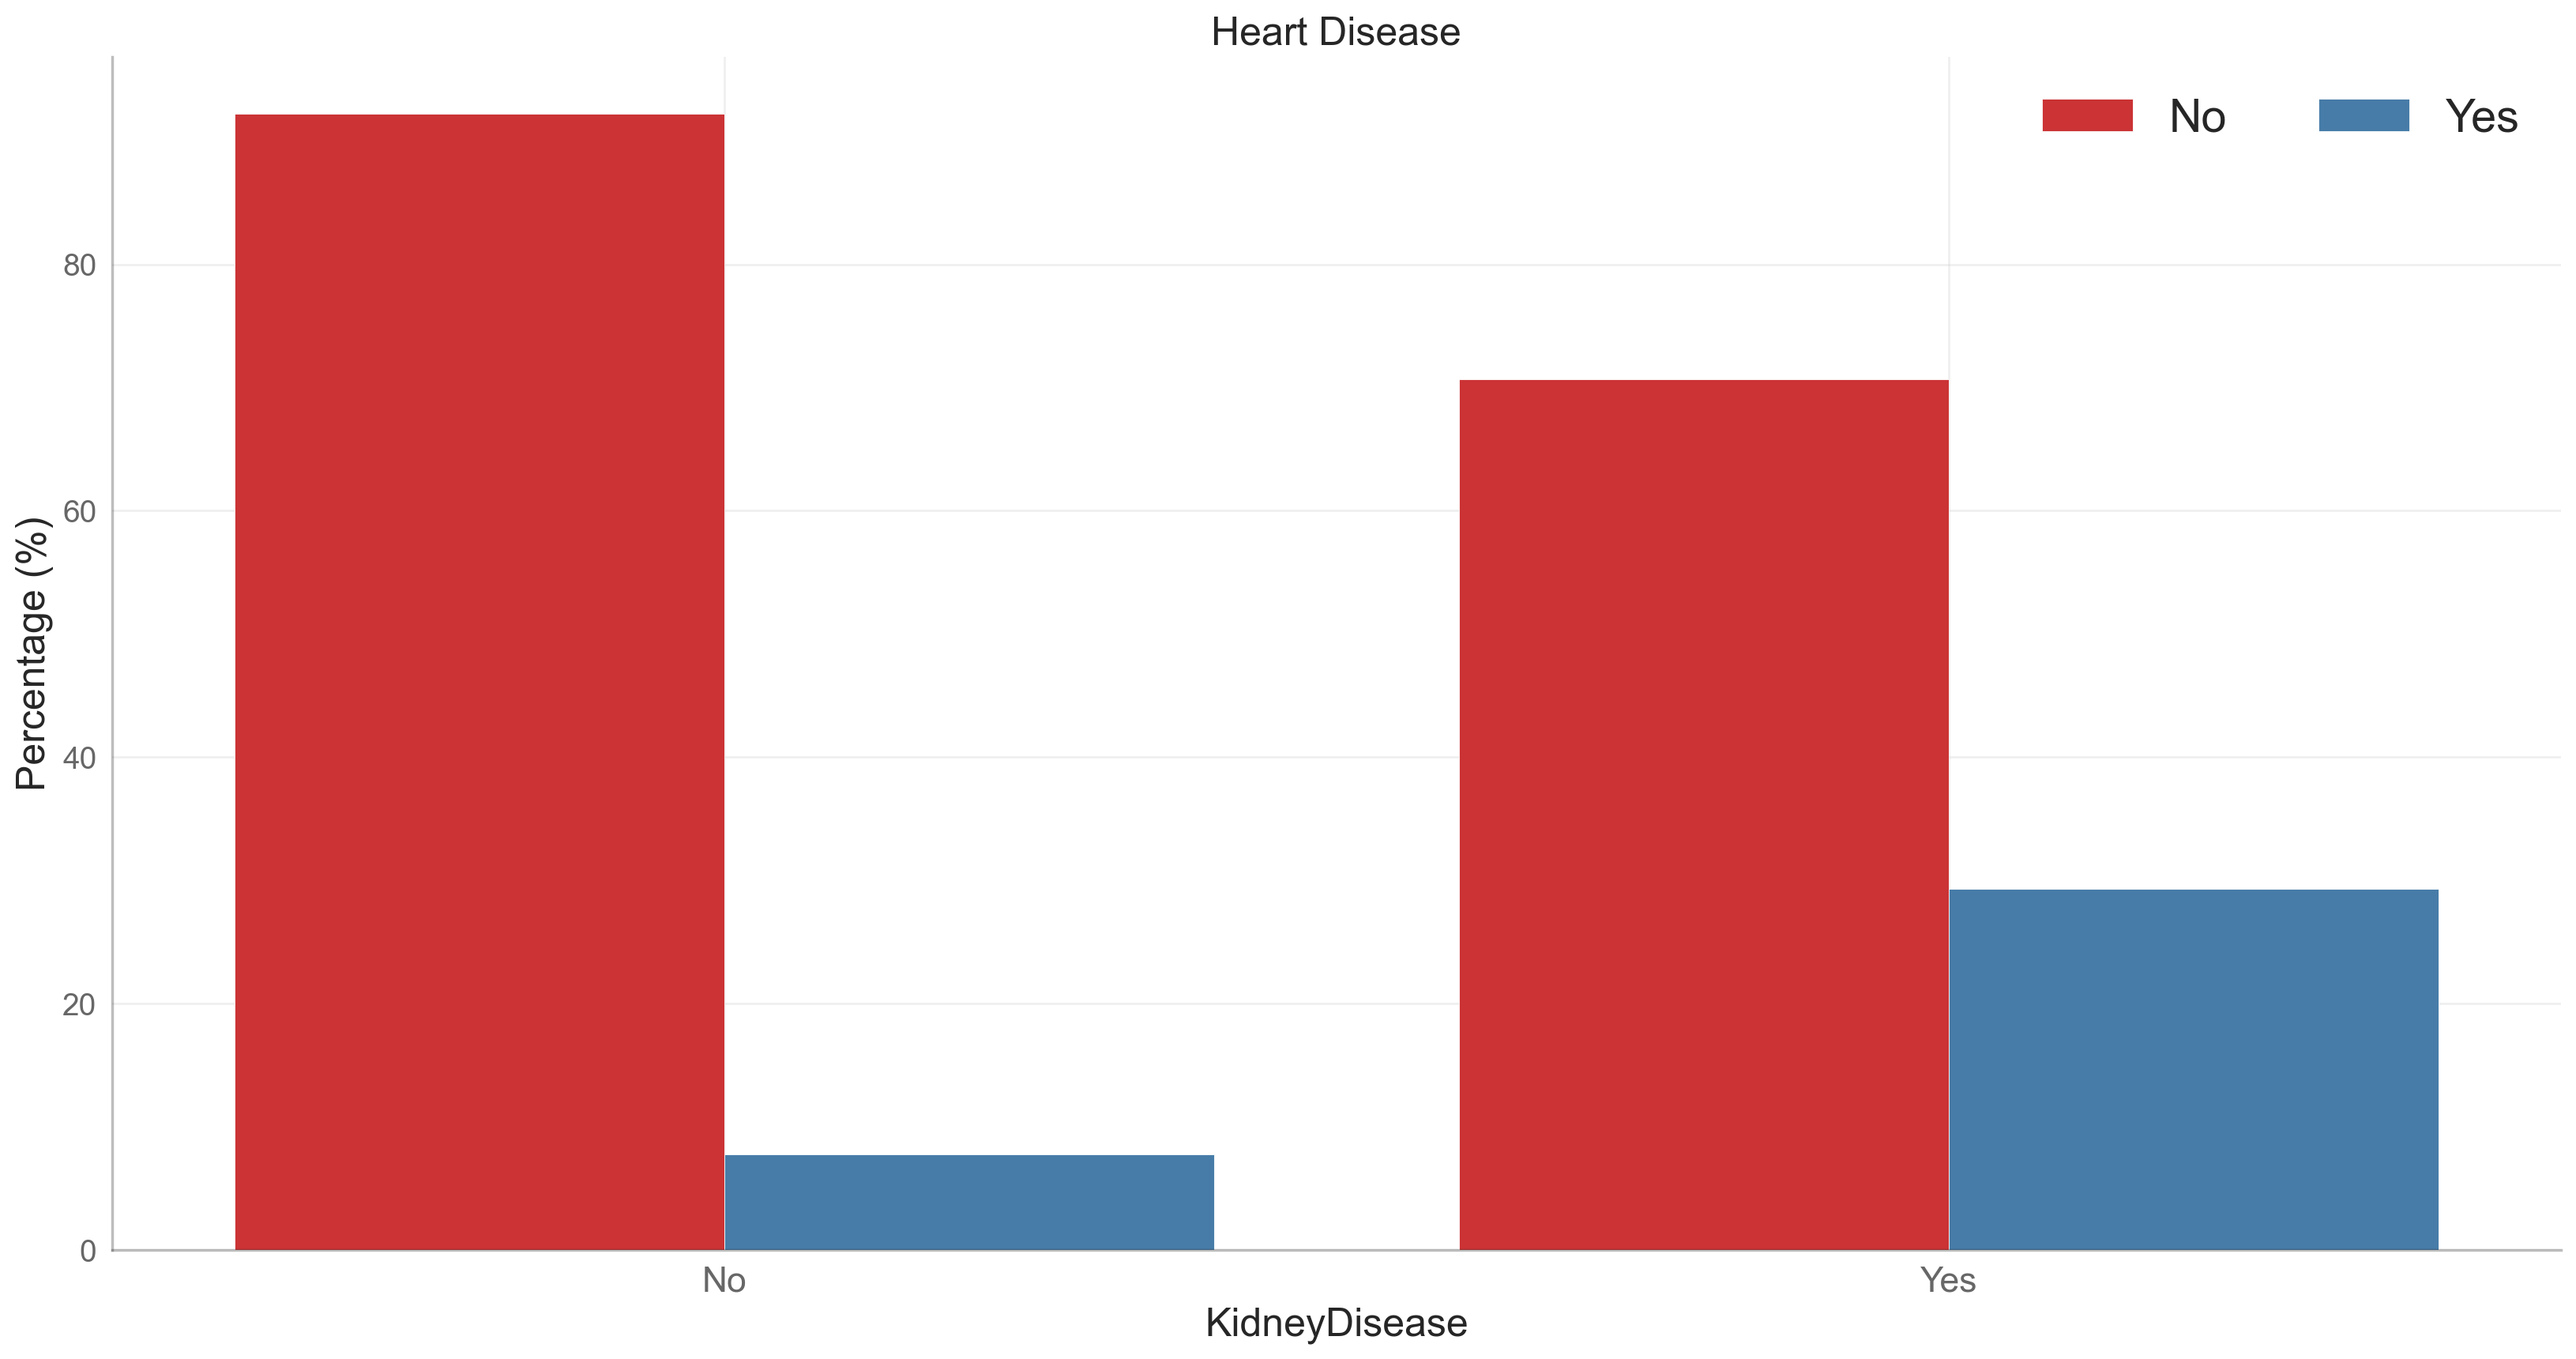

In [142]:
# Barplot for "KidneyDisease"
barplot('KidneyDisease')

According to the graph above, Kidney Disease seems to be a major factor in getting heart disease.

#### 1.4.14. Skin Cancer

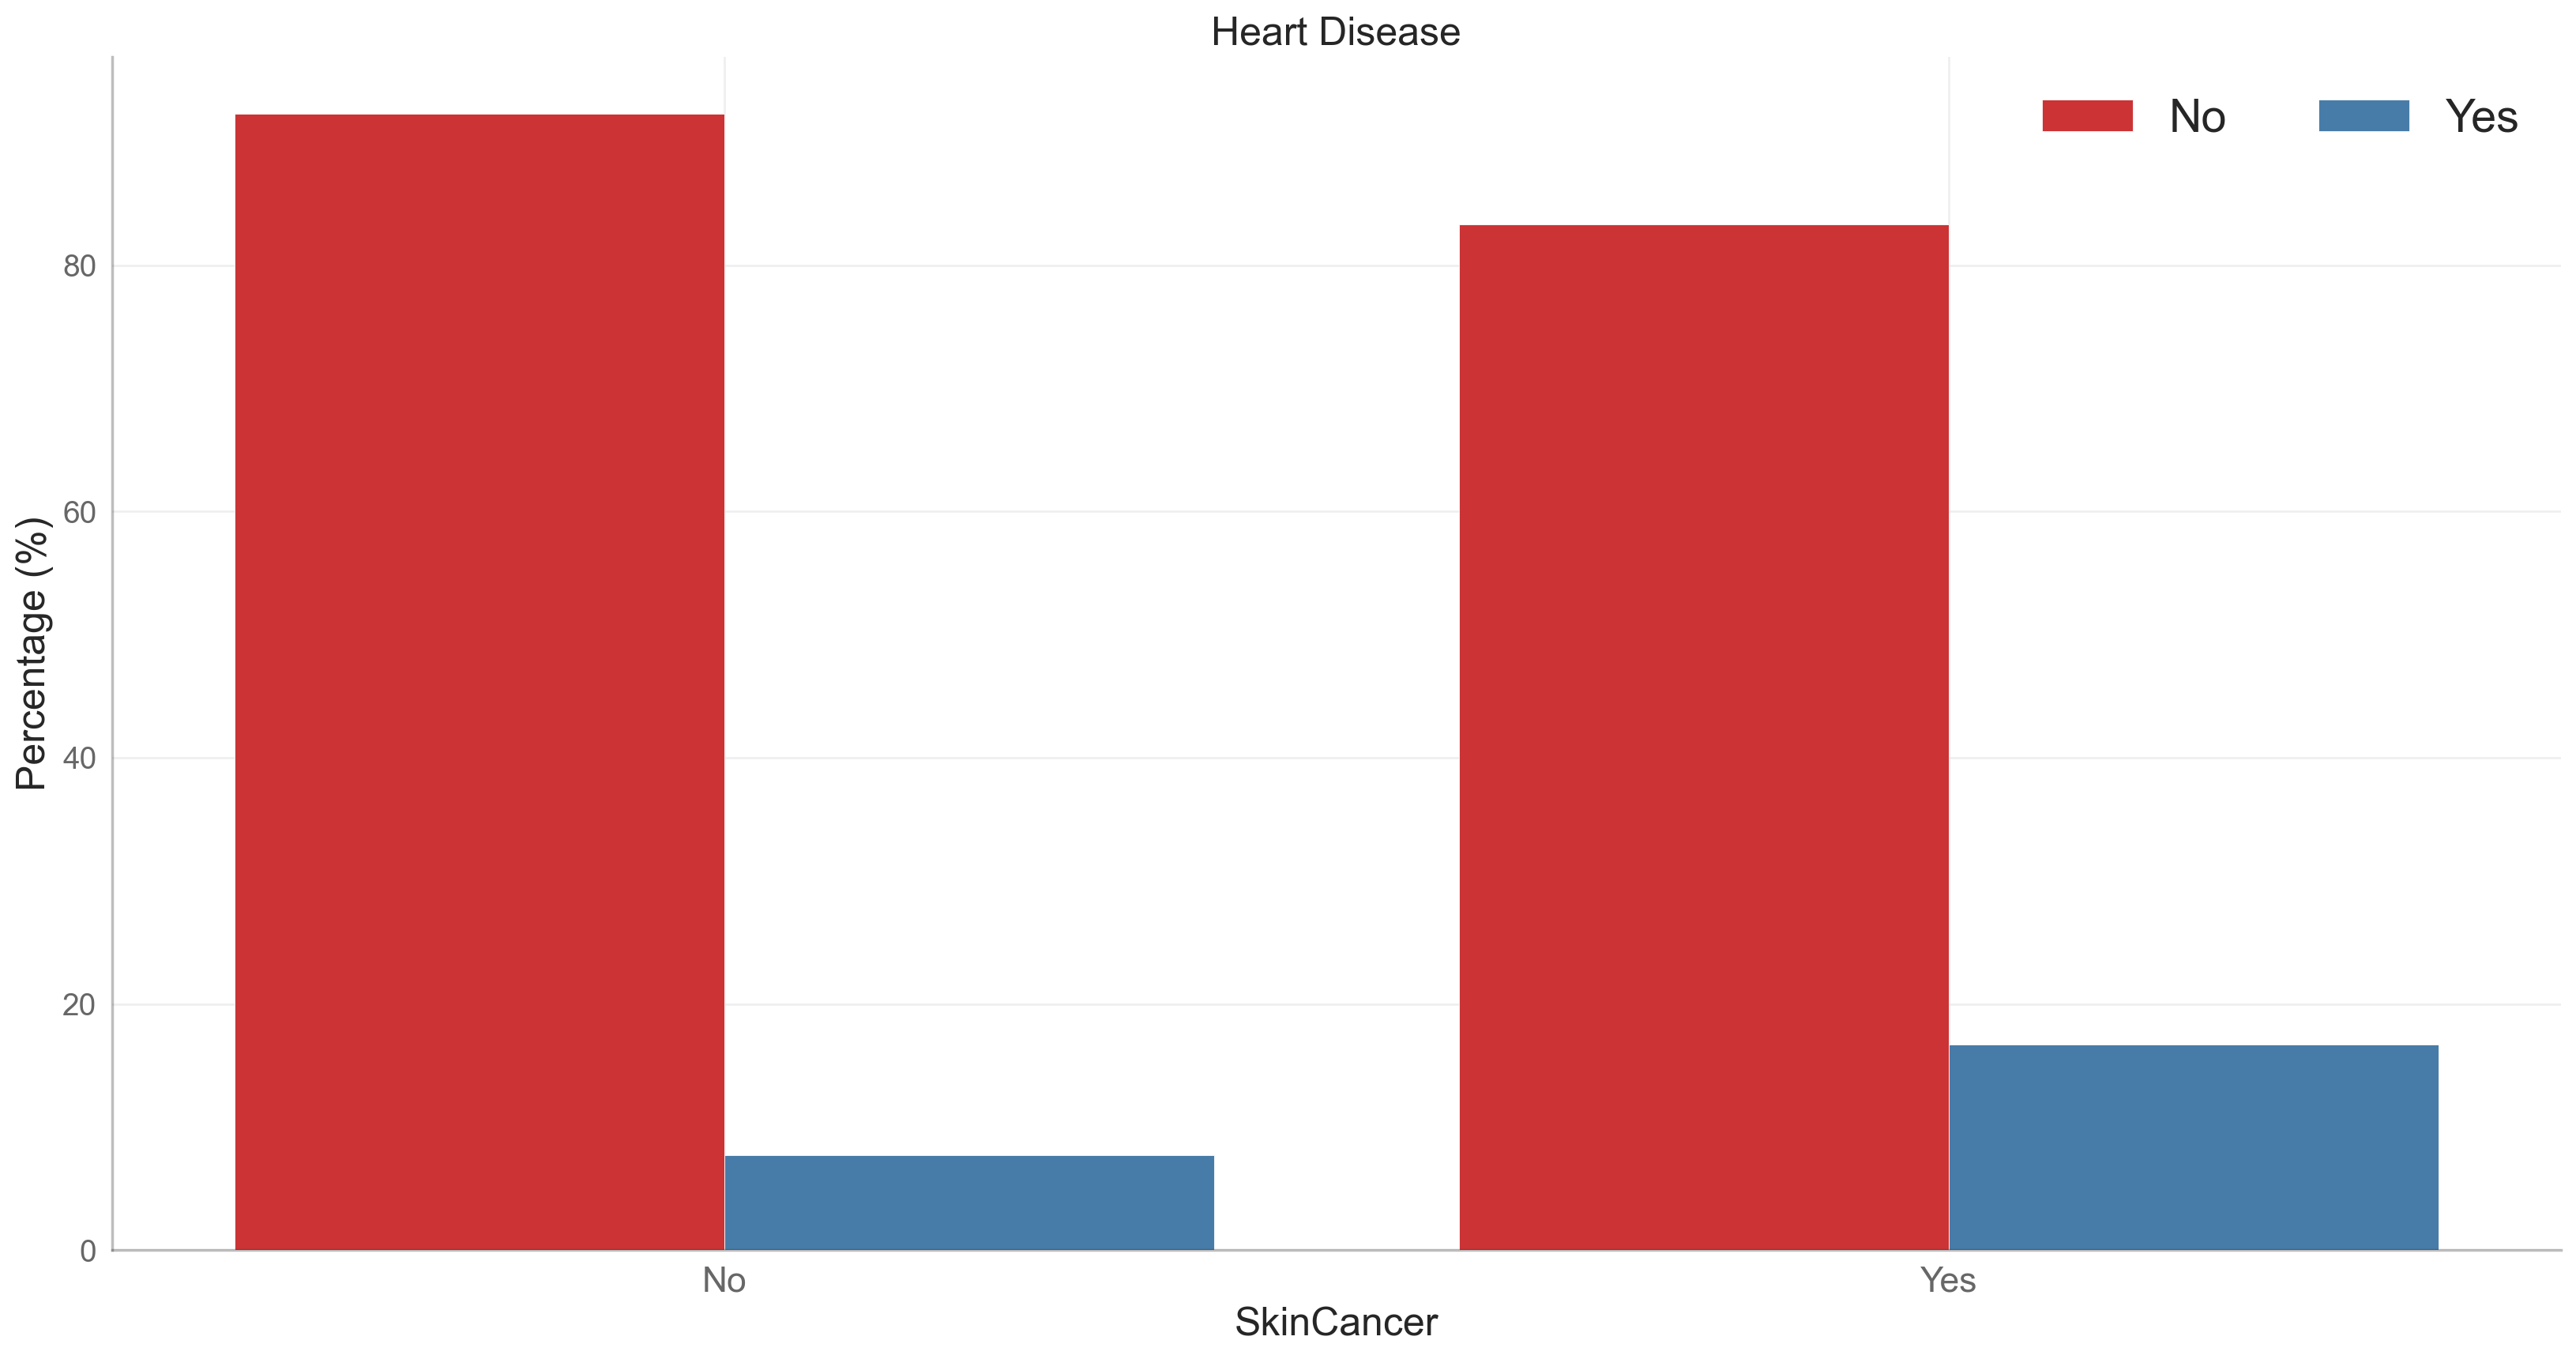

In [143]:
# Barplot for "SkinCancer"
barplot('SkinCancer')

Skin Cancer also seems to be a relevant factor for a person acquiring heart disease.

Now the analysis will concentrate on quantitative variables. Therefore, to understand the behavior of each variable, I will apply a different set of charts.

#### 1.4.15. BMI

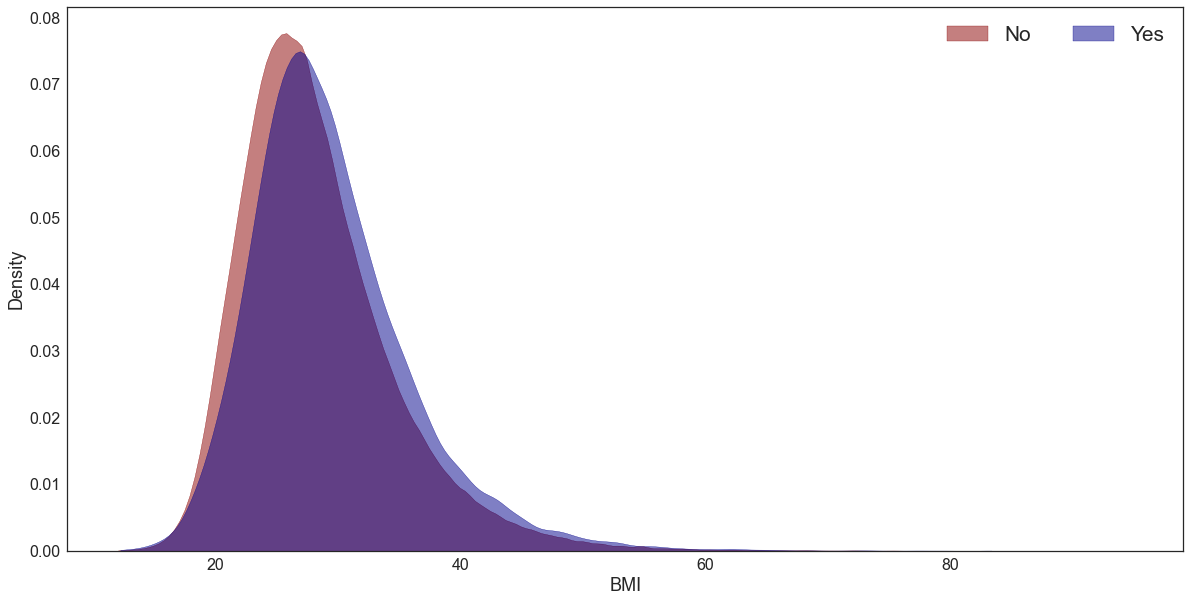

In [144]:
# KDE Plot for "BMI" for people with and without Heart Disease
kdeplot('BMI')

The KDE plot shows a slight difference between the distribution of people with and without heart disease, indicating that people with larger values of BMI has a slightly bigger chance of acquiring heart disease.

The following variables will have their analysis separated into two visualizations. The first one is a KDE plot used to understand the data distribution. The second visualization has two graphs representing the percentage of people with and without heart disease for each variable value, with a linear regression curve showing the data trend.

#### 1.4.16. Sleep Time

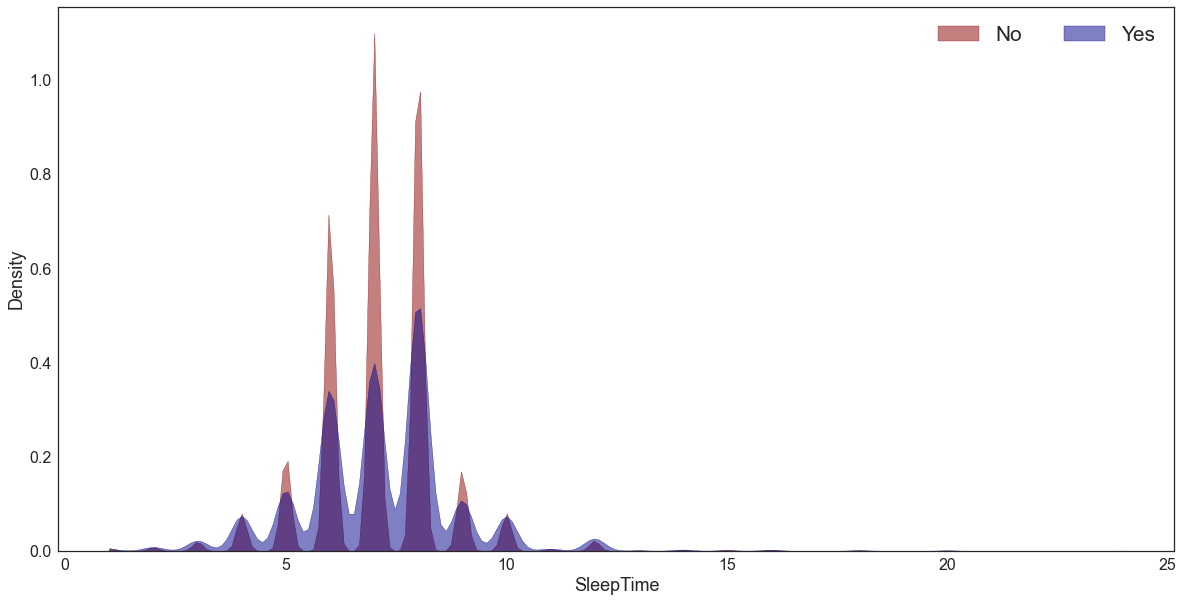

In [145]:
# KDE Plot for "SleepTime" for people with and without Heart Disease (hours a day)
kdeplot('SleepTime')

The KDE plot shows a substantial prevalence of people sleeping between 6 to 8 hours a day. However, it's not possible to distinguish the prevalence of heart disease. 

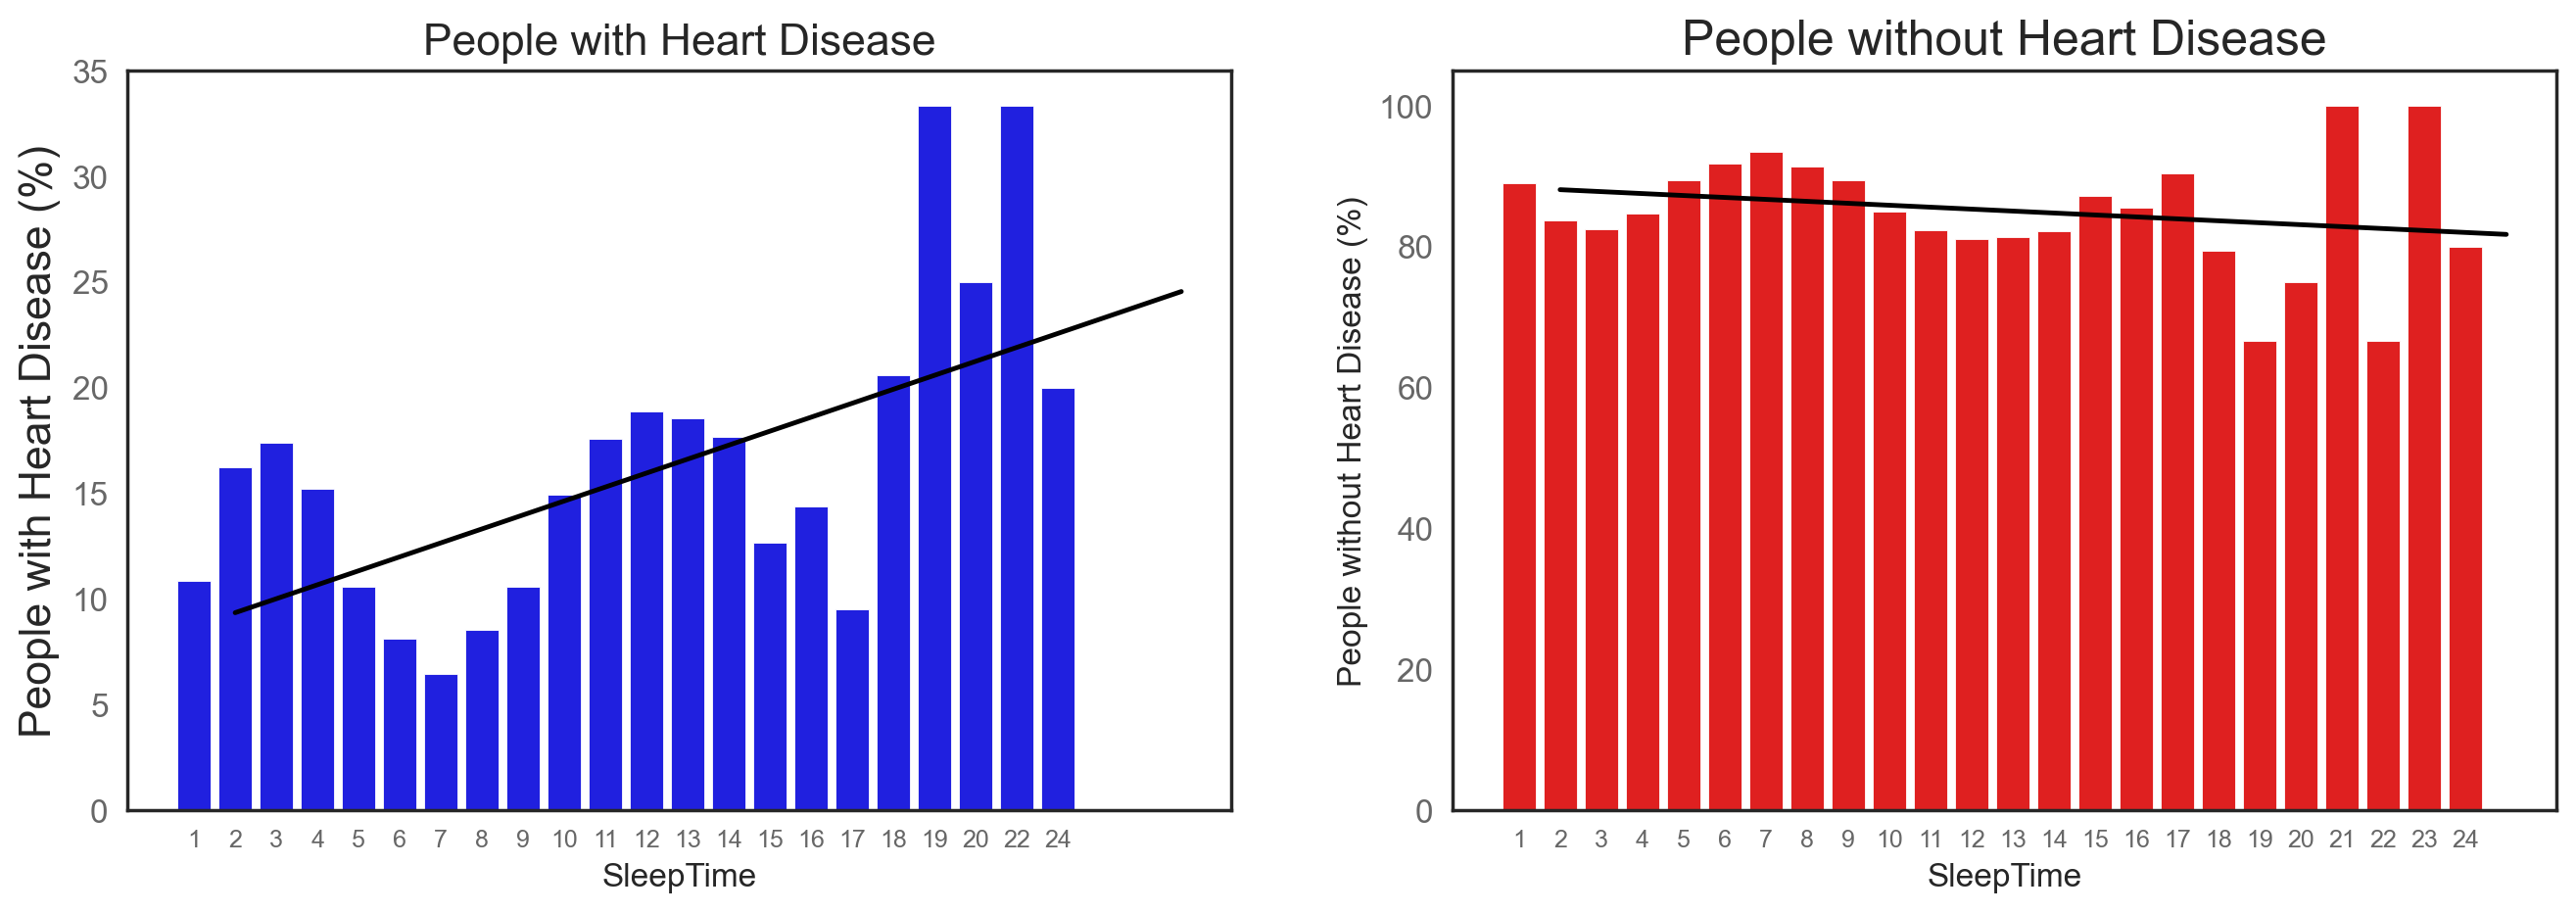

In [146]:
# Barplot of "Sleep Time" for people with and without heart disease (hours a day)
barplot_lr('SleepTime')

The Analysis of the values of both people with and without heart disease shows a slightly positive trend of people having heart disease to sleep for more hours. However, the difference might not be evident enough to produce an apparent correlation.

#### 1.4.17. Physical Health

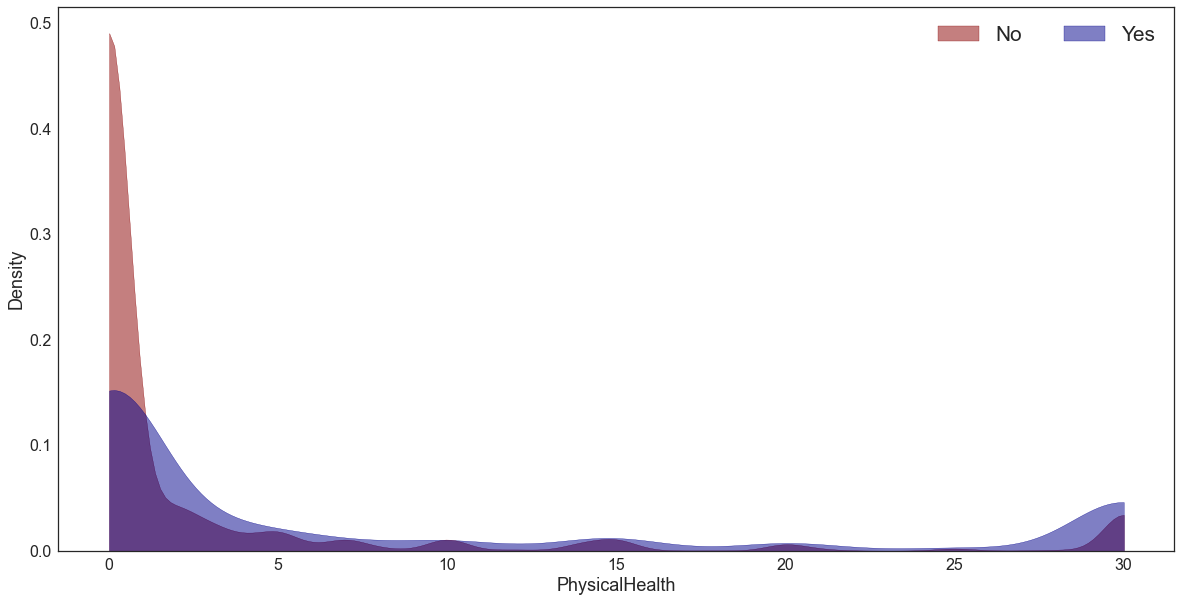

In [147]:
# KDE Plot for "PhysicalHealth" for people with and without heart disease
kdeplot('PhysicalHealth')

The violin plot demonstrates that people without heart disease tend to be less likely to have physical health problems. 

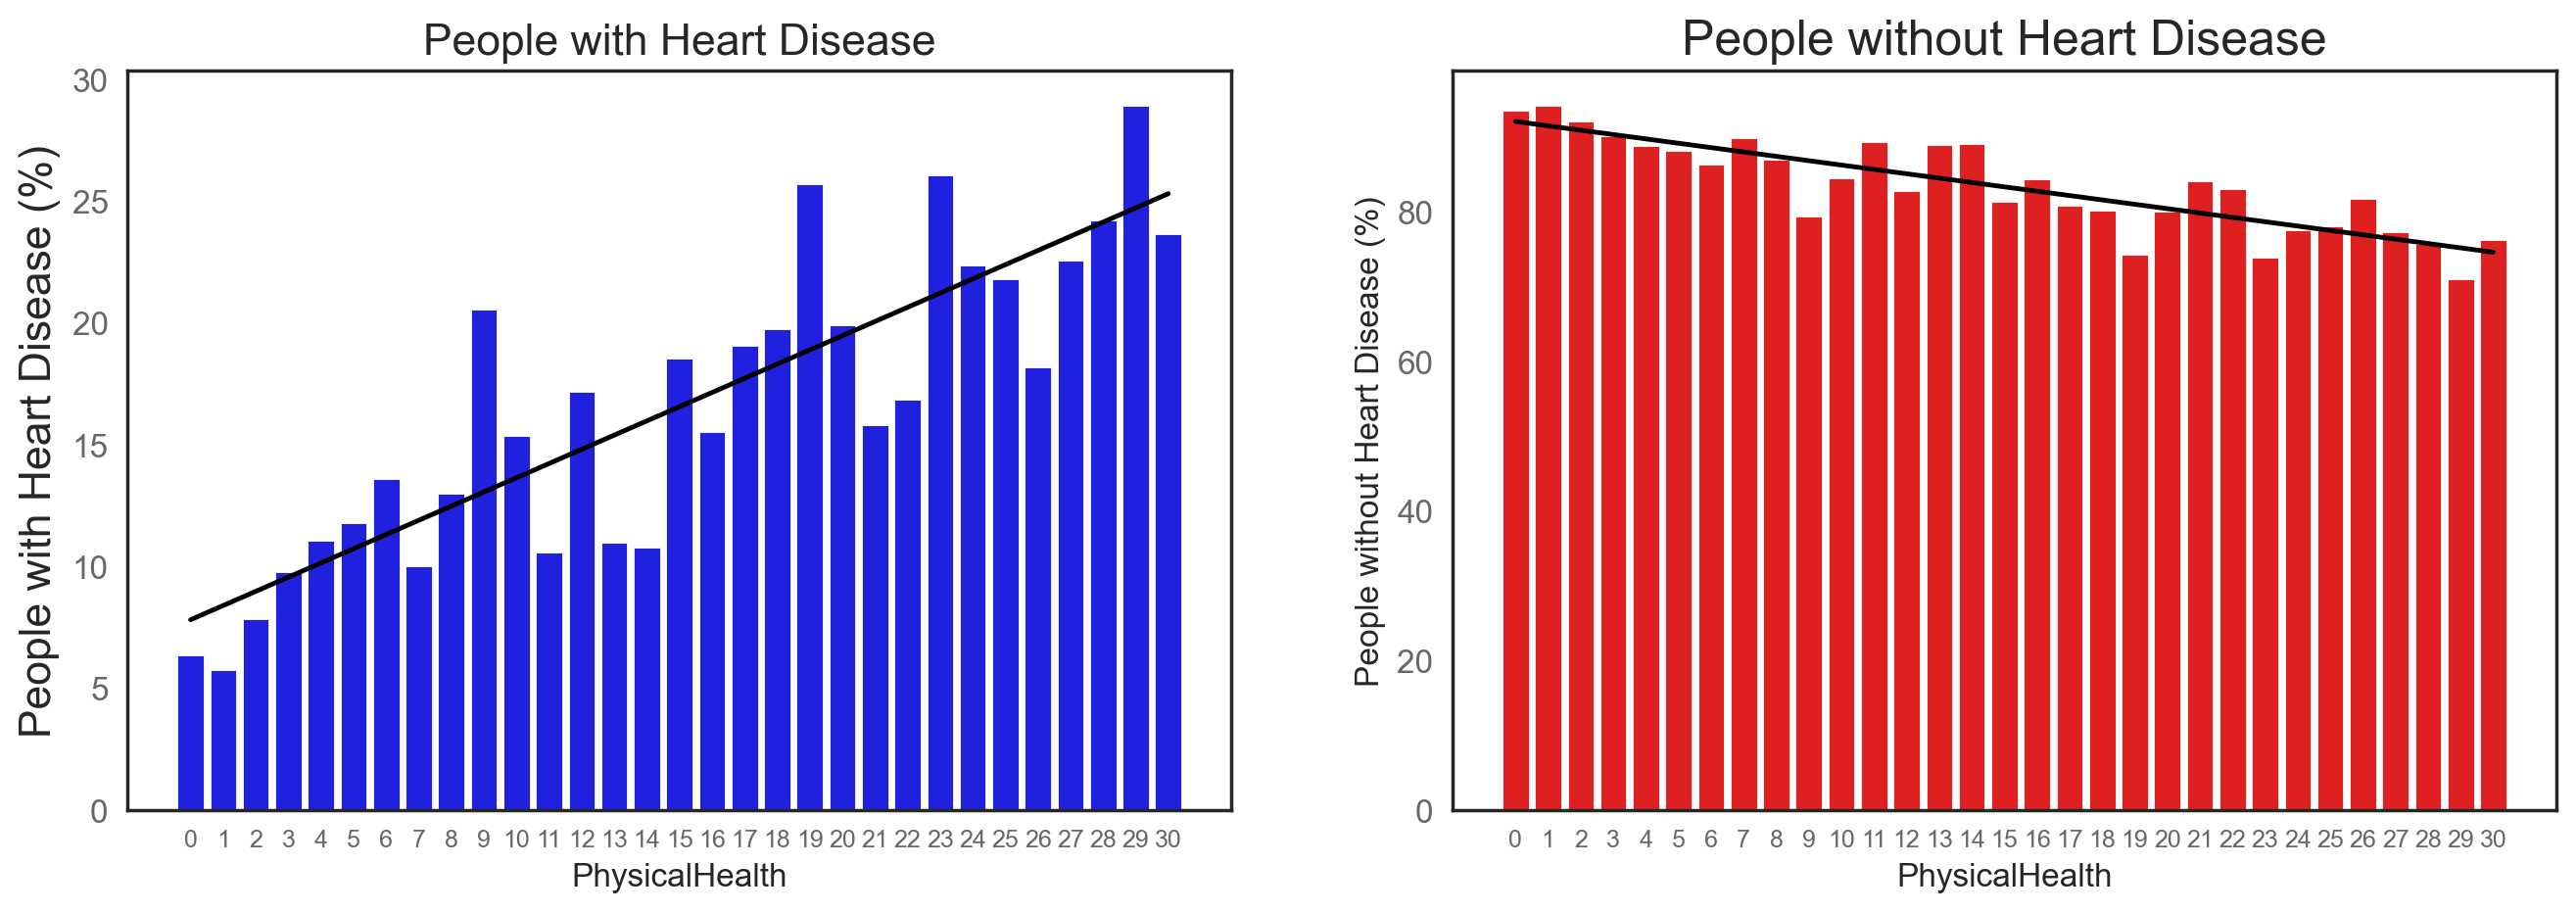

In [148]:
# Barplot of "Physical Health" for people with and without heart disease
barplot_lr('PhysicalHealth')

The bar plots show a clear correlation between physical health problems and heart disease.

#### 1.4.18. Mental Health

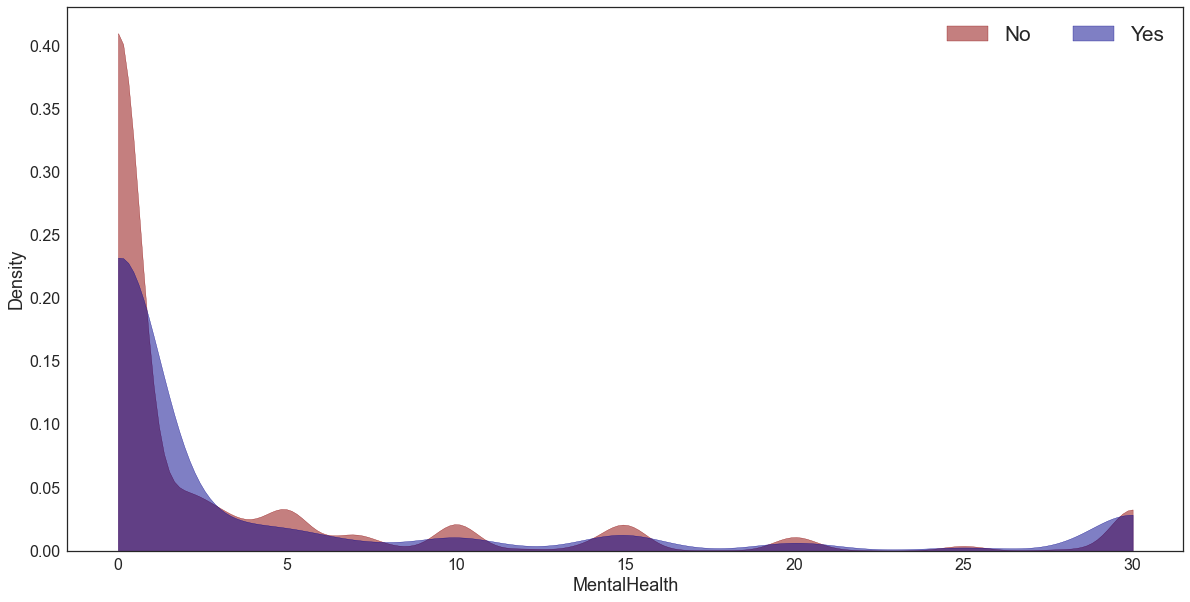

In [149]:
# KDE Plot for "MentalHealth" for people with and without heart disease
kdeplot('MentalHealth')

The KDE plot of people with Mental Health issues is similar to the graph related to people with Physical Health issues but with a more uniform data distribution.

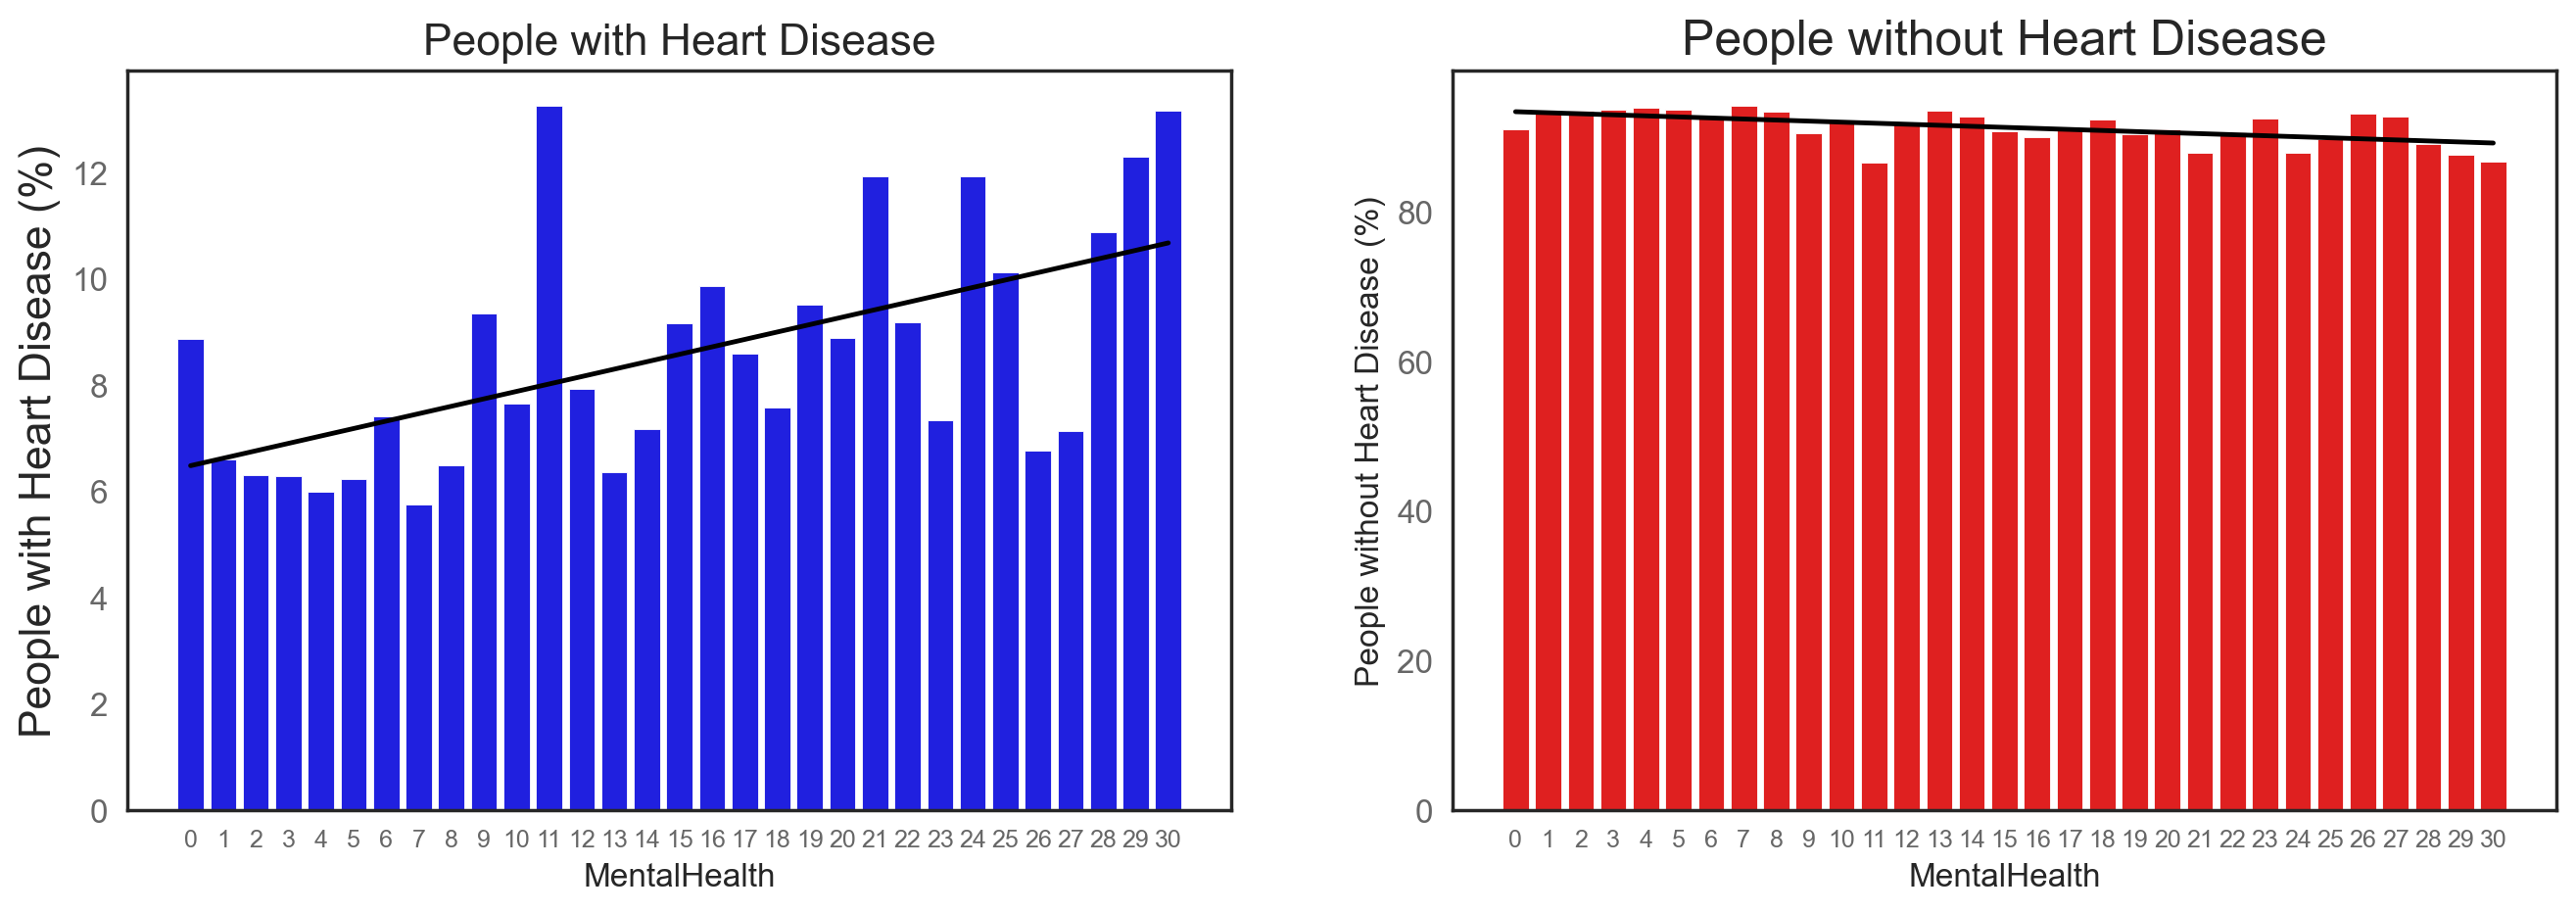

In [150]:
# Barplot of "Mental Health" for people with and without heart disease
barplot_lr('MentalHealth')

<AxesSubplot:>

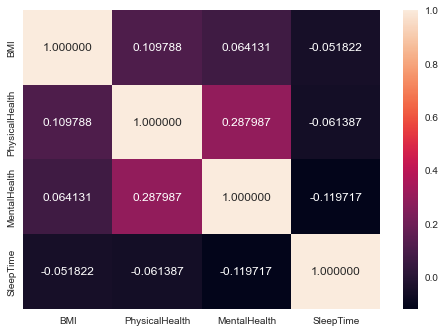

In [151]:
# Correlation between numeric variables
sns.heatmap(heart_df.corr(), annot=True, fmt='f')

The bar plots show a slight correlation between Mental Health problems and Heart Disease.

## 2. Model Selection Preparation

![Image](https://www.nbshare.io/static/snapshots/cm_colored_1-min.png)

The picture above shows a Confusion Matrix, which is a largely used metric to evaluate the performance of Machine Learning Classification.

Since the project intends to identify a disease with a relatively small prevalence in the dataset, the modeling will focus on minimizing a false-negative diagnosis(type II error). This approach avoids someone with heart disease being misclassified as a healthy person and delays its treatment, which could even be fatal in some cases. 

![Image](https://www.researchgate.net/profile/Martin-Oreilly-5/publication/319208171/figure/fig8/AS:668722658308097@1536447314233/Formulae-for-a-accuracy-b-sensitivity-and-c-specificity.ppm)

The equations above show the most widely used metrics for a Confusion Matrix evaluation. Since I'm trying to avoid a type II error, we will maximize our sensitivity (also called recall).

Therefore, in this section, I will search for the best combination of hyperparameters for Logistic Regression, SVM, Random Forest, and XGBoost that maximizes the recall avoiding compromising other metrics results as accuracy and specificity. For each method I will be run a parameter tuning for a process without undersampling, using Random Undersampler, SMOTE, and both. It will also be tested the use of "f1-macro" and MCC (Mathews Correlation Coefficient) as the evaluation metric for imbalanced data.

### 2.1. Imports

In [152]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Feature Selection
from sklearn.feature_selection import SelectKBest

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Selection functions
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real,Categorical,Integer

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support as score, make_scorer, matthews_corrcoef, f1_score

# Yellowbrick
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.features import RadViz

# Others
import time
import xgboost as xgb
from sklearn.utils import resample
import scipy.interpolate
import pickle

The equations above show the most widely used metrics for a Confusion Matrix evaluation. Since we're trying to avoid a type II error, we will maximize our sensitivity (also called recall).

Therefore, in this section, I will search for the best combination of hyperparameters for Logistic Regression, SVM, Random Forest, and XGBoost that mazimizes the recall avoiding compromising other metrics results as accuracy and specificity. For each method I will be run a parameter tuning for a process without sampling(none), using Random Undersampler, SMOTE, and both. It will also be tested the use of "f1-macro" and MCC (Mathews Correlation Coefficient) as the evaluation metric for imbalanced data.


In [153]:
# Separation of dependent and independent variables (features)
X = heart_df.drop(columns='HeartDisease')
y = heart_df.HeartDisease

In [154]:
# Defining a SEED
SEED = 42
np.random.seed(SEED)

In [155]:
# Another look into each variable dtype information
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [156]:
# First, the dependent variable will be transformed in a binary variable
Le = LabelEncoder()
y = Le.fit_transform(y)

In [157]:
# Train test split to avoid Data Leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [158]:
# Setting the order for each variable
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']
gen_health_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
diabetic_order = ['No', 'Yes (during pregnancy)', 'No, borderline diabetes', 'Yes']

# Selection of the ordinal variables
ordinal_vars = ['AgeCategory', 'GenHealth', 'Diabetic']

# Ordinal Encoder 
ordinal_encoder = OrdinalEncoder(categories=[age_order, gen_health_order, diabetic_order])

In [159]:
# Selection of the nominal variables
nominal_vars = X.select_dtypes(exclude=['float64']).drop(columns=ordinal_vars)
nominal_vars = nominal_vars.columns

As the dataset is large and some methods take too much computational process (mainly Random Forest), I will use a stratified resample of the training data. The size of the dataset assures a 99% confidence level with a 1,3% error.

In [160]:
# Sampling the traning data
X_sample, y_sample = resample(X_train, y_train, stratify=y_train, n_samples=10000, random_state=SEED)

### 2.2. Functions

#### 2.2.1. Model Selection

Since the data is imbalanced, the evaluation metric for the grid and bayesian search will be set as "f1_macro". The f-score is the harmonical mean between recall and precision (number of true positive results divided by the number of all positive results). The "macro" parameter will minimize the effect of the data imbalance, and "1" represents a positive classification.

In [161]:
def model_selection_bayes_f1_macro(model, param_distributions, undersampler=None, oversampler=None):
    
    warnings.filterwarnings("ignore")

    # Start time count
    start = time.time()
    
    # Processing pipeline
    preprocess = ColumnTransformer(
    [('numerical_transformer', StandardScaler(), make_column_selector(dtype_include='float64')),
    ('ordinal_transformer', ordinal_encoder, ordinal_vars),
    ('categorical_transformer', OneHotEncoder(), nominal_vars)])
       
    # Selector
    selector = SelectKBest()
    
    # Pipeline
    pipeline = Pipeline([('preprocess', preprocess),
                         ('selector', selector),
                         ('under', undersampler),
                         ('over', oversampler),                         
                         ('model', model)])
    
    # Stratified Cross Validation 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    
    # Grid Search
    bayes_search = BayesSearchCV(pipeline, param_distributions, cv=cv, n_iter=64, scoring='f1_macro', n_jobs=-1, verbose=42, random_state=SEED)

    # Grid Result
    result = bayes_search.fit(X_sample, y_sample)
    
    # End time count
    final = time.time() - start

    print(f'Time to run: {final:.2f} seconds for modeling.')
    
    return result

In [162]:
def model_selection_bayes_mcc(model, param_distributions, undersampler=None, oversampler=None):
    
    warnings.filterwarnings("ignore")

    # Start time count
    start = time.time()
    
    # Processing pipeline
    preprocess = ColumnTransformer(
    [('numerical_transformer', StandardScaler(), make_column_selector(dtype_include='float64')),
    ('ordinal_transformer', ordinal_encoder, ordinal_vars),
    ('categorical_transformer', OneHotEncoder(), nominal_vars)])
    
    # Selector
    selector = SelectKBest()

    # Pipeline
    pipeline = Pipeline([('preprocess', preprocess),
                         ('selector', selector),  
                         ('under', undersampler),
                         ('over', oversampler),   
                         ('model', model)])
    
    # Stratified Cross Validation 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    
    # MCC Score
    mcc_score = make_scorer(matthews_corrcoef)
    
    # Grid Search
    bayes_search = BayesSearchCV(pipeline, param_distributions, cv=cv, n_iter=64, scoring=mcc_score, n_jobs=-1, verbose=42, random_state=SEED)

    # Grid Result
    result = bayes_search.fit(X_sample, y_sample)
    
    # End time count
    final = time.time() - start

    print(f'Time to run: {final:.2f} seconds for modeling.')
    
    return result

In [163]:
def model_selection_grid_f1_macro(model, param_distributions, undersampler=None, oversampler=None):
    
    warnings.filterwarnings("ignore")

    # Start time count
    start = time.time()
    
    # Processing pipeline
    preprocess = ColumnTransformer(
    [('numerical_transformer', StandardScaler(), make_column_selector(dtype_include='float64')),
    ('ordinal_transformer', ordinal_encoder, ordinal_vars),
    ('categorical_transformer', OneHotEncoder(), nominal_vars)])
    
    # Selector
    selector = SelectKBest()

    # Pipeline
    pipeline = Pipeline([('preprocess', preprocess),
                         ('selector', selector),  
                         ('under', undersampler),
                         ('model', model)])
    
    # Stratified Cross Validation 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    
    # Grid Search
    grid_search = GridSearchCV(pipeline, param_distributions, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=42)

    # Grid Result
    result = grid_search.fit(X_sample, y_sample)
    
    # End time count
    final = time.time() - start

    print(f'Time to run: {final:.2f} seconds for modeling.')
    
    return result

In [164]:
def model_selection_grid_mcc(model, param_distributions, undersampler=None, oversampler=None):
    
    warnings.filterwarnings("ignore")

    # Start time count
    start = time.time()
    
    # Processing pipeline
    preprocess = ColumnTransformer(
    [('numerical_transformer', StandardScaler(), make_column_selector(dtype_include='float64')),
    ('ordinal_transformer', ordinal_encoder, ordinal_vars),
    ('categorical_transformer', OneHotEncoder(), nominal_vars)])
    
    # Selector
    selector = SelectKBest()

    # Pipeline
    pipeline = Pipeline([('preprocess', preprocess),
                         ('selector', selector),  
                         ('under', undersampler),
                         ('model', model)])
    
    # Stratified Cross Validation 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)
    
    # MCC Score
    mcc_score = make_scorer(matthews_corrcoef)
    
    # Grid Search
    grid_search = GridSearchCV(pipeline, param_distributions, cv=cv, scoring=mcc_score, n_jobs=-1, verbose=42)

    # Grid Result
    result = grid_search.fit(X_sample, y_sample)
    
    # End time count
    final = time.time() - start

    print(f'Time to run: {final:.2f} seconds for modeling.')
    
    return result

In [165]:
def model_search(strategy, undersampler=None, oversampler=None):
    
    models = [lr_model, svc_model, rf_model, xgbc_model]
    parameters = [lr_param_distributions, svc_param_distributions, rf_param_distributions, xgbc_param_distributions]
    prefixes = ['lr', 'svc', 'rf', 'xgbc']
    var_list = []

    for i in range(len(prefixes)):
        globals()[f'{prefixes[i]}_{strategy}_f1'] = model_selection_bayes_f1_macro(models[i], parameters[i], undersampler, oversampler)
        var_list.append(globals()[f'{prefixes[i]}_{strategy}_f1'])
        %store {prefixes[i]}_{strategy}_f1
        
        globals()[f'{prefixes[i]}_{strategy}_mcc'] = model_selection_bayes_mcc(models[i], parameters[i], undersampler, oversampler)
        var_list.append(globals()[f'{prefixes[i]}_{strategy}_mcc'])
        %store {prefixes[i]}_{strategy}_mcc
        
    return var_list

#### 2.2.2. Model Evaluation Metrics

In [166]:
def report(grid_result):
    
    predicted = grid_result.predict(X_test)
    cr = classification_report(y_test, predicted)
    
    return print(cr)

In [167]:
def model_evaluation(model_list, strategy):
    
    warnings.filterwarnings("ignore")
    
    model_names = [f'Logistic Regression {strategy} (F1)', f'Logistic Regression {strategy} (MCC)', f'SVC {strategy} (F1)', f'SVC {strategy} (MCC)',
                   f'Random Forest {strategy} (F1)', f'Random Forest {strategy} (MCC)', f'XGB Classifier {strategy} (F1)', f'XGB Classifier {strategy} (MCC)']

    recall = []
    specificity = []
    accuracy = []
    precis = []
    f1_s = []
    matthews_corr_coef = []

    for model in model_list:
        
        pred = model.predict(X_test)
        cm = confusion_matrix(y_test, pred)

        TN = cm[0,0] 
        FP = cm[0,1]
        FN = cm[1,0]
        TP = cm[1,1]

        rec = TP / (TP + FN)
        spec = TN / (TN + FP)
        acc = (TP + TN) / (TP + FP + TN + FN)
        pre = TP / (TP + FP)
        f1 = 2 * (pre * rec) / (pre + rec)
        mcc = matthews_corrcoef(y_test, pred)

        recall.append(rec)
        specificity.append(spec)
        accuracy.append(acc)
        precis.append(pre)
        f1_s.append(f1)
        matthews_corr_coef.append(mcc)
        

    df = pd.DataFrame({'Model': model_names, 'Recall': recall, 'Specificity': specificity, 'Accuracy': accuracy, 'Precision': precis, 'F1-Score': f1_s, 'MCC': matthews_corr_coef})
    df = df.set_index('Model').sort_values('F1-Score', ascending=False)
    return df

Since there is a trade-off between precision and recall the model performance was boosted by setting an optimal threshold that uses precision as 0.2.

In [168]:
def optimal_threshold(results):
    
    warnings.filterwarnings("ignore")
    
    threshold = [.01, .05 ,.1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95, .99]
    precision = []
    recall = []
    
    for i in threshold:
        pred = (results.predict_proba(X_test)[:,1] >= i).astype(int)
        prec = score(y_test, pred)[0][1]
        rec = score(y_test, pred)[1][1]
        precision.append(prec)
        recall.append(rec)

    interp = scipy.interpolate.interp1d(precision, threshold)
    best_thresh = interp(.2)
    return best_thresh

In [169]:
def plot_AUPRC(results):
    
    warnings.filterwarnings("ignore")
    
    fig, aux = plt.subplots(figsize=(18,8))
    viz_roc = PrecisionRecallCurve(results)
    viz_roc.fit(X_test, y_test)
    viz_roc.score(X_test, y_test)
    viz_roc.show()
    
    # Threshold for 20% precision 
    best_thresh = optimal_threshold(results)
    
    print(f'Optimal Threshold: {best_thresh}')
    
    return best_thresh

In [170]:
def plot_confusion_matrix(results, best_thresh):
    
    warnings.filterwarnings("ignore")
       
    pred = (results.predict_proba(X_test)[:,1] >= best_thresh).astype(int)
    cm = confusion_matrix(y_test, pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=results.classes_)
    disp.plot()

In [171]:
def model_eval_setted_threshold(threshold, model_names):
    
    warnings.filterwarnings("ignore")

    recall = []
    specificity = []
    accuracy = []
    precis = []
    
    for index, model in enumerate(best_results_list):
        
        best_thresh = threshold[index]

        pred = (model.predict_proba(X_test)[:,1] >= best_thresh).astype(int)
        cm = confusion_matrix(y_test, pred)

        TN = cm[0,0] 
        FP = cm[0,1]
        FN = cm[1,0]
        TP = cm[1,1]

        rec = TP / (TP + FN)
        spec = TN / (TN + FP)
        acc = (TP + TN) / (TP + FP + TN + FN)
        pre = TP / (TP + FP)
        f1 = 2 * (pre * rec) / (pre + rec)

        recall.append(rec)
        specificity.append(spec)
        accuracy.append(acc)
        precis.append(pre)

    df = pd.DataFrame({'Model': model_names, 'Recall': recall, 'Specificity': specificity, 'Accuracy': accuracy})
    df = df.set_index('Model').sort_values('Recall', ascending=False)
    return df

In [172]:
def model_eval_setted_threshold_best(best_thresh, model, model_name):
    
    warnings.filterwarnings("ignore")

    recall = []
    specificity = []
    accuracy = []
    precis = []
       
    pred = (model.predict_proba(X_test)[:,1] >= best_thresh).astype(int)
    cm = confusion_matrix(y_test, pred)

    TN = cm[0,0] 
    FP = cm[0,1]
    FN = cm[1,0]
    TP = cm[1,1]

    rec = TP / (TP + FN)
    spec = TN / (TN + FP)
    acc = (TP + TN) / (TP + FP + TN + FN)
    pre = TP / (TP + FP)
    f1 = 2 * (pre * rec) / (pre + rec)

    recall.append(rec)
    specificity.append(spec)
    accuracy.append(acc)
    precis.append(pre)

    df = pd.DataFrame({'Model': model_name, 'Recall': recall, 'Specificity': specificity, 'Accuracy': accuracy})
    df = df.set_index('Model').sort_values('Recall', ascending=False)
    return df

## 3. Model Search

In [173]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)

#  Logistic Regression Parameters    
lr_param_distributions = {"selector__k": Integer(1, 31),
                          "model__solver": Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
                          "model__C": Real(1e-8, 1e+8, prior='log-uniform')}

In [174]:
# SVC Model
svc_model = SVC(class_weight='balanced', gamma='scale', max_iter=1000, probability=True, random_state=SEED)

# SVC Parameters   
svc_param_distributions = {"selector__k": Integer(1, 31),
                           "model__kernel": Categorical(['poly', 'rbf', 'sigmoid']),
                           "model__C": Real(1e-8, 1e+8, prior='log-uniform')}

In [175]:
# Random Forest Model
rf_model = RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample', random_state=SEED)

# Random Forest Parameters   
rf_param_distributions = {"selector__k": Integer(1, 31),
                          "model__max_features": Categorical(['sqrt', 'log2']),
                          "model__min_samples_leaf": Integer(2, 30, prior='uniform'),
                          "model__min_samples_split": Integer(2, 20, prior='uniform'),
                          "model__max_depth": Integer(2, 10000, prior='log-uniform'),
                          "model__n_estimators": Integer(2, 10000, prior='log-uniform'),
                          "model__max_samples": Real(0.05, 0.5),
                          "model__criterion": Categorical(["gini", "entropy"])}

In [176]:
# XGB CLassifier Model
xgbc_model = XGBClassifier(scale_pos_weight=11.682242990654206, random_state=SEED, max_depth=None, verbosity=0)

# XGB Classifier Parameters
xgbc_param_distributions = {"selector__k": Integer(1, 31),
                            "model__gamma": Real(0.0, 0.2),
                            "model__learning_rate": Real(0.1, 0.5),
                            "model__n_estimators": Integer(50,200),
                            "model__reg_alpha": Real(0.0, 0.2),
                            "model__reg_lambda": Real(0.4, 5)}

### 3.1. Without Sampling

In [54]:
# Bayesian Search "Without Sampling"
models_none = model_search('none')
%store models_none

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [72]:
# Model Evaluation for "WIthout Sampling"
evaluation_none = model_evaluation(models_none, 'none')
%store evaluation_none

Stored 'evaluation_none' (DataFrame)


### 3.2. Random Undersampler

In [56]:
# Bayesioan Search "Random Undersampler"
undersampler = RandomUnderSampler(random_state=SEED)
models_under = model_search('under', undersampler)
%store models_under

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [74]:
# Model Evaluation for "Undersampling"
evaluation_under = model_evaluation(models_under, 'under')
%store evaluation_under

Stored 'evaluation_under' (DataFrame)


### 3.3. SMOTE

In [58]:
# Bayesian Search "SMOTE"
oversampler = SMOTE(random_state=SEED)
models_smote = model_search('smote', oversampler)
%store models_smote

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [75]:
# Model Evaluation for "SMOTE"
evaluation_smote = model_evaluation(models_smote, 'smote')
%store evaluation_smote

Stored 'evaluation_smote' (DataFrame)


### 3.4. Random Undersampler + SMOTE

In [60]:
# Bayesian Search "Random Undersampler" + "SMOTE"
undersampler = RandomUnderSampler(random_state=SEED)
oversampler = SMOTE(random_state=SEED)
models_both = model_search('both', undersampler, oversampler)
%store models_both

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [76]:
# Model Evaluation for "Random Undersampler" + "SMOTE"
evaluation_both = model_evaluation(models_both, 'both')
%store evaluation_both

Stored 'evaluation_both' (DataFrame)


## 4. Defining the Best Model

### 4.1. Choosing the five best models

In [80]:
# Concatenating all results in a Dataframe
result_df = pd.concat([evaluation_none, evaluation_under, evaluation_smote, evaluation_both])

In [113]:
# Showing the six results with the best F1-Score
result_df.sort_values("F1-Score", ascending=False).head(6)

,Recall,Specificity,Accuracy,Precision,F1-Score,MCC
Model,,,,,,
Random Forest none (F1),0.468676,0.909992,0.872215,0.327714,0.385720,0.323218
SVC under (F1),0.710320,0.789002,0.782267,0.239633,0.358367,0.321033
SVC both (F1),0.710320,0.789002,0.782267,0.239633,0.358367,0.321033
Random Forest smote (MCC),0.680913,0.801587,0.791257,0.243152,0.358341,0.316206
SVC under (MCC),0.731872,0.776400,0.772589,0.234547,0.355246,0.321397
SVC both (MCC),0.731872,0.776400,0.772589,0.234547,0.355246,0.321397


In [114]:
# Showing the six results with the best MCC Score
result_df.sort_values("MCC", ascending=False).head(6)

,Recall,Specificity,Accuracy,Precision,F1-Score,MCC
Model,,,,,,
Random Forest none (F1),0.468676,0.909992,0.872215,0.327714,0.385720,0.323218
SVC both (MCC),0.731872,0.776400,0.772589,0.234547,0.355246,0.321397
SVC under (MCC),0.731872,0.776400,0.772589,0.234547,0.355246,0.321397
SVC both (F1),0.710320,0.789002,0.782267,0.239633,0.358367,0.321033
SVC under (F1),0.710320,0.789002,0.782267,0.239633,0.358367,0.321033
Logistic Regression under (MCC),0.774429,0.745452,0.747932,0.221676,0.344687,0.317685


The models were classified for their F1-Score and MCC Score final values. It's noted that SVC under/both (F1) and SVC under/both (MCC) have the same scores, which might indicate that they are the same model. So, let's investigate each of these models parameters.

In [107]:
# SVC Under MCC Parameters
svc_under_mcc.best_params_

OrderedDict([('model__C', 1.5703751232935355),
             ('model__kernel', 'poly'),
             ('selector__k', 31)])

In [108]:
# SVC Both MCC Parameters
svc_both_mcc.best_params_

OrderedDict([('model__C', 1.5703751232935355),
             ('model__kernel', 'poly'),
             ('selector__k', 31)])

SVC (under/both) MCC have the same parameters. So, they are the same model.

In [109]:
# SVC Under f1 Parameters
svc_under_f1.best_params_

OrderedDict([('model__C', 0.6958477858997221),
             ('model__kernel', 'poly'),
             ('selector__k', 29)])

In [118]:
# SVC Both f1 Parameters
svc_both_f1.best_params_

OrderedDict([('model__C', 0.6958477858997221),
             ('model__kernel', 'poly'),
             ('selector__k', 29)])

SVC (under/both) f1 have the same parameters. So, they are also the same model.

It is noted that Random Forest and SVC had the best results of f1_macro and MCC, with no sampling, and "SMOTE" had the best results for Random Forest. For SVC, since "under" and "both" had the same parameters, I'll choose "under" for the next evaluation step.

Therefore, those are the models chosen for setting an optimal threshold:
- Random Forest (none, f1)
- SVC (under, f1)
- Random Forest (smote, mcc)
- SVC (under, mcc)
- Logistic Regression (under, mcc)

### 4.2. Definition of the best model with an optimal threshold

In [138]:
# List with the five best f1 results
best_results_list = [rf_none_f1, svc_under_f1, rf_smote_mcc, svc_under_mcc, lr_under_mcc]

# List with each model name
model_names = ['Random Forest None (F1)', 'SVC Under (F1)', 'Random Forest Smote (MCC)', 'SVC Under (MCC)', 'Logistic Regression Under (MCC)']

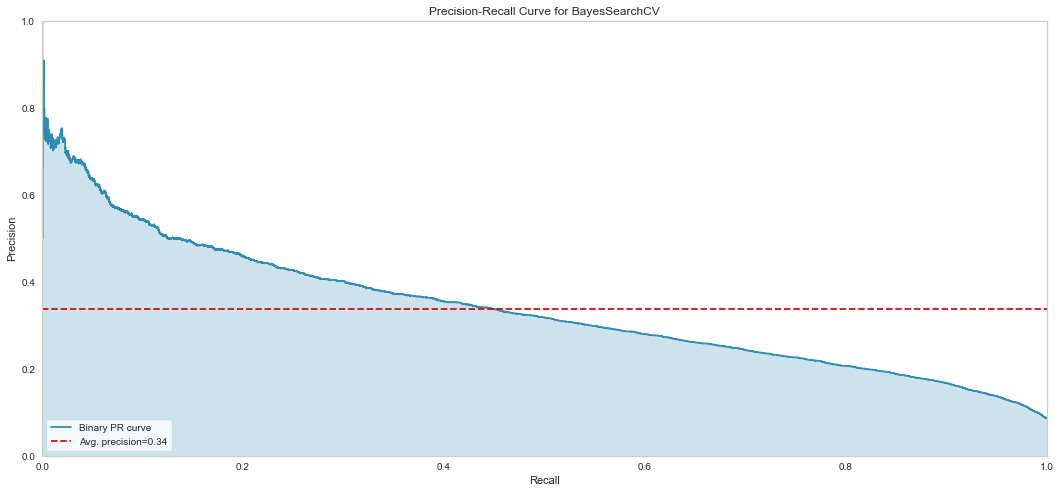

Optimal Threshold: 0.29281427882296185
Stored 'best_threshold_rf_none_f1' (ndarray)


In [65]:
# Precision-Recall Curve for Random Forest (None, f1)
best_threshold_rf_none_f1 = plot_AUPRC(rf_none_f1)
%store best_threshold_rf_none_f1

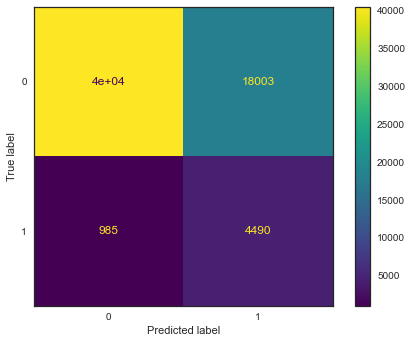

In [123]:
# Confusion Matrix of the optimal threshold for Random Forest (None, f1)
plot_confusion_matrix(rf_none_f1, best_threshold_rf_none_f1)

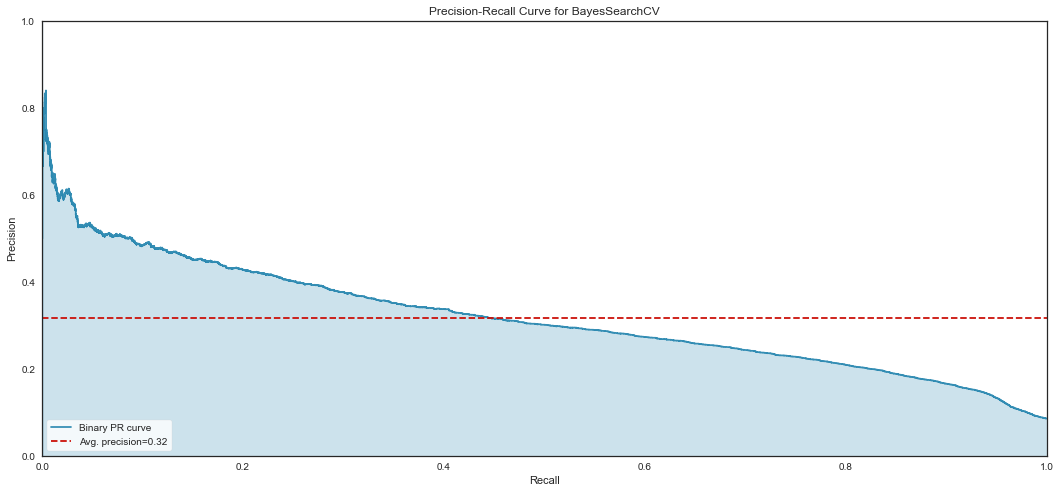

Optimal Threshold: 0.38283657837255447
Stored 'best_threshold_svc_under_f1' (ndarray)


In [124]:
# Precision-Recall Curve for SVC (Under, f1)
best_threshold_svc_under_f1 = plot_AUPRC(svc_under_f1)
%store best_threshold_svc_under_f1

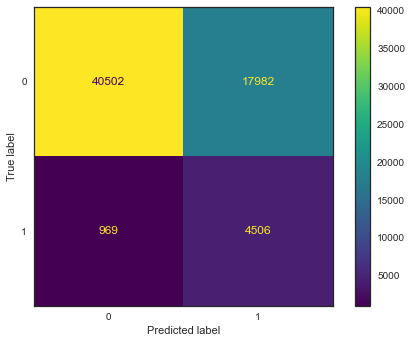

In [126]:
# Confusion Matrix of the optimal threshold for SVC (Under, f1)
plot_confusion_matrix(svc_under_f1, best_threshold_svc_under_f1)

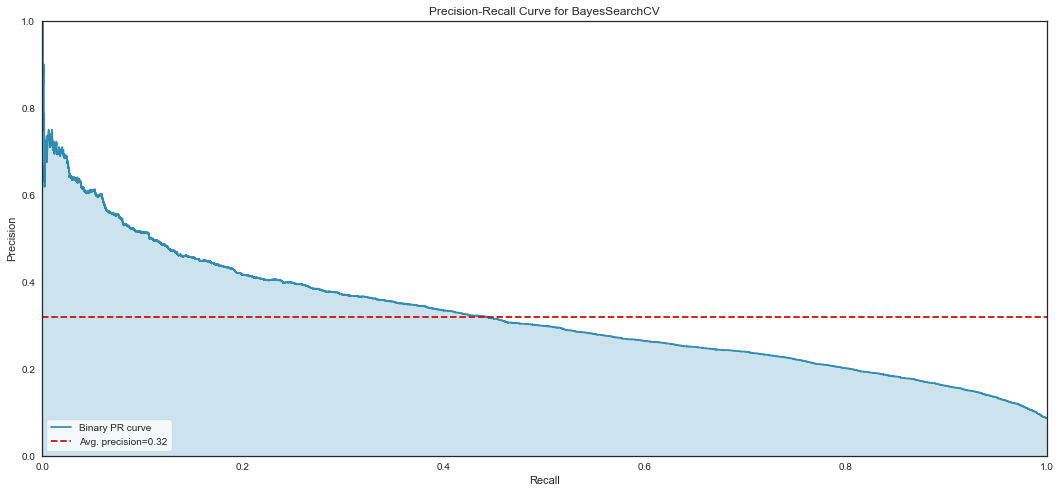

Optimal Threshold: 0.4043832563887386
Stored 'best_threshold_rf_smote_mcc' (ndarray)


In [127]:
# Precision-Recall Curve for Random Forest (SMOTE, mcc)
best_threshold_rf_smote_mcc = plot_AUPRC(rf_smote_mcc)
%store best_threshold_rf_smote_mcc

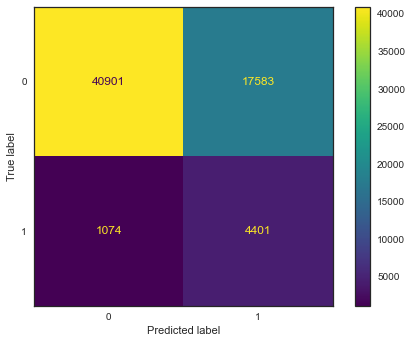

In [128]:
# Confusion Matrix of the optimal threshold for Random Forest (SMOTE, mcc)
plot_confusion_matrix(rf_smote_mcc, best_threshold_rf_smote_mcc)

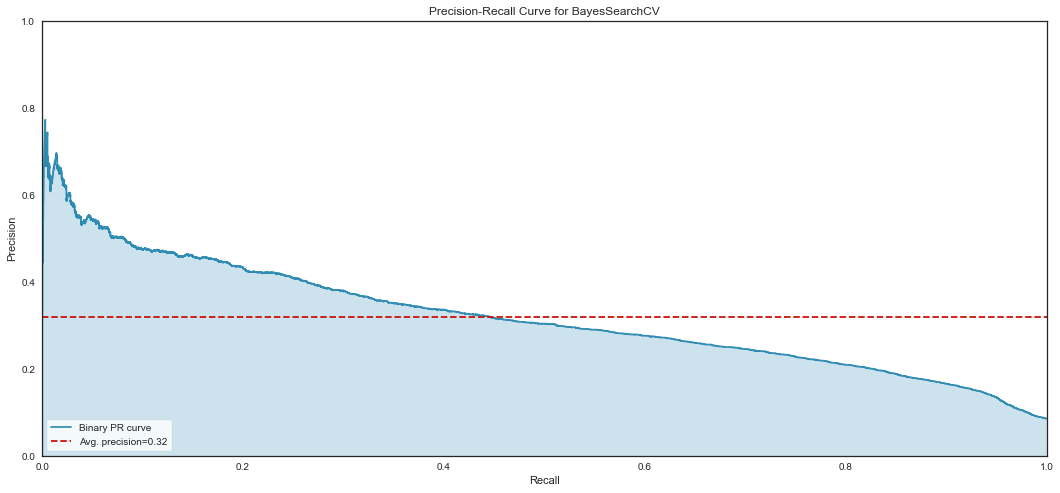

Optimal Threshold: 0.38731729515474145
Stored 'best_threshold_svc_under_mcc' (ndarray)


In [129]:
# Precision-Recall Curve for SVC (Under, mcc)
best_threshold_svc_under_mcc = plot_AUPRC(svc_under_mcc)
%store best_threshold_svc_under_mcc

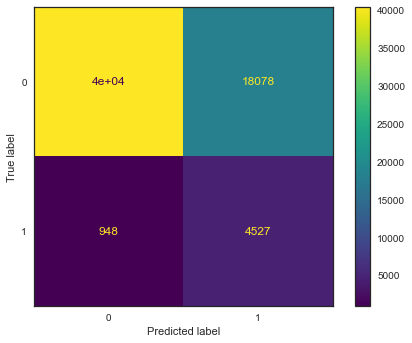

In [130]:
# Confusion Matrix of the optimal threshold for SVC (Under, mcc)
plot_confusion_matrix(svc_under_mcc, best_threshold_svc_under_mcc)

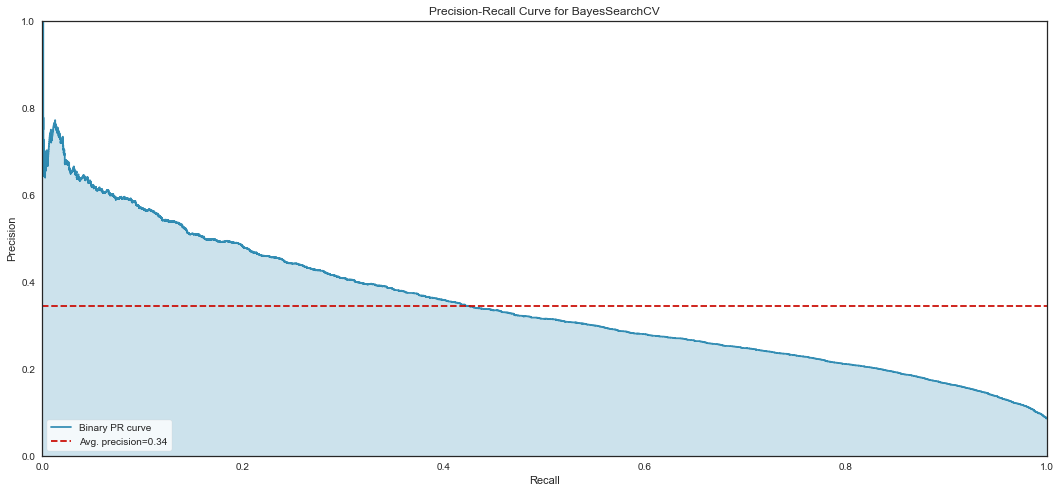

Optimal Threshold: 0.4332581777098014
Stored 'best_threshold_lr_under_mcc' (ndarray)


In [131]:
# Precision-Recall Curve for Logistic Regression (Under, mcc)
best_threshold_lr_under_mcc = plot_AUPRC(lr_under_mcc)
%store best_threshold_lr_under_mcc

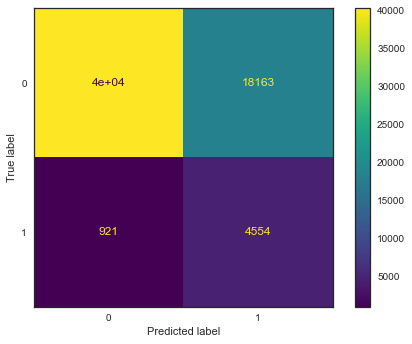

In [132]:
# Confusion Matrix of the optimal threshold for Logistic Regression (Under, mcc)
plot_confusion_matrix(lr_under_mcc, best_threshold_lr_under_mcc)

In [140]:
# Variable that stores the optimal threshold for each of the best models
setted_threshold = [best_threshold_rf_none_f1, best_threshold_svc_under_f1, best_threshold_rf_smote_mcc, best_threshold_svc_under_mcc, best_threshold_lr_under_mcc]

In [143]:
# Defining the best model as the one with the best recall
results_setted_threshold = model_eval_setted_threshold(setted_threshold, model_names)
%store results_setted_threshold
results_setted_threshold

Stored 'results_setted_threshold' (DataFrame)


,Recall,Specificity,Accuracy
Model,,,
Logistic Regression Under (MCC),0.831781,0.689436,0.701621
SVC Under (MCC),0.826849,0.690890,0.702528
SVC Under (F1),0.823014,0.692531,0.703701
Random Forest None (F1),0.820091,0.692172,0.703122
Random Forest Smote (MCC),0.803836,0.699354,0.708298


Therefore, Logistic Regression with Random Undersampling and MCC as the score was defined as the best model, obtaining a recall value of 83,18%, specificity of 68,94%, and accuracy of 70,16%.

### 4.3. Deploy

In [177]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)
lr_param_distributions_bayes = {"selector__k": Integer(1, 31),
                                "model__solver": Categorical(['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']),
                                "model__C": Real(1e-8, 1e+8, prior='log-uniform')}

In [178]:
undersampler = RandomUnderSampler(random_state=SEED)
lr_under_mcc = model_selection_bayes_mcc(lr_model, lr_param_distributions_bayes, undersampler=undersampler)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [60]:
# Best Parameters
lr_under_mcc.best_params_

OrderedDict([('model__C', 1.866835609034825),
             ('model__solver', 'lbfgs'),
             ('selector__k', 31)])

In [66]:
lr_under_mcc

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              estimator=Pipeline(steps=[('preprocess',
                                         ColumnTransformer(transformers=[('numerical_transformer',
                                                                          StandardScaler(),
                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x0000021D9918F850>),
                                                                         ('ordinal_transformer',
                                                                          OrdinalEncoder(categories=[['18-24',
                                                                                                      '25-29',
                                                                                                      '30-34',
                                                                                   

In [68]:
pickle.dump(lr_under_mcc, open('model-class.pkl', 'wb'))

In [72]:
dic = {'BMI': [27.12],
 'Smoking': ['No'],
 'AlcoholDrinking': ['No'],
 'Stroke': ['No'],
 'PhysicalHealth': [30.0],
 'MentalHealth': [7.0],
 'DiffWalking': ['No'],
 'Sex': ['Male'],
 'AgeCategory': ['45-49'],
 'Race': ['White'],
 'Diabetic': ['Yes'],
 'PhysicalActivity': ['Yes'],
 'GenHealth': ['Fair'],
 'SleepTime': [8.0],
 'Asthma': ['No'],
 'KidneyDisease': ['No'],
 'SkinCancer': ['No']}

In [185]:
pd.DataFrame(dic)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,27.12,No,No,No,30.0,7.0,No,Male,45-49,White,Yes,Yes,Fair,8.0,No,No,No


In [199]:
X.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [183]:
new_inputs = [20.7, 'No', 'No', 'No', 4, 10, 'No', 'Male', '18-24', 'White', 'No', 'Yes', 'Good', 7, 'No', 'No', 'No']

In [114]:
values = []
for i, j in enumerate(inputs):
    i = []
    i.append(j)
    values.append(i)

In [180]:
values

[[20.7],
 ['No'],
 ['No'],
 ['No'],
 [4],
 [10],
 ['No'],
 ['Male'],
 ['18-24'],
 ['White'],
 ['No'],
 ['Yes'],
 ['Good'],
 [7],
 ['No'],
 ['No'],
 ['No']]

In [116]:
zip_obj = zip(X.columns, values)

In [117]:
df = pd.DataFrame(dict(zip_obj))

In [118]:
df

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,20.7,No,No,No,4,10,No,Male,18-24,White,No,Yes,Good,7,No,No,No


In [200]:
def predict_disease(inputs):
    
    values = []

    for i, j in enumerate(inputs):
        i = []
        i.append(j)
        values.append(i)

    zip_obj = zip(X.columns, values)
    df = pd.DataFrame(dict(zip_obj))

    prediction = lr_under_mcc.predict(df)
    
    if prediction[0] == 0:
        print("Don't have heart disease.")
    else:
        print("Has a heart disease.")

In [206]:
predict_disease(new_inputs)

Don't have heart disease.


In [220]:
def predict_proba_disease(inputs):
    
    values = []

    for i, j in enumerate(inputs):
        i = []
        i.append(j)
        values.append(i)

    zip_obj = zip(X.columns, values)
    df = pd.DataFrame(dict(zip_obj))

    probability = lr_under_mcc.predict_proba(df)
    return print(f'Probability of having Heart Disease: {(probability[0][1]*100):.2f}%')

In [221]:
predict_proba_disease(new_inputs)

Probability of having Heart Disease: 7.46%


## Conclusion

Thus, the creation of a predictive model for heart disease was concluded. In this project:
- Was made an Exploratory Analysis of each variable showing the prevalence of heart disease for each category. It was shown that have had Stroke, Difficulty to Walk, Kidney Disease and Skin Cancer, aging, and not making Physical Activity are risk factors for someone acquiring heart disease;
-  It was searched for the best combination of hyperparameters for Logistic Regression, SVM, Random Forest, and XGBoost that maximizes the recall avoiding compromising other metrics results as accuracy and specificity. For each method I will be run a parameter tuning for a process without sampling, using Random Undersampler, SMOTE, and both. It will also be tested the use of "f1-macro" and MCC (Mathews Correlation Coefficient) as the evaluation metric for imbalanced data.
- Logistic Regression with Random Undersampling and MCC as the score was defined as the best model, obtaining a recall value of 83,18%, specificity of 68,94%, and accuracy of 70,16%.
- I suggest trying other Classification models, a different Feature Engineering approach to obtain even better results, or setting a different threshold for the best model obtained.

If you want to ask me something, make any suggestions or talk about the project, contact me through my LinkedIn. Also, come to see what I've been doing on my GitHub.

Thanks for your attention :D